In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [8]:
from exp_config import data_conf

## Prepare train, validation and test data

In [9]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:02, 279.46it/s]
100%|██████████| 700/700 [00:08<00:00, 87.22it/s] 
8280it [00:00, 212420.48it/s]
7920it [00:00, 226200.41it/s]
710it [00:03, 208.21it/s]
100%|██████████| 710/710 [00:08<00:00, 96.08it/s]
7920it [00:00, 228937.89it/s]
7560it [00:00, 64811.32it/s]
720it [00:00, 727.26it/s]
100%|██████████| 720/720 [00:08<00:00, 82.05it/s]
8280it [00:00, 231466.94it/s]
720it [00:01, 386.74it/s]
100%|██████████| 720/720 [00:08<00:00, 81.66it/s]
8280it [00:00, 237924.15it/s]
700it [00:00, 747.92it/s]
100%|██████████| 700/700 [00:07<00:00, 87.79it/s]
8280it [00:00, 67423.11it/s]
509it [00:00, 1100.90it/s]
100%|██████████| 509/509 [00:03<00:00, 168.08it/s]
3664it [00:00, 244043.86it/s]
700it [00:00, 775.18it/s]
100%|██████████| 700/700 [00:08<00:00, 86.48it/s]
8280it [00:00, 239838.38it/s]
700it [00:00, 761.59it/s]
100%|██████████| 700/700 [00:07<00:00, 89.09it/s] 
8280it [00:00, 233623.52it/s]
710it [00:01, 363.76it/s]
100%|██████████| 710/710 [00:08<00:00, 86.68it/s]
8280it [00:00,

In [10]:
len(data_train), len(data_val), len(data_test)

(16200, 15480, 11)

In [11]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [12]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [13]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [14]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [15]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [16]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10132


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.044976
Epoch 1...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.043623


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.03506


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.042338


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.028072


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.041108


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.025625


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.040595


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.025716
EarlyStopping counter: 1 out of 5
Epoch 5...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039747


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.029409
EarlyStopping counter: 2 out of 5
Epoch 6...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039299


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.021412


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038832


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.0219
EarlyStopping counter: 1 out of 5
Epoch 8...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038497


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.022086
EarlyStopping counter: 2 out of 5
Epoch 9...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038212


100%|██████████| 484/484 [00:37<00:00, 14.64it/s]


Mean val loss: 0.021103


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037667


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.026887
EarlyStopping counter: 1 out of 5
Epoch 11...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037705


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.01877


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037679


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.018251


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037278


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.016299


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03699


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01691
EarlyStopping counter: 1 out of 5
Epoch 15...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036925


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.018971
EarlyStopping counter: 2 out of 5
Epoch 16...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036598


100%|██████████| 484/484 [00:36<00:00, 13.15it/s]


Mean val loss: 0.016257


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03671


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.017835
EarlyStopping counter: 1 out of 5
Epoch 18...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03687


100%|██████████| 484/484 [00:36<00:00, 13.14it/s]


Mean val loss: 0.015579


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036454


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.018938
EarlyStopping counter: 1 out of 5
Epoch 20...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036543


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015881
EarlyStopping counter: 2 out of 5
Epoch 21...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036362


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.015419


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036131


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.020686
EarlyStopping counter: 1 out of 5
Epoch 23...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036226


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016401
EarlyStopping counter: 2 out of 5
Epoch 24...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.036175


100%|██████████| 484/484 [00:37<00:00, 12.96it/s]


Mean val loss: 0.01478


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03577


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015239
EarlyStopping counter: 1 out of 5
Epoch 26...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.035778


100%|██████████| 484/484 [00:37<00:00, 12.98it/s]


Mean val loss: 0.014729


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.035576


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015502
EarlyStopping counter: 1 out of 5
Epoch 28...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.035221


100%|██████████| 484/484 [00:37<00:00, 12.95it/s]


Mean val loss: 0.014516


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.035189


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015285
EarlyStopping counter: 1 out of 5
Epoch 30...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034694


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01484
EarlyStopping counter: 2 out of 5
Epoch 31...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034941


100%|██████████| 484/484 [00:37<00:00, 12.97it/s]


Mean val loss: 0.014459


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 32...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034968


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014958
EarlyStopping counter: 1 out of 5
Epoch 33...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03475
Epoch    33: reducing learning rate of group 0 to 7.5000e-05.


100%|██████████| 484/484 [00:36<00:00, 14.75it/s]


Mean val loss: 0.014084


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 34...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03438


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014263
EarlyStopping counter: 1 out of 5
Epoch 35...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034174


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01432
EarlyStopping counter: 2 out of 5
Epoch 36...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034236


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014335
EarlyStopping counter: 3 out of 5
Epoch 37...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034102


100%|██████████| 484/484 [00:37<00:00, 13.05it/s]


Mean val loss: 0.01386


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 38...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034237


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015574
EarlyStopping counter: 1 out of 5
Epoch 39...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034156


100%|██████████| 484/484 [00:36<00:00, 13.09it/s]


Mean val loss: 0.013856


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 40...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.034231
Epoch    40: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.022112
EarlyStopping counter: 1 out of 5
Epoch 41...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03378


100%|██████████| 484/484 [00:37<00:00, 13.00it/s]


Mean val loss: 0.013795


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 42...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03388


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.020598
EarlyStopping counter: 1 out of 5
Epoch 43...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033662


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.013604


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 44...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033694


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013943
EarlyStopping counter: 1 out of 5
Epoch 45...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033908


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013776
EarlyStopping counter: 2 out of 5
Epoch 46...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033623


100%|██████████| 484/484 [00:37<00:00, 12.85it/s]


Mean val loss: 0.013463


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 47...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033527


100%|██████████| 484/484 [00:37<00:00, 12.99it/s]


Mean val loss: 0.013421


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 48...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033642


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014017
EarlyStopping counter: 1 out of 5
Epoch 49...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0336


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013513
EarlyStopping counter: 2 out of 5
Epoch 50...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033519


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013683
EarlyStopping counter: 3 out of 5
Epoch 51...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033313


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013478
EarlyStopping counter: 4 out of 5
Epoch 52...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.033356


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.013704
EarlyStopping counter: 5 out of 5


100%|██████████| 259/259 [02:38<00:00,  1.85it/s]


## Dump experiment results

In [17]:
import pickle
import json

In [18]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [16]:
model_conf

{'device': 'cpu', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [19]:
import torch
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [19]:
from itertools import chain

In [20]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [21]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

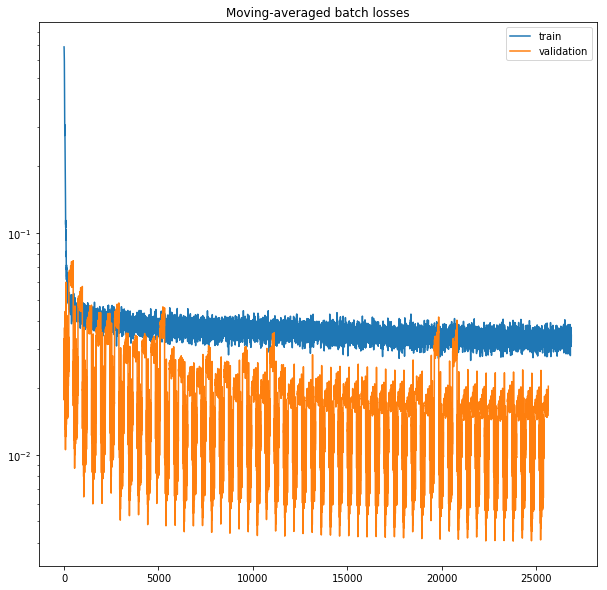

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [23]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

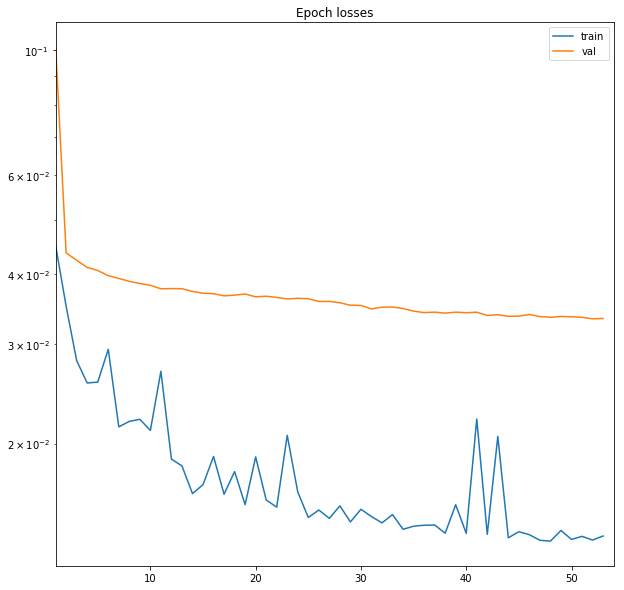

In [24]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [25]:
import os

In [26]:
import torch

In [27]:
from visualization_utils import output_to_binary, plot_sample

In [28]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

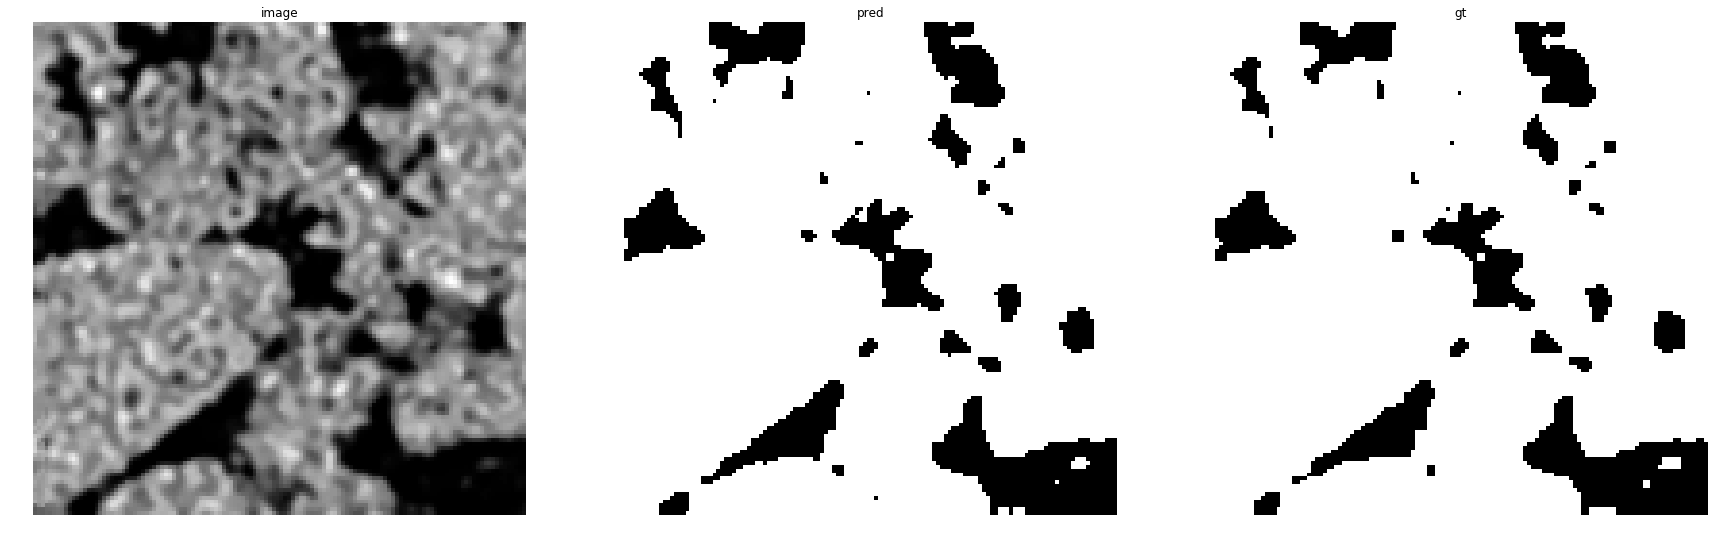

accuracy    : 0.99224853515625
precision   : 0.9995630007283322
recall      : 0.9912603828096785
f1          : 0.9953943789664551
pr_auc      : 0.9999688542492772
iou         : 0.9908309869323515


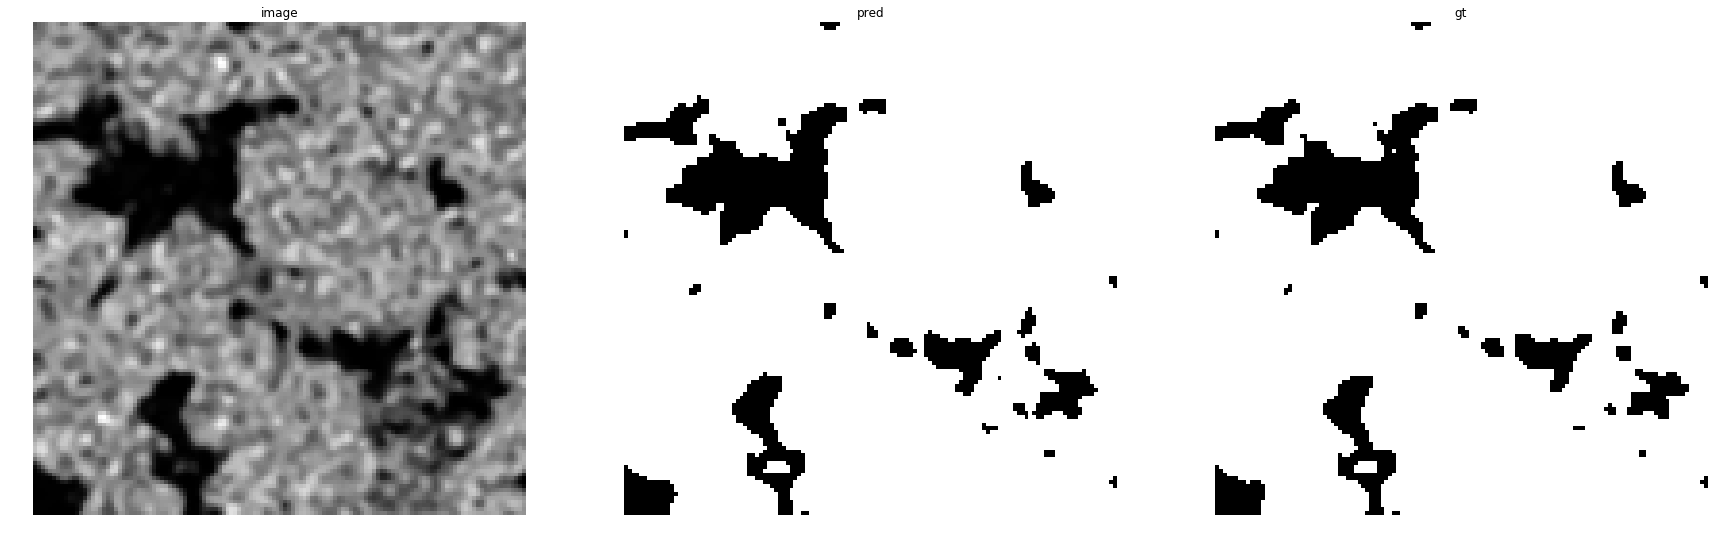

accuracy    : 0.99310302734375
precision   : 0.9995863495346432
recall      : 0.9926742434615912
f1          : 0.9961183057950603
pr_auc      : 0.9999830380480796
iou         : 0.992266630166986


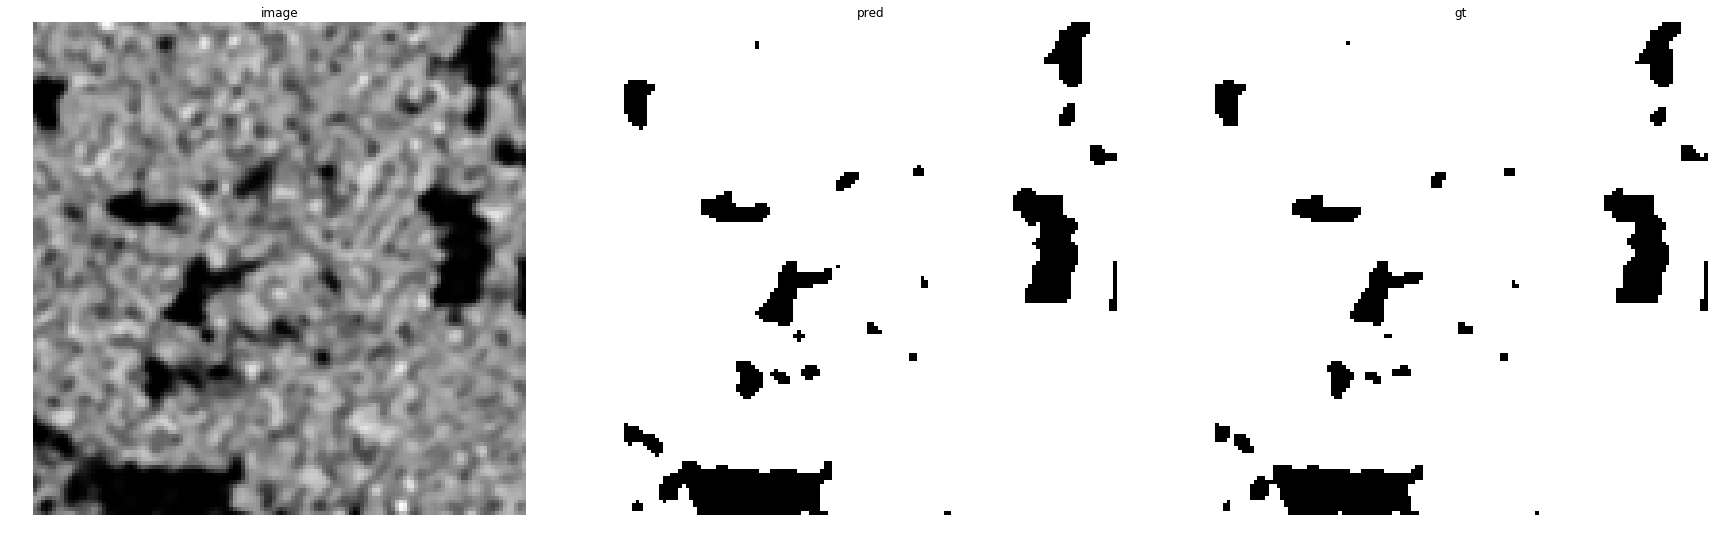

accuracy    : 0.99322509765625
precision   : 0.99993310141825
recall      : 0.9926944278408714
f1          : 0.996300616563906
pr_auc      : 0.999984773872264
iou         : 0.9926285031212645


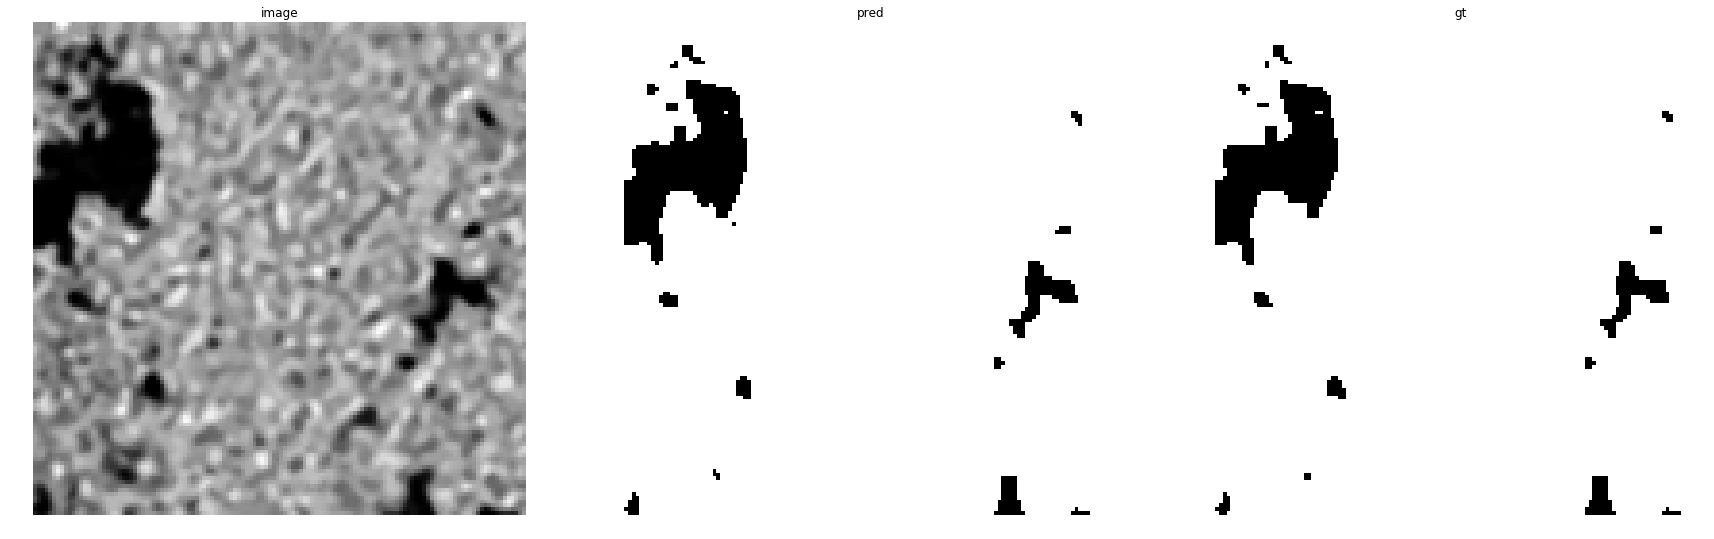

accuracy    : 0.9969482421875
precision   : 0.9993473436888135
recall      : 0.9973944762897342
f1          : 0.9983699550107582
pr_auc      : 0.999994096276014
iou         : 0.9967452154667361


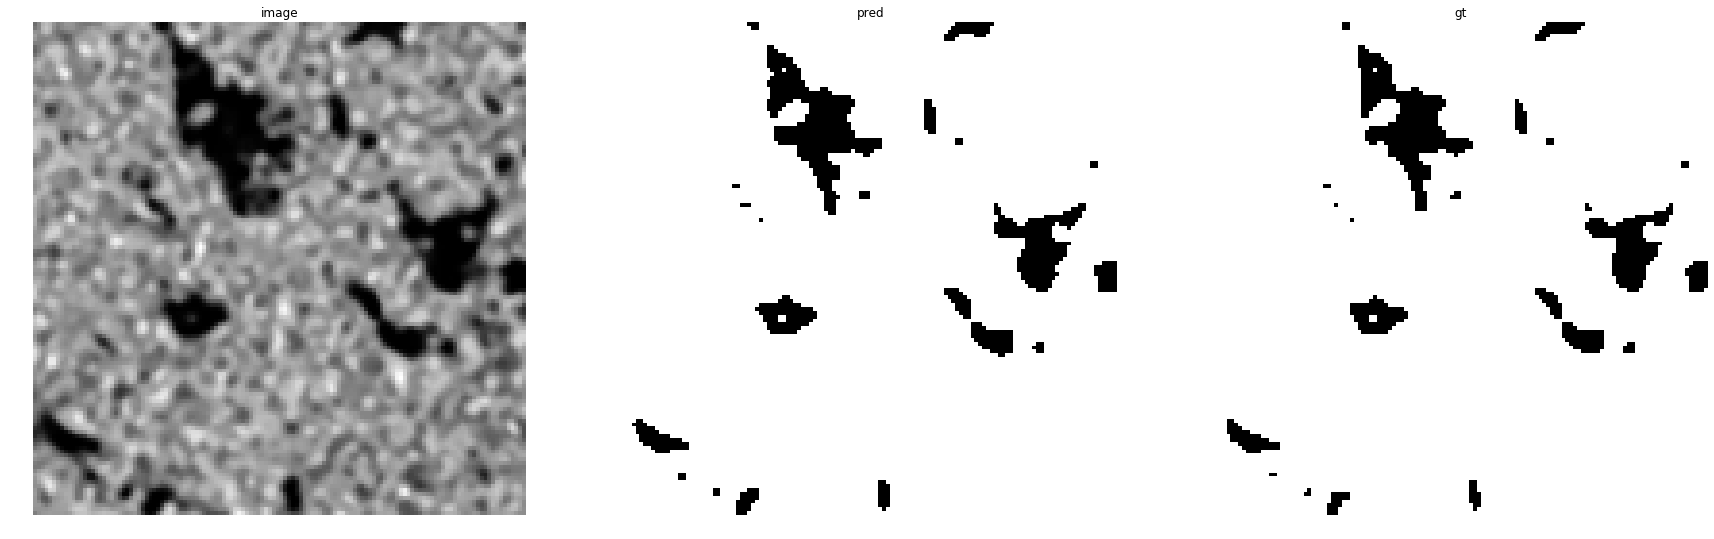

accuracy    : 0.99462890625
precision   : 0.9996716143438854
recall      : 0.9945765812859383
f1          : 0.997117589256469
pr_auc      : 0.9999922895630421
iou         : 0.9942517473381671


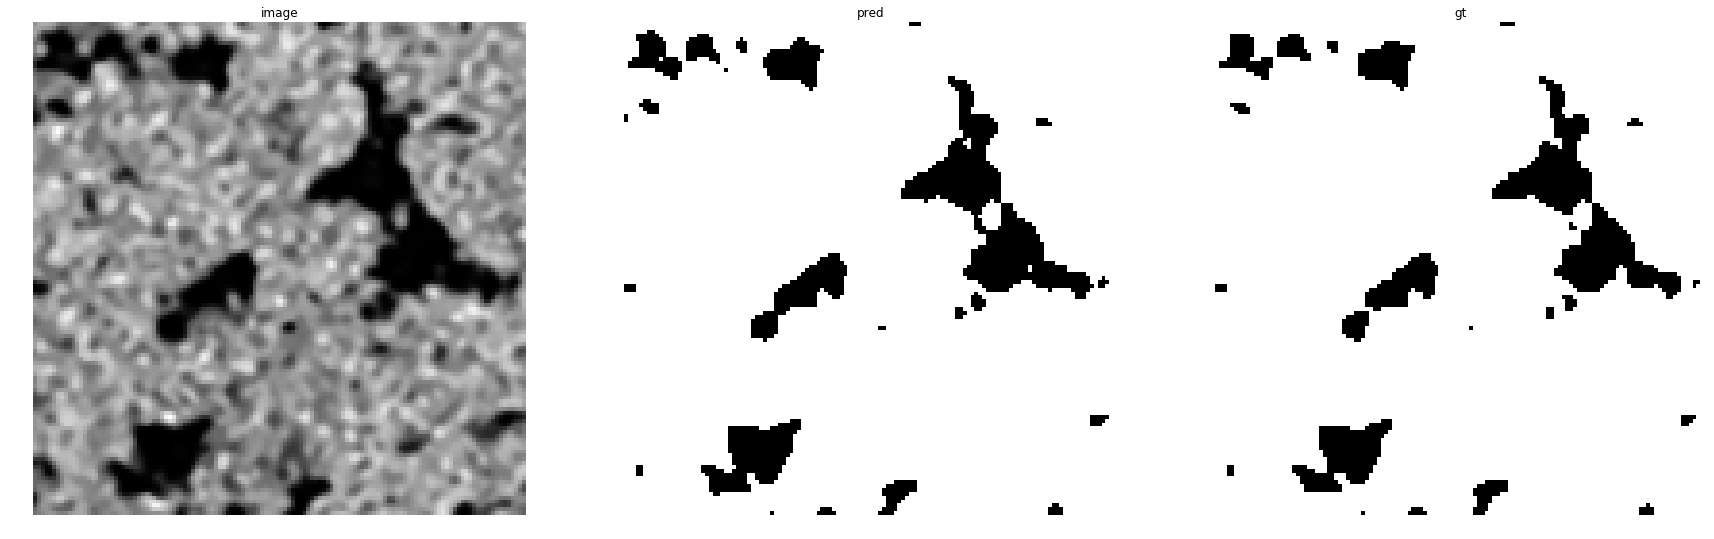

accuracy    : 0.99212646484375
precision   : 0.9995915310776772
recall      : 0.9916925570714575
f1          : 0.9956263773520936
pr_auc      : 0.9999723640001391
iou         : 0.9912908452605995


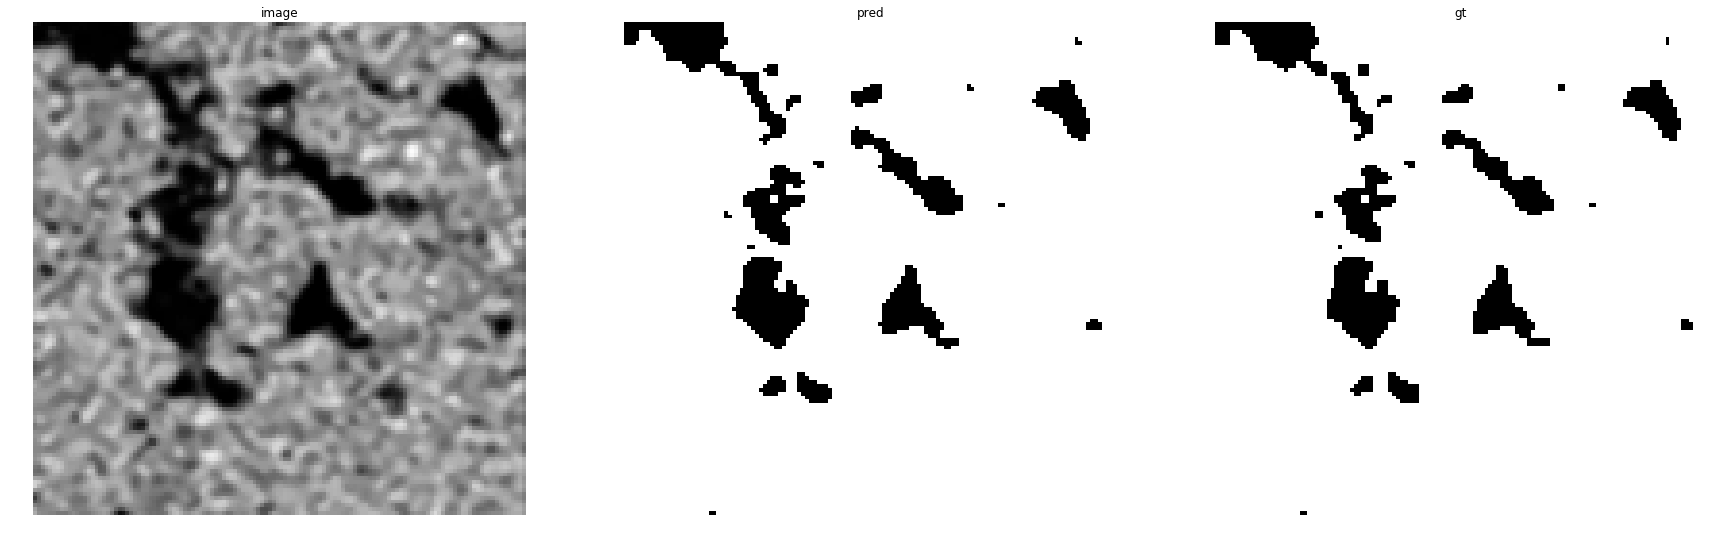

accuracy    : 0.99444580078125
precision   : 0.9996660878856685
recall      : 0.994287612089007
f1          : 0.9969695960571446
pr_auc      : 0.9999858811875888
iou         : 0.9939575033200532


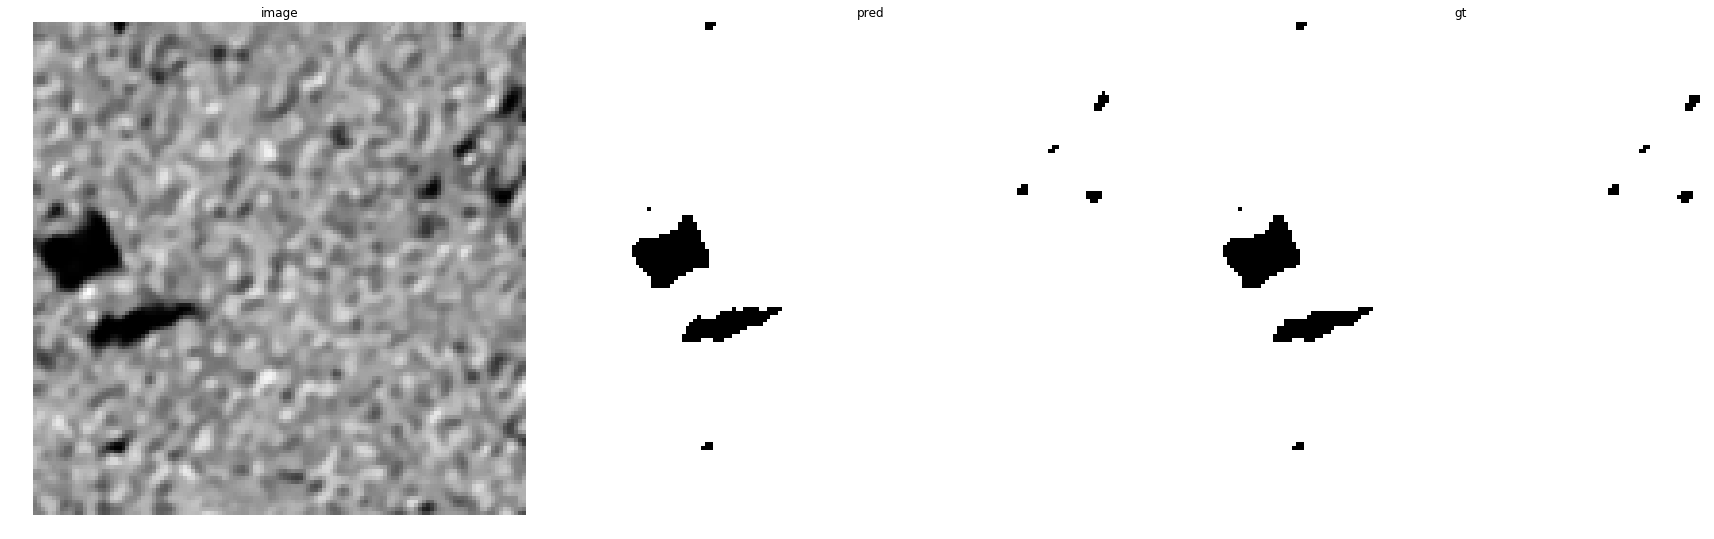

accuracy    : 0.99920654296875
precision   : 1.0
recall      : 0.999187449215576
f1          : 0.9995935594810068
pr_auc      : 0.9999994850100228
iou         : 0.999187449215576


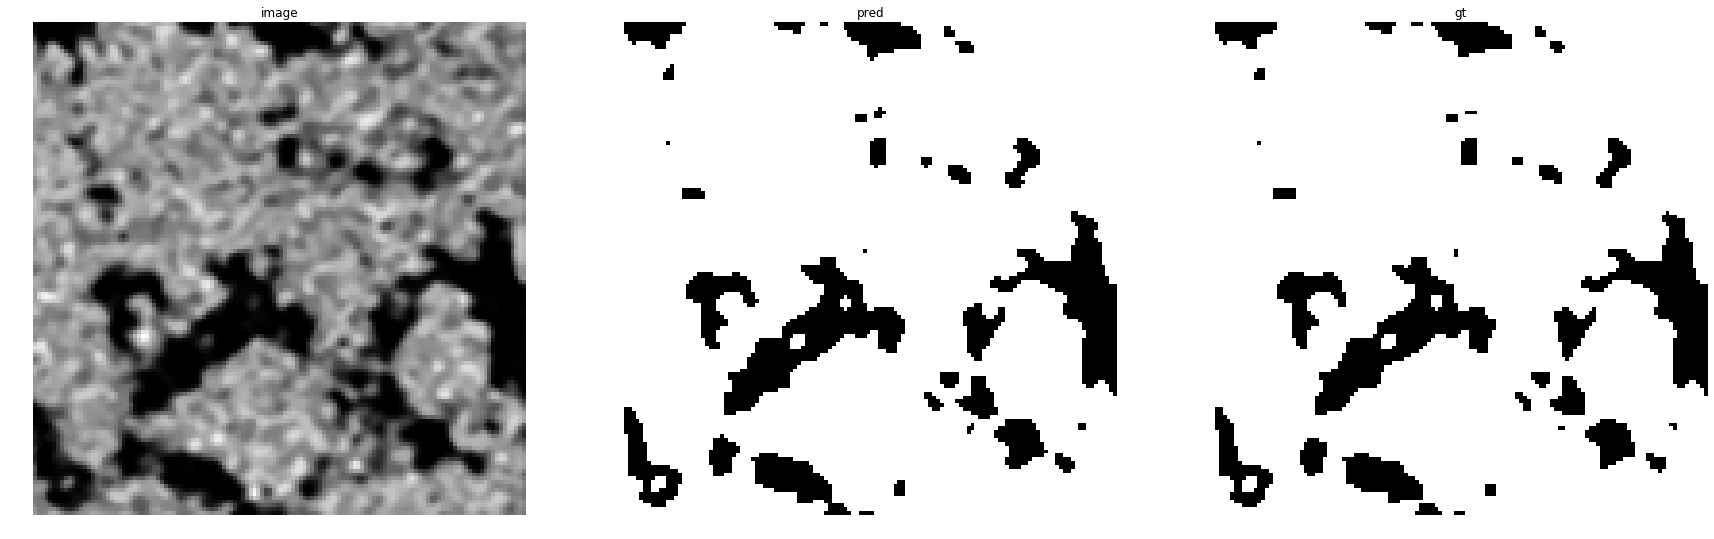

accuracy    : 0.99261474609375
precision   : 0.9992816608002298
recall      : 0.9920838682071031
f1          : 0.9956697562895895
pr_auc      : 0.9999707757139105
iou         : 0.9913768529076397


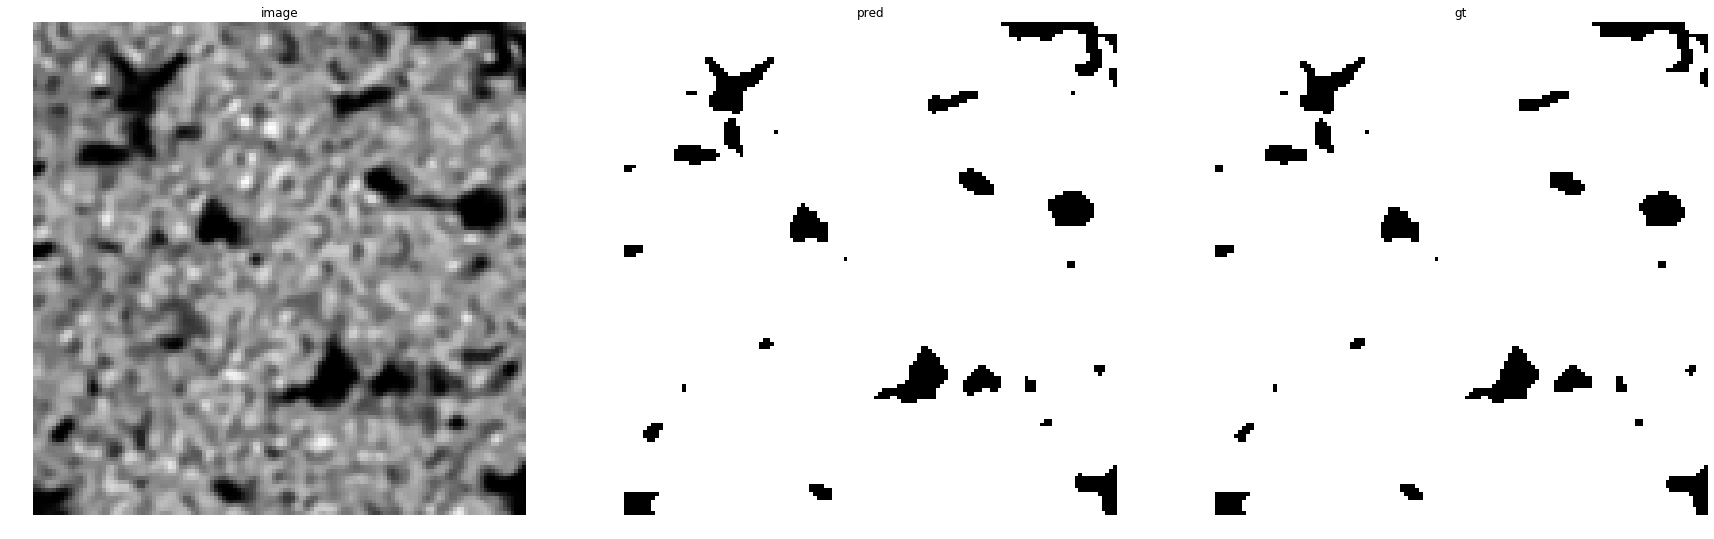

accuracy    : 0.99615478515625
precision   : 0.999740428293316
recall      : 0.9961849337213061
f1          : 0.9979595141700405
pr_auc      : 0.9999932068636057
iou         : 0.9959273385480639


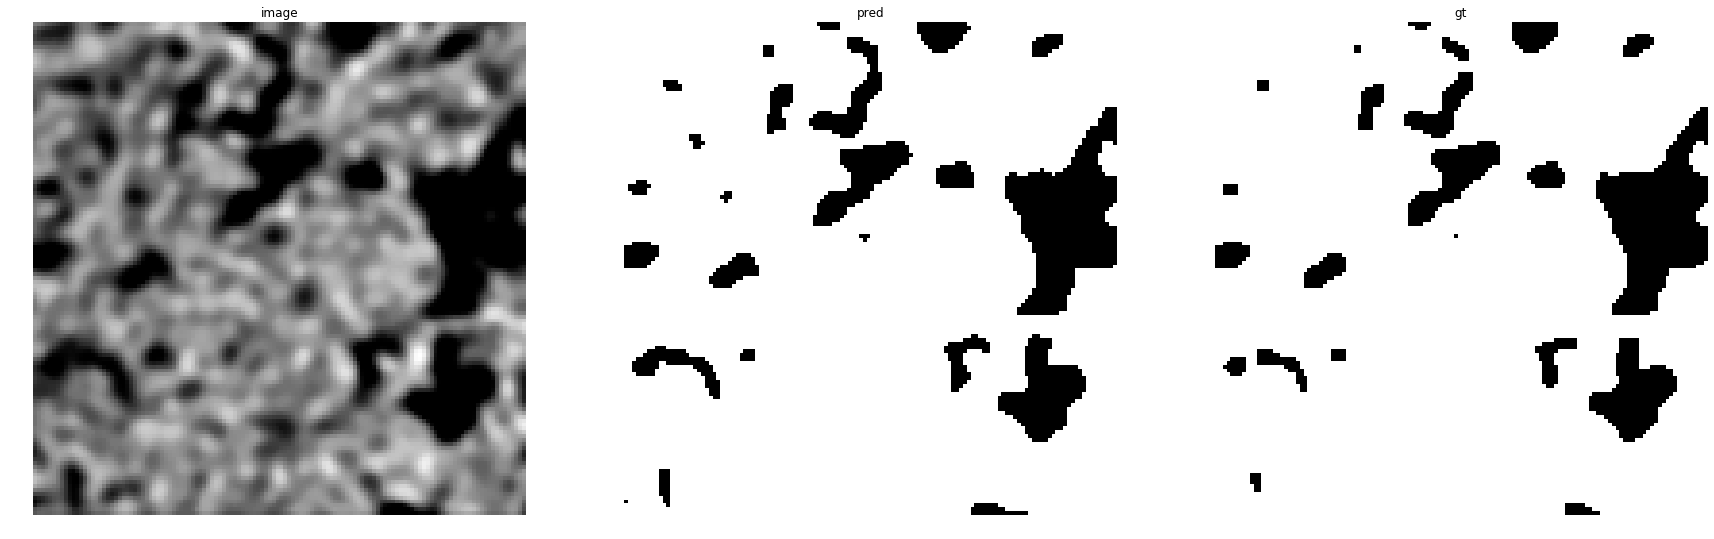

accuracy    : 0.9874267578125
precision   : 0.999078406351907
recall      : 0.9864902701945961
f1          : 0.9927444350521275
pr_auc      : 0.9999086247258664
iou         : 0.98559339813973


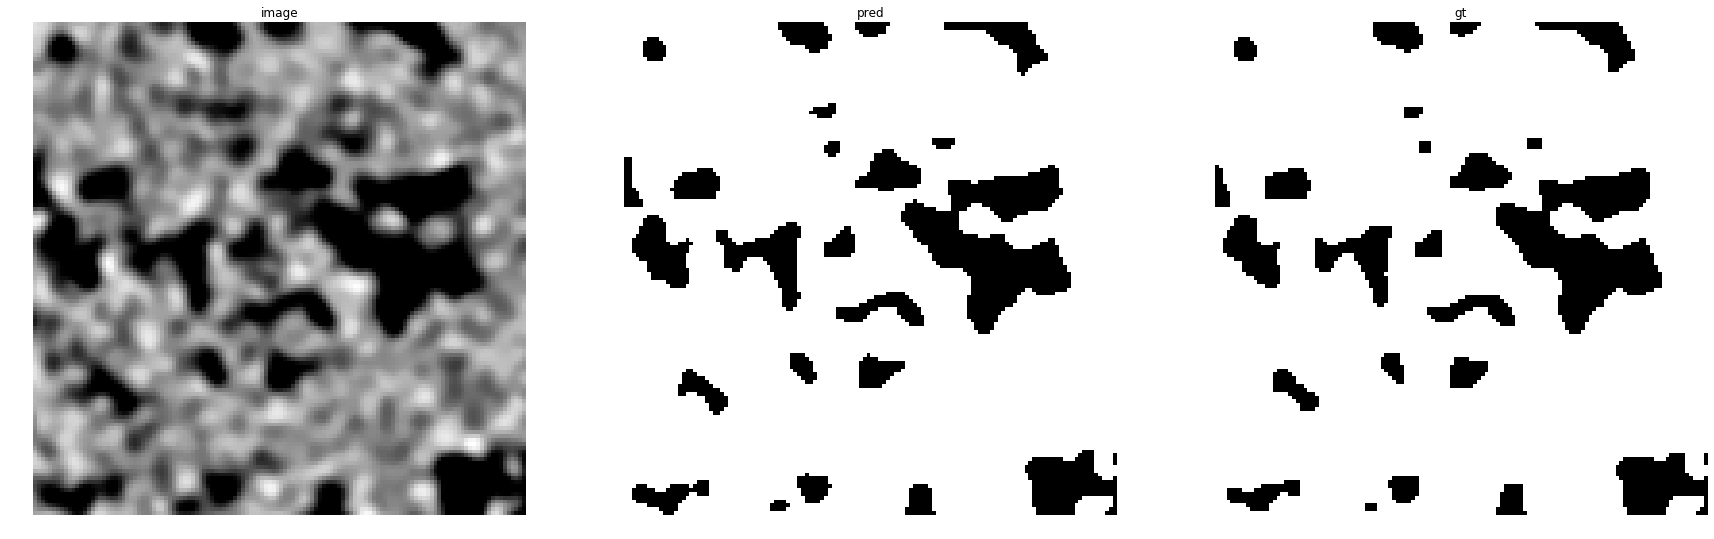

accuracy    : 0.98828125
precision   : 0.9977456185004727
recall      : 0.9884014120020171
f1          : 0.9930515344528085
pr_auc      : 0.9998552598158511
iou         : 0.9861989649223691


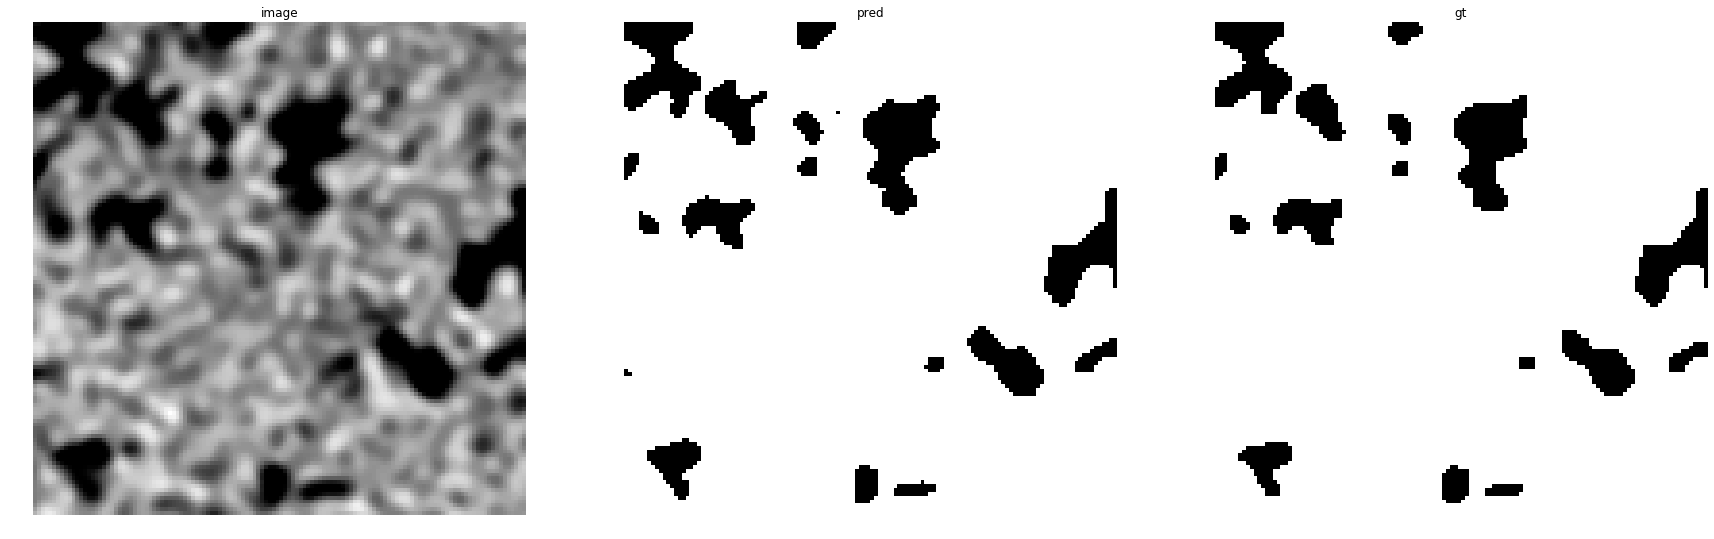

accuracy    : 0.98980712890625
precision   : 0.997870586619041
recall      : 0.9907249539657642
f1          : 0.9942849320694022
pr_auc      : 0.9999362609288094
iou         : 0.9886348169320811


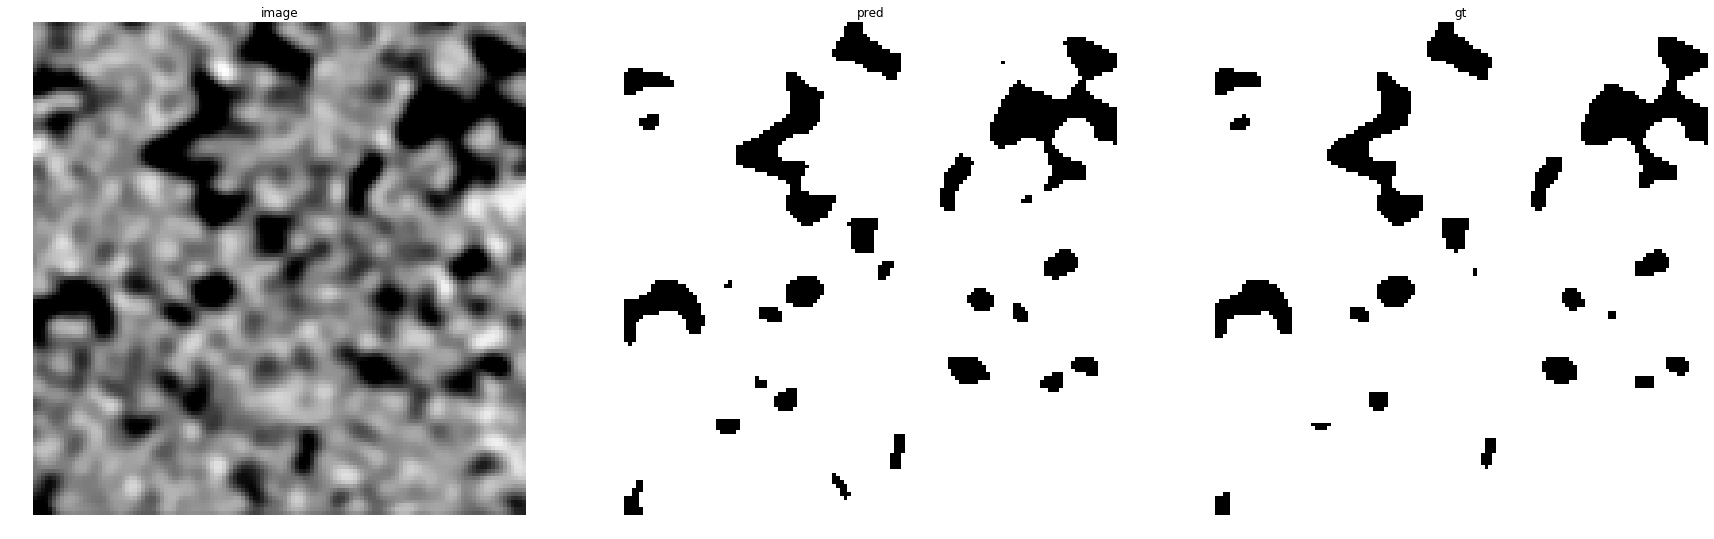

accuracy    : 0.98712158203125
precision   : 0.9987618654560462
recall      : 0.9868823489431116
f1          : 0.9927865713992684
pr_auc      : 0.9998964138898624
iou         : 0.9856764645984658


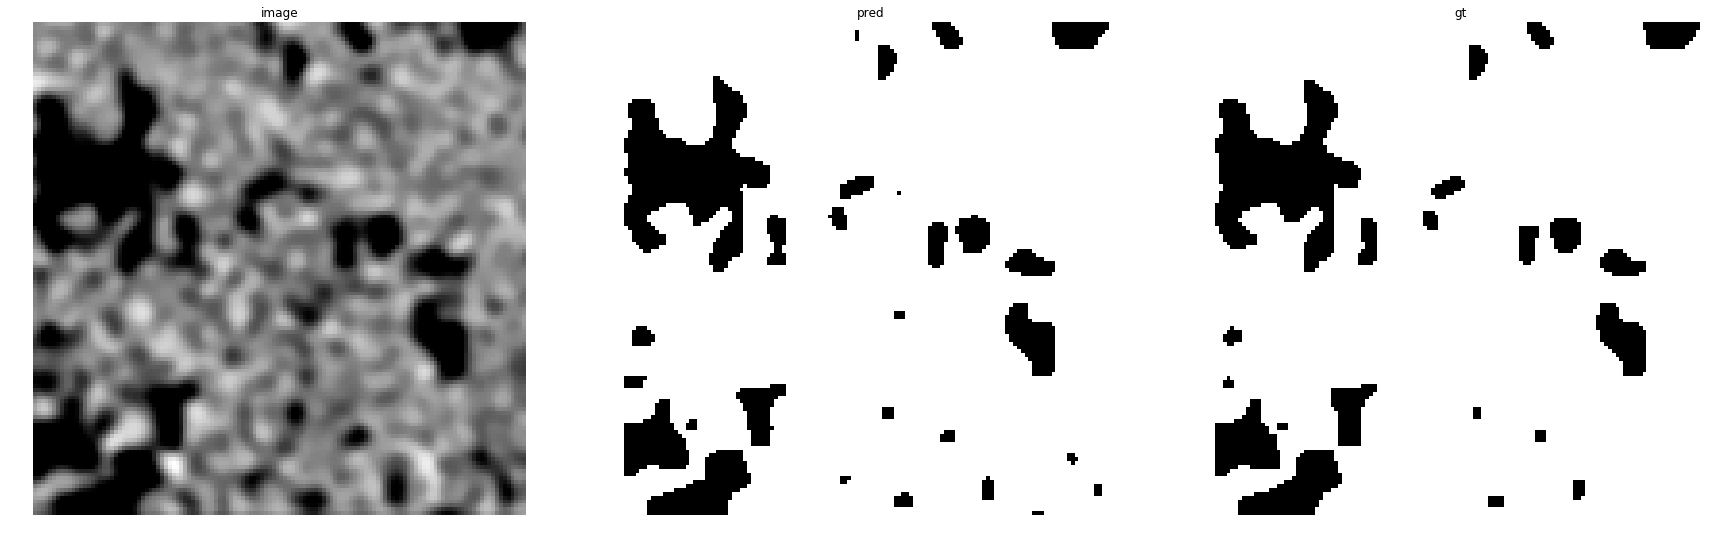

accuracy    : 0.98992919921875
precision   : 0.9978040660196925
recall      : 0.990576652601969
f1          : 0.9941772241239369
pr_auc      : 0.9999067113503042
iou         : 0.9884218651322714


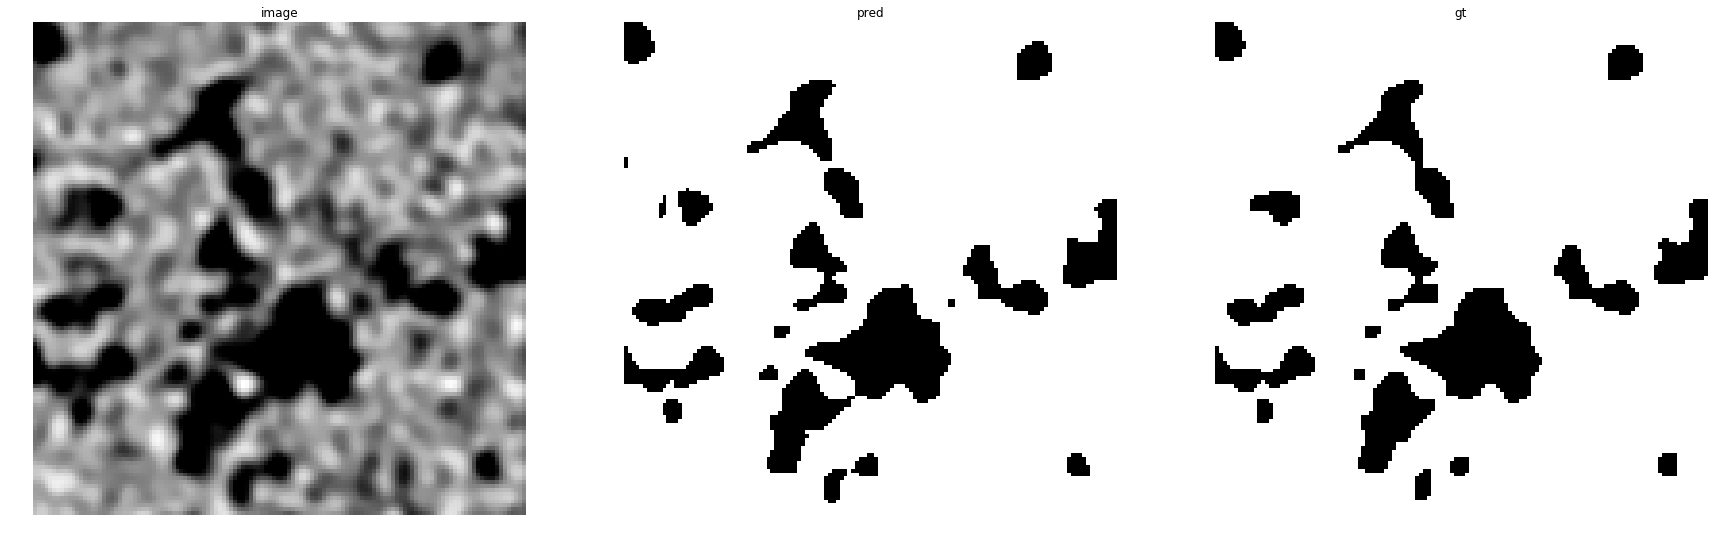

accuracy    : 0.9893798828125
precision   : 0.9963490586298231
recall      : 0.9912399401752012
f1          : 0.9937879328811139
pr_auc      : 0.9998422671670459
iou         : 0.9876525688333806


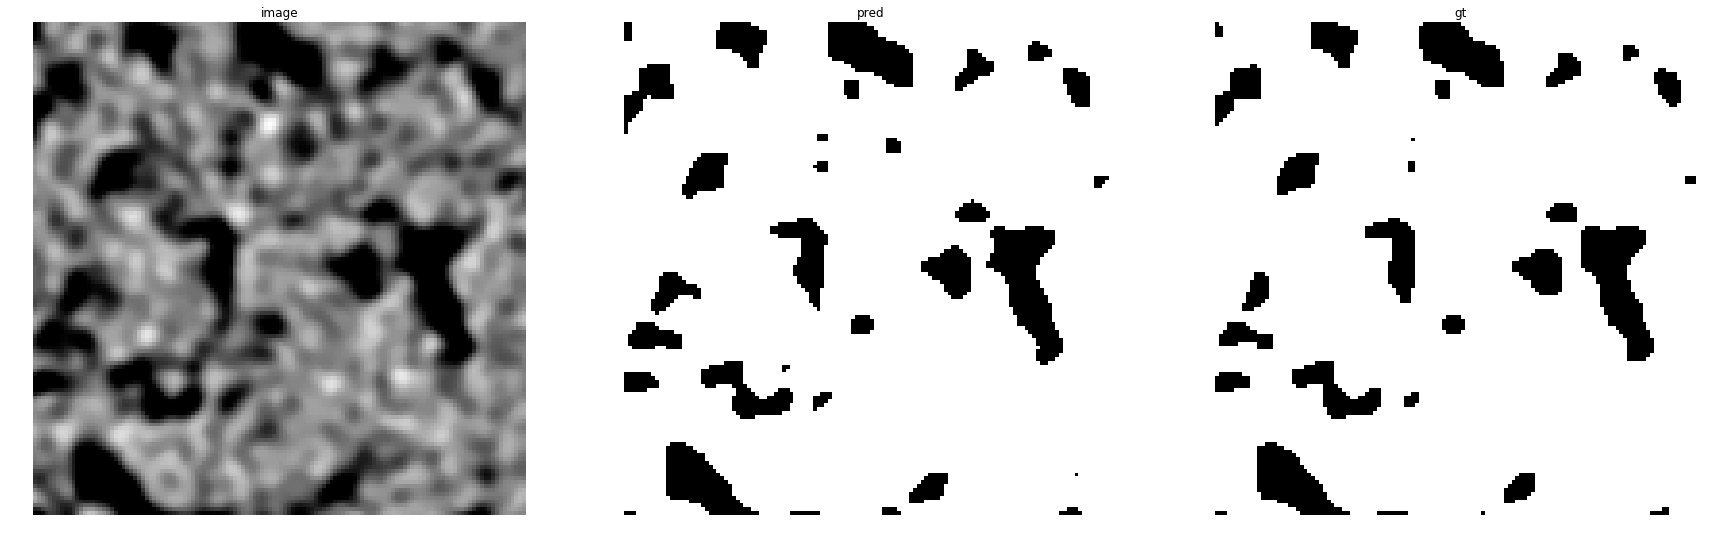

accuracy    : 0.9866943359375
precision   : 0.9982443820224719
recall      : 0.9866046640755136
f1          : 0.9923903937447641
pr_auc      : 0.9998557935934776
iou         : 0.9848957250744821


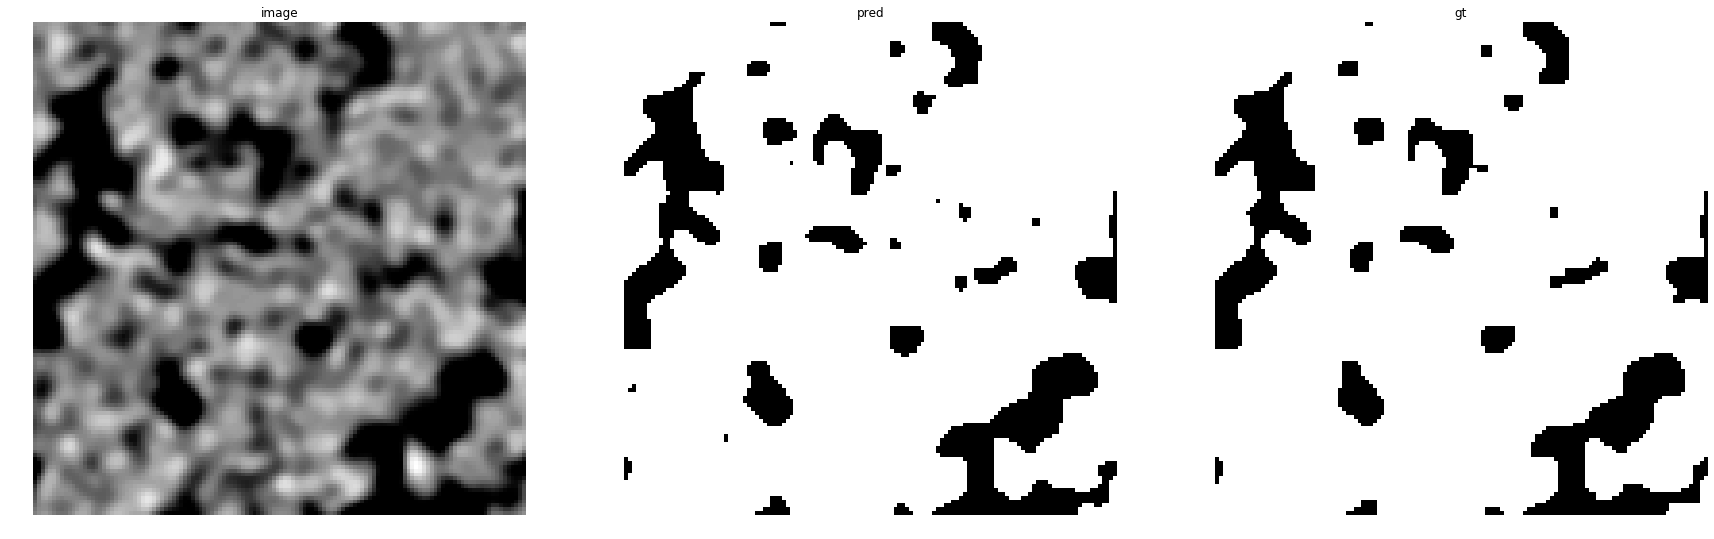

accuracy    : 0.98797607421875
precision   : 0.997460824143935
recall      : 0.9883545395729998
f1          : 0.9928868026719624
pr_auc      : 0.9998780821141696
iou         : 0.9858740857593575


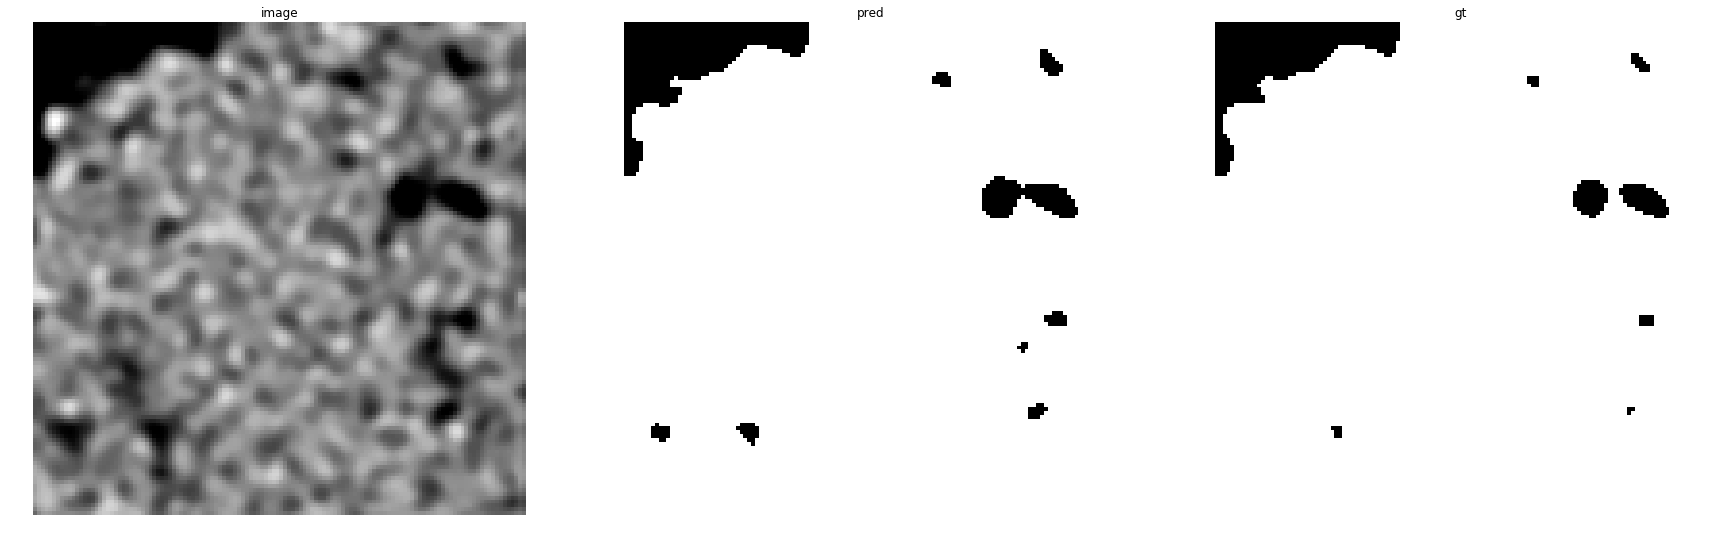

accuracy    : 0.9920654296875
precision   : 0.9998700032499187
recall      : 0.9917477918896267
f1          : 0.9957923355774209
pr_auc      : 0.9999852447315031
iou         : 0.9916199316702121


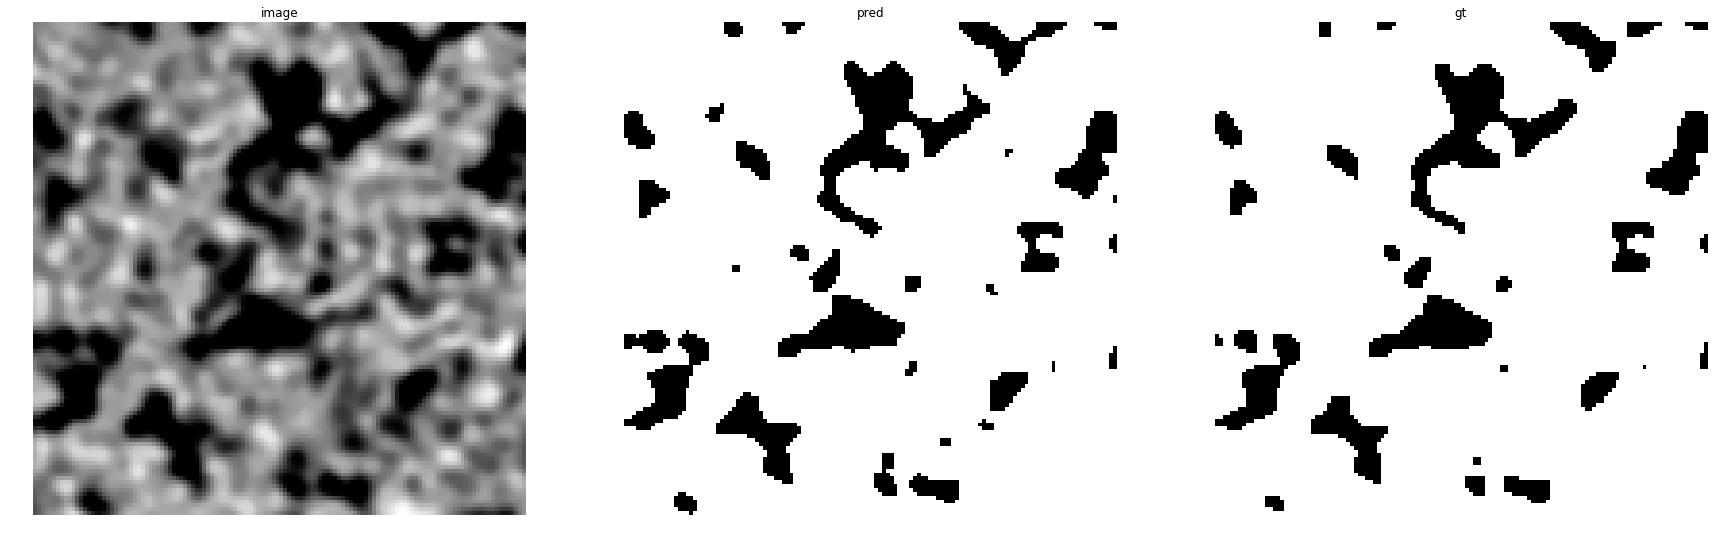

accuracy    : 0.98291015625
precision   : 0.9980767860958758
recall      : 0.9822642832106554
f1          : 0.9901074053137365
pr_auc      : 0.9998108794735282
iou         : 0.9804086202071088


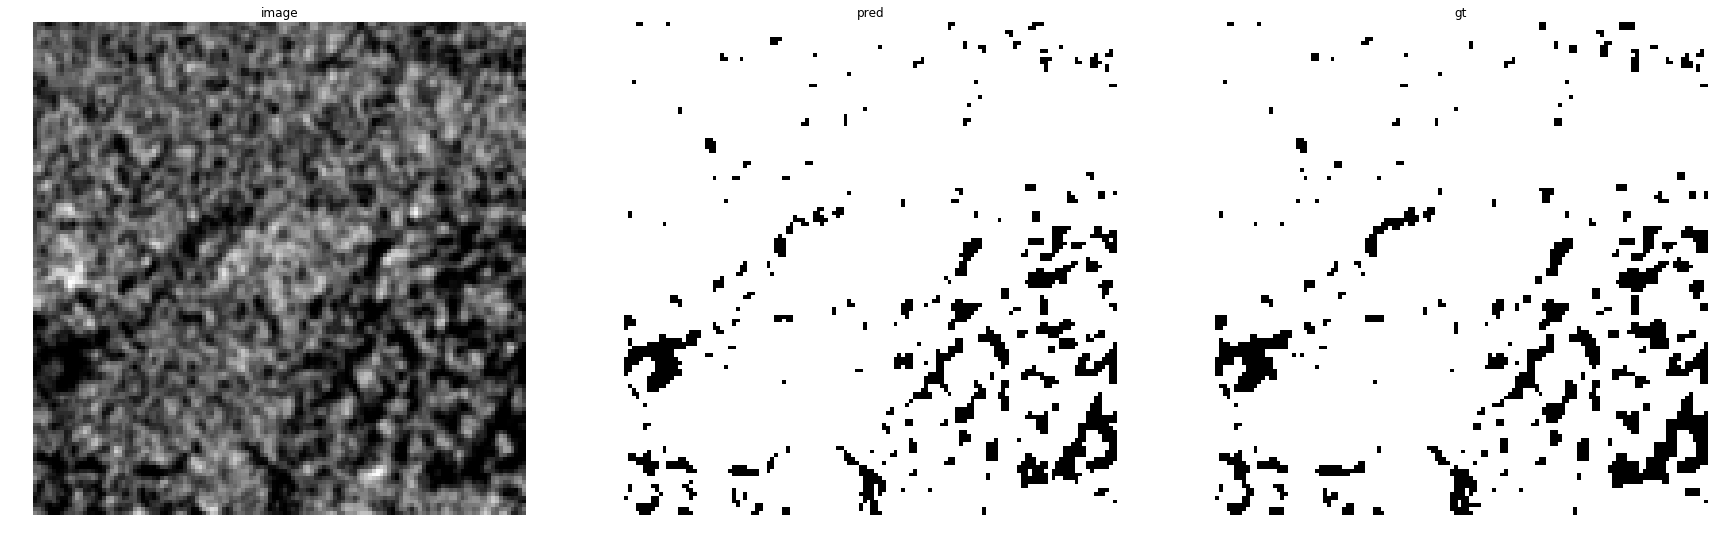

accuracy    : 0.98333740234375
precision   : 0.9837953662782911
recall      : 0.9978944508591999
f1          : 0.9907947533465961
pr_auc      : 0.9997112828800397
iou         : 0.9817574340126963


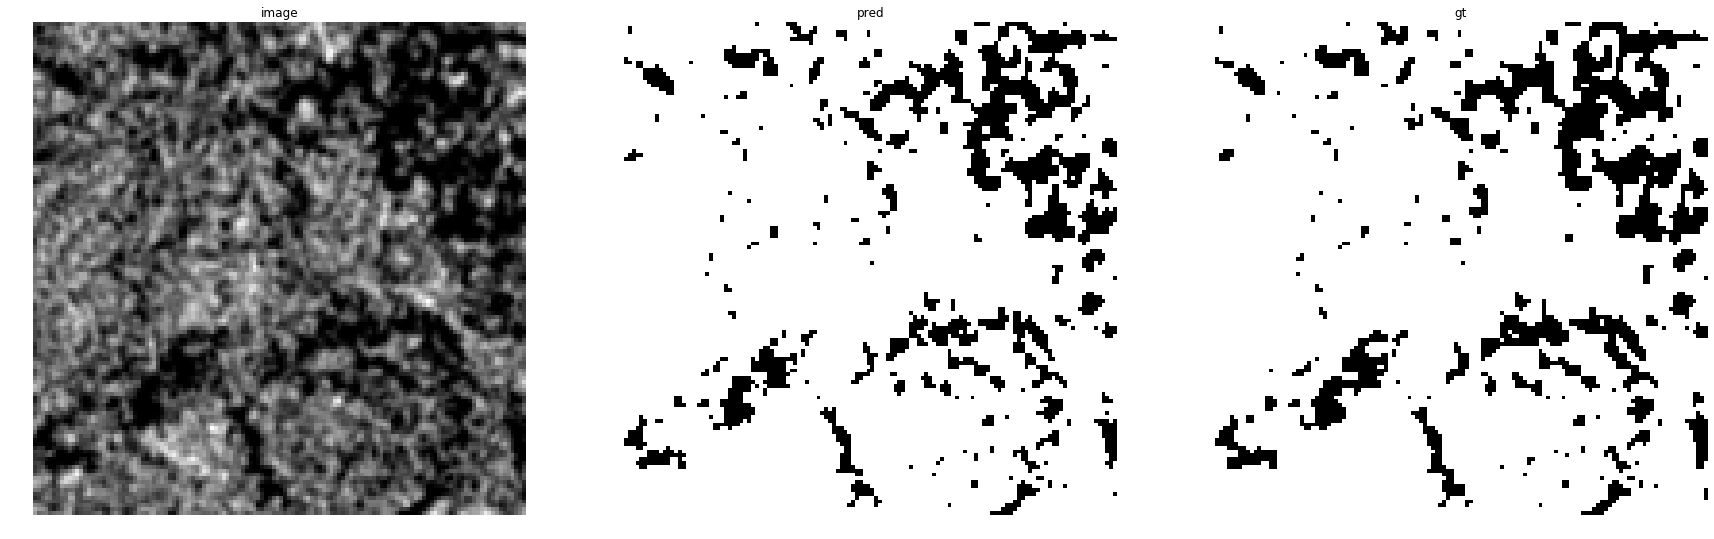

accuracy    : 0.9761962890625
precision   : 0.9749928754630949
recall      : 0.9971582628971145
f1          : 0.9859510086455331
pr_auc      : 0.9995544727017966
iou         : 0.9722912966252221


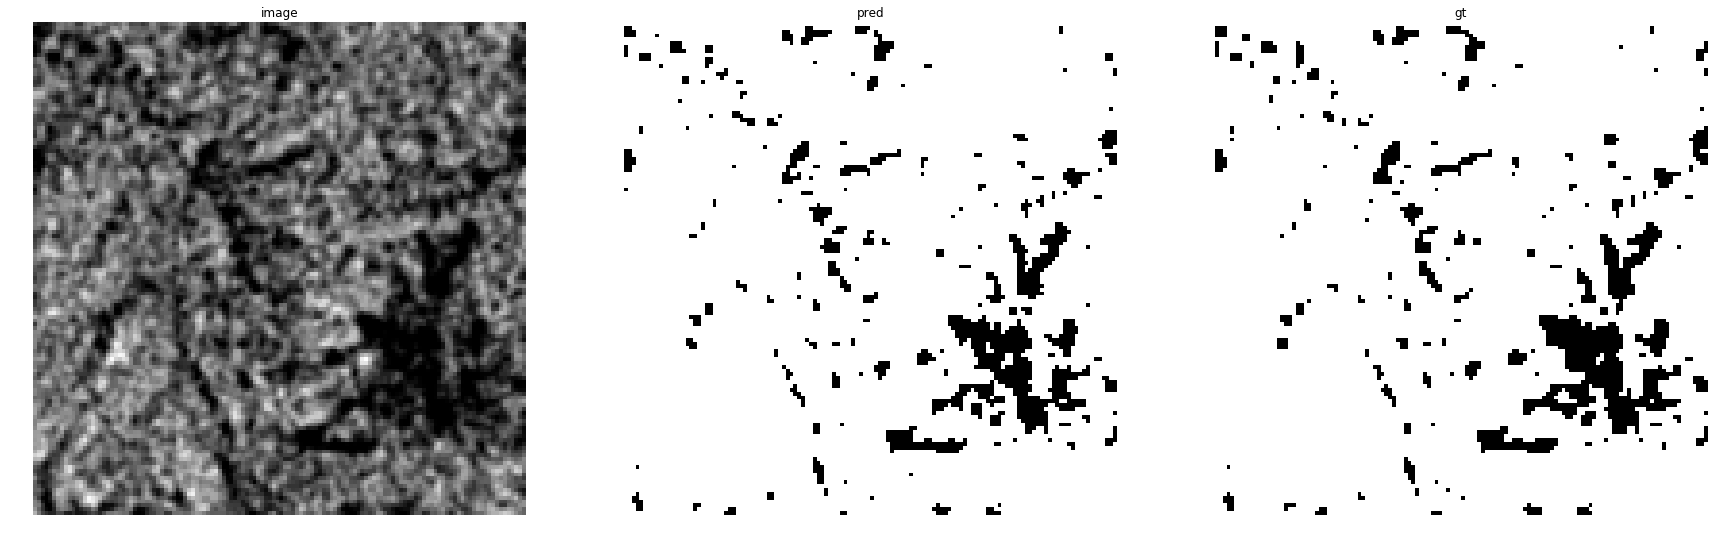

accuracy    : 0.98577880859375
precision   : 0.9868806606286628
recall      : 0.9975765735442612
f1          : 0.9921997924408289
pr_auc      : 0.9998084332933805
iou         : 0.9845203295243157


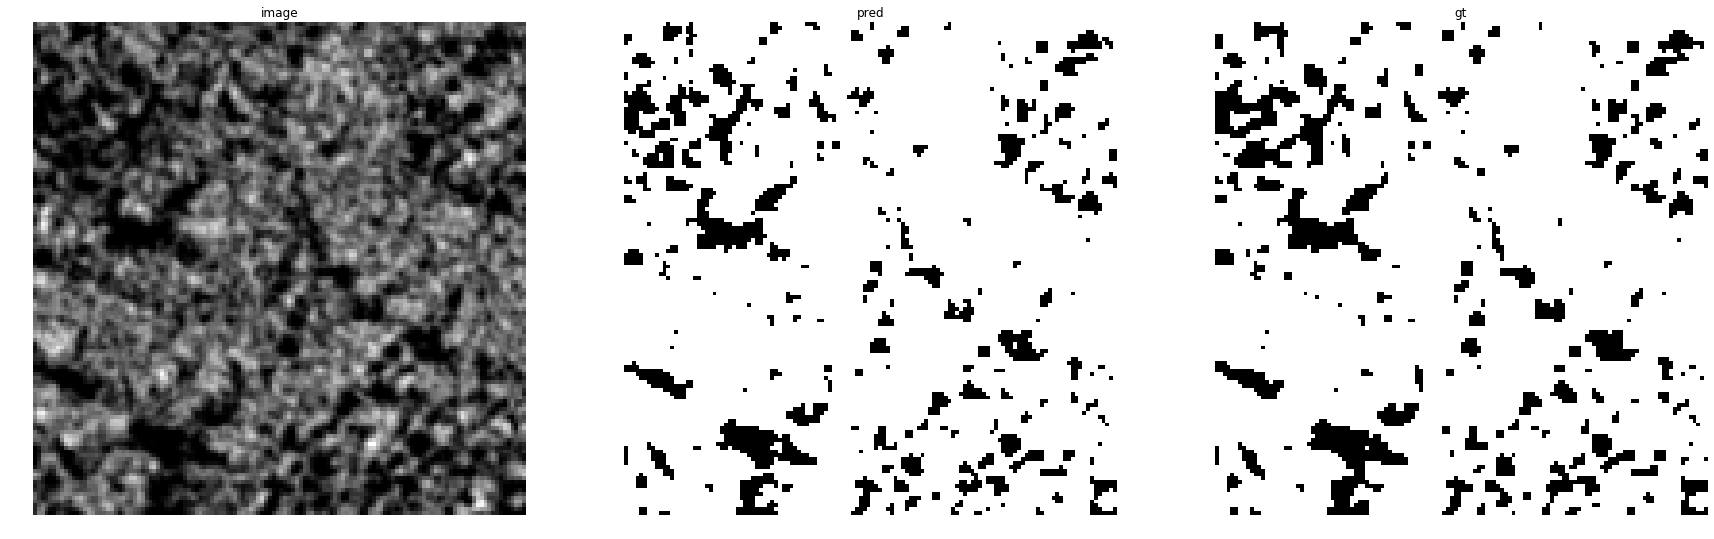

accuracy    : 0.97796630859375
precision   : 0.97802662159307
recall      : 0.99648392652124
f1          : 0.9871690065754399
pr_auc      : 0.9994760604108055
iou         : 0.9746631106120157


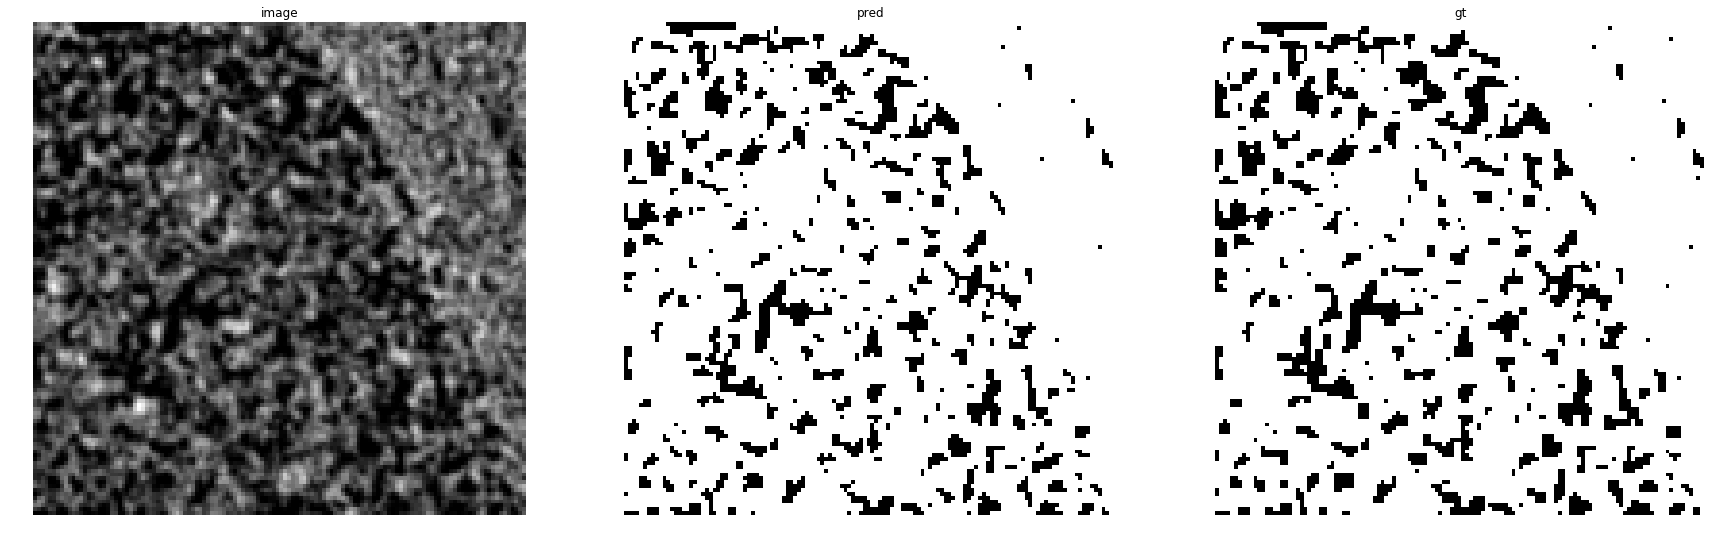

accuracy    : 0.9757080078125
precision   : 0.9758440255178841
recall      : 0.9955393053016454
f1          : 0.9855932816911606
pr_auc      : 0.9993826119316909
iou         : 0.9715957750499572


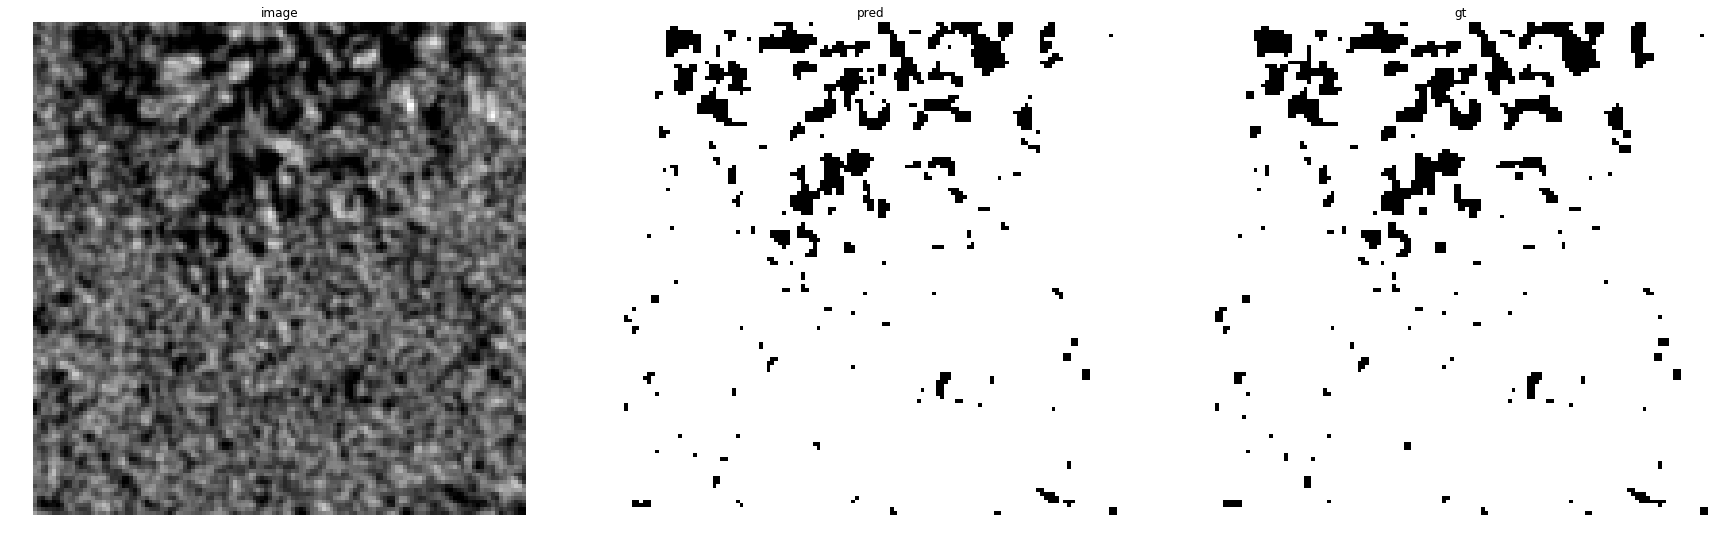

accuracy    : 0.98724365234375
precision   : 0.9878202157940028
recall      : 0.9983275354562483
f1          : 0.9930460821826651
pr_auc      : 0.9998440775792151
iou         : 0.9861882104150146


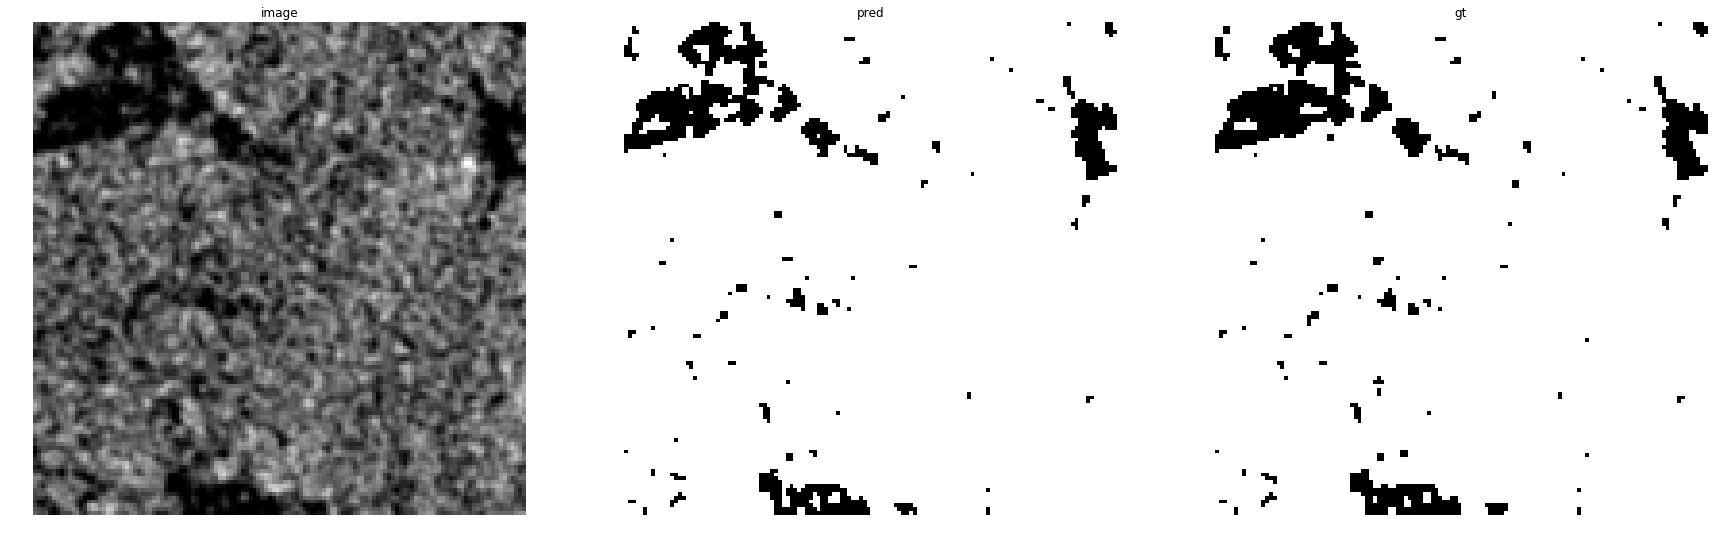

accuracy    : 0.99041748046875
precision   : 0.9904105090311986
recall      : 0.999271040424122
f1          : 0.9948210456869536
pr_auc      : 0.9999298340297482
iou         : 0.9896954581254922


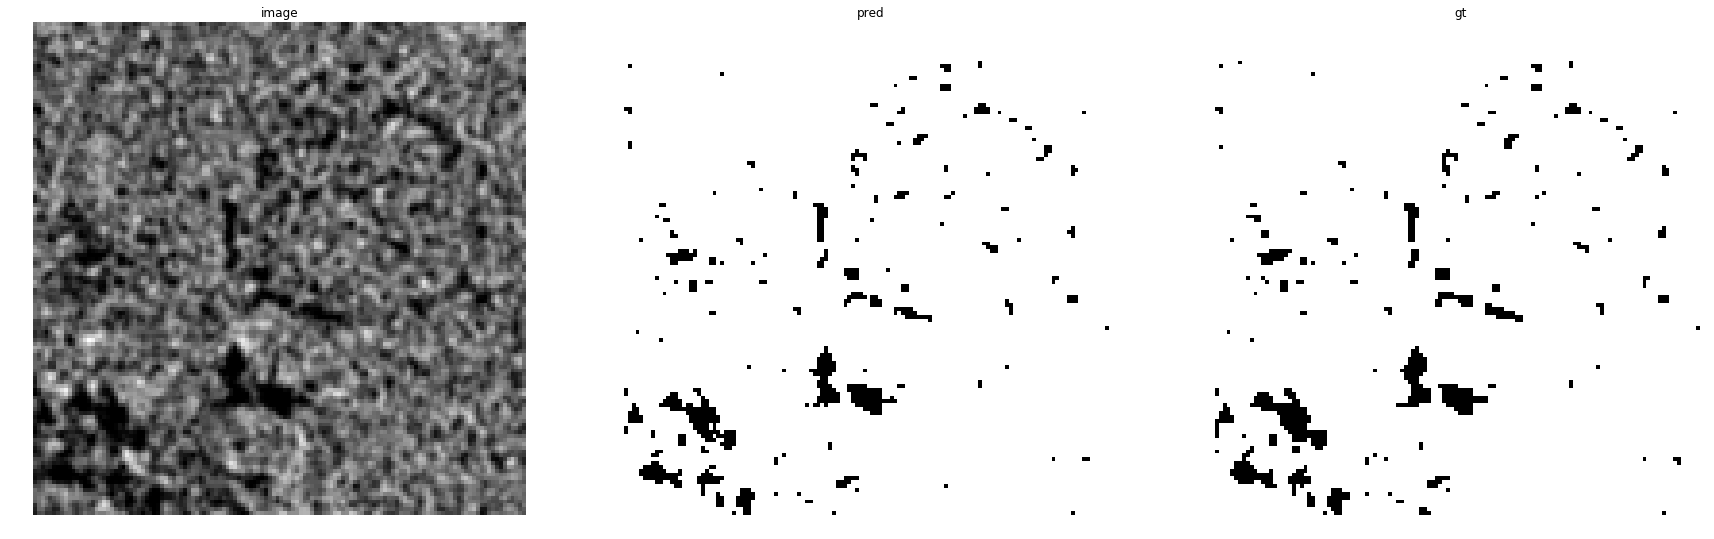

accuracy    : 0.99359130859375
precision   : 0.9944016794961511
recall      : 0.9989135991820041
f1          : 0.9966525329167596
pr_auc      : 0.9999618792734241
iou         : 0.9933274021352313


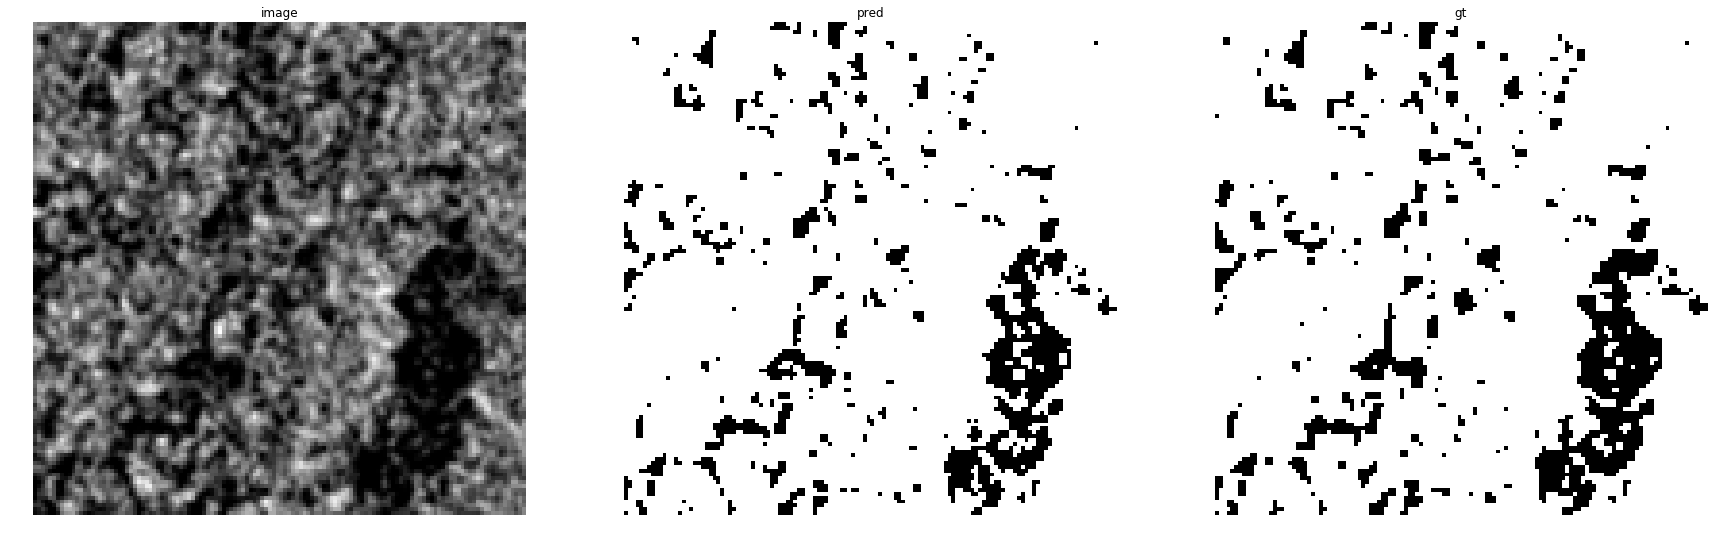

accuracy    : 0.97705078125
precision   : 0.9772507260406583
recall      : 0.9966854724964739
f1          : 0.9868724251099784
pr_auc      : 0.9995928522264521
iou         : 0.9740850506582122


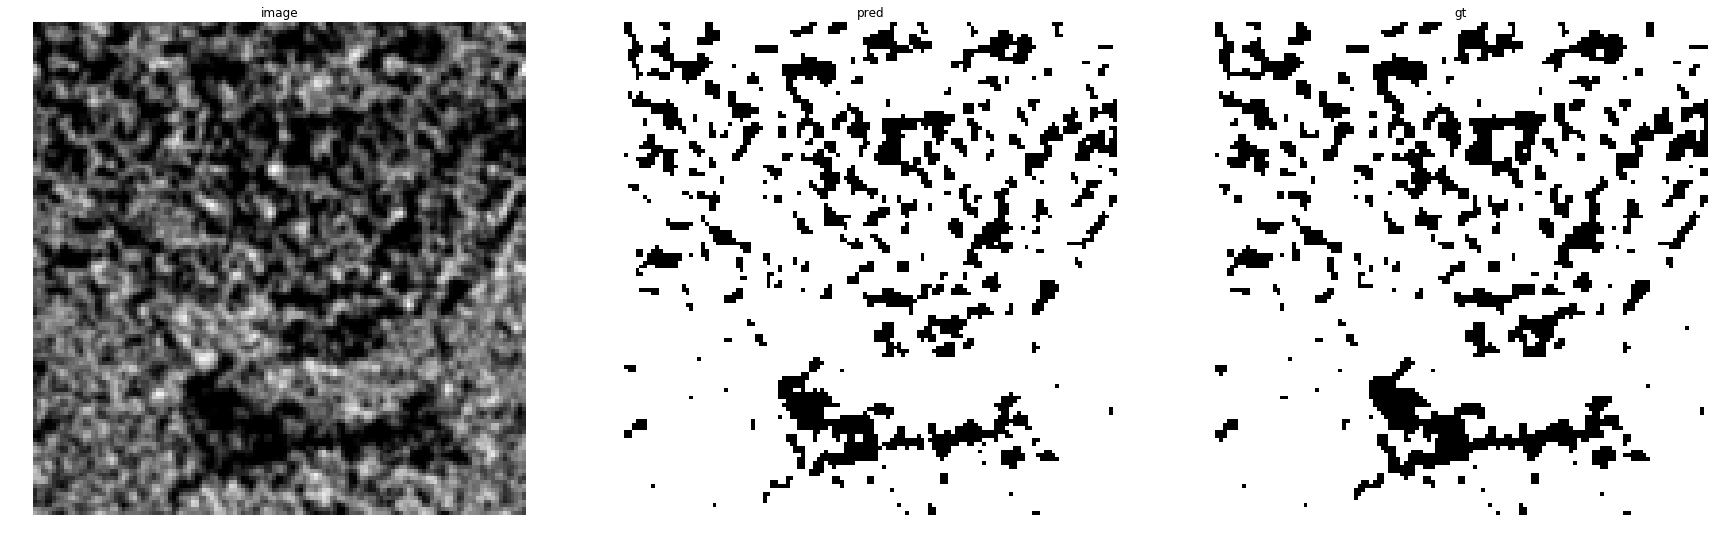

accuracy    : 0.9736328125
precision   : 0.9725432462274568
recall      : 0.9955542159596111
f1          : 0.9839142091152815
pr_auc      : 0.999311539403233
iou         : 0.9683377308707124


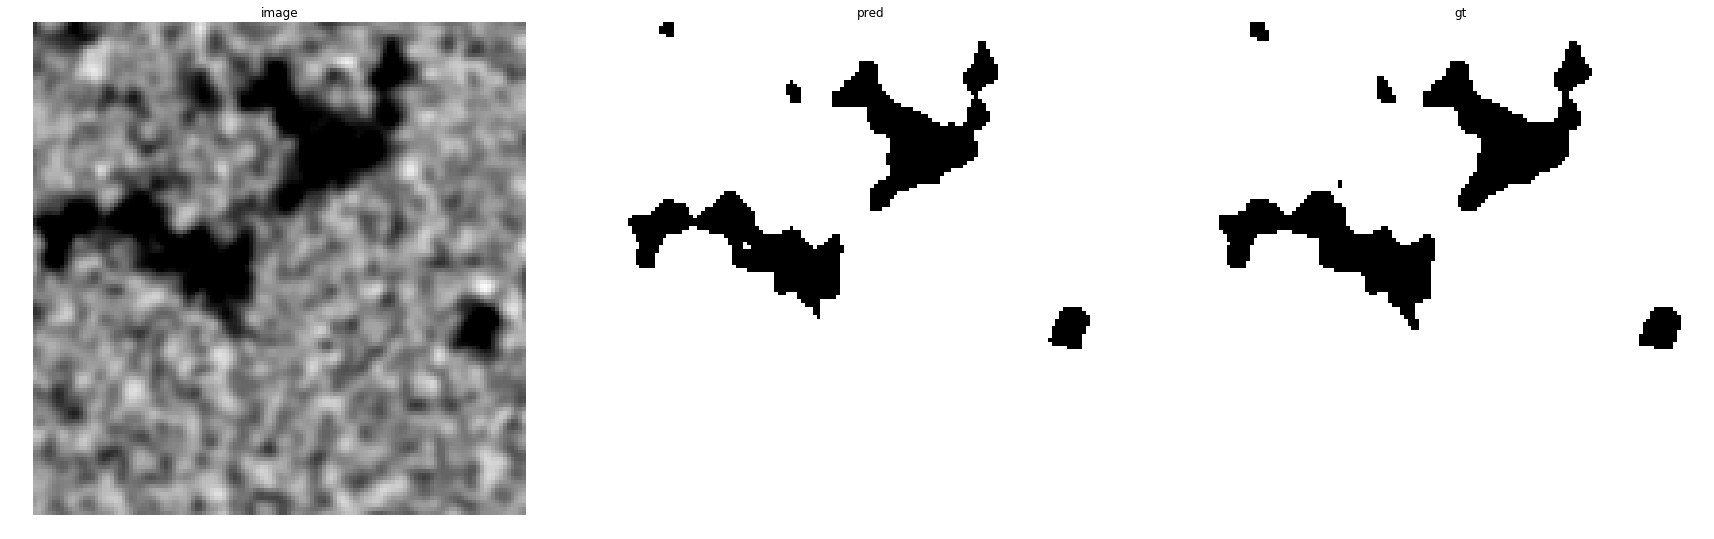

accuracy    : 0.99151611328125
precision   : 0.9906861431251676
recall      : 1.0
f1          : 0.9953212831128615
pr_auc      : 0.9999791799195673
iou         : 0.9906861431251676


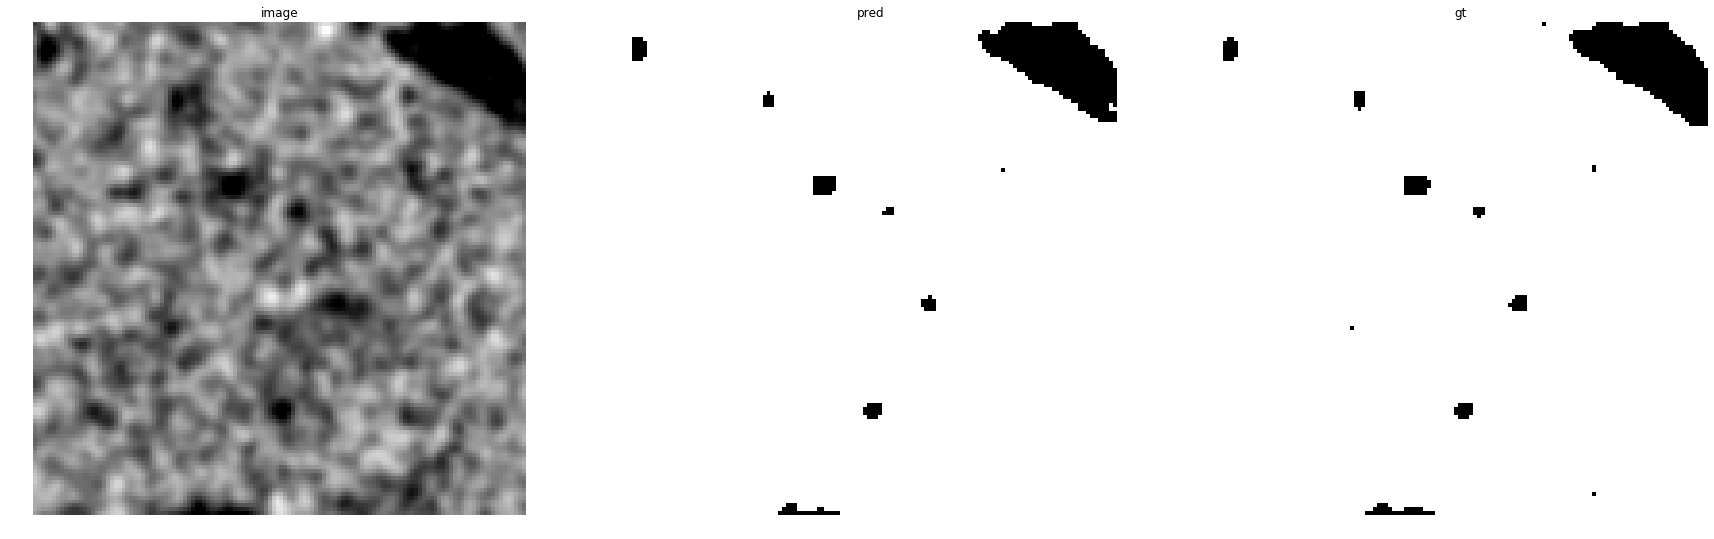

accuracy    : 0.99749755859375
precision   : 0.9974585424741089
recall      : 0.999936305732484
f1          : 0.9986958872737682
pr_auc      : 0.9999975862227646
iou         : 0.9973951715374841


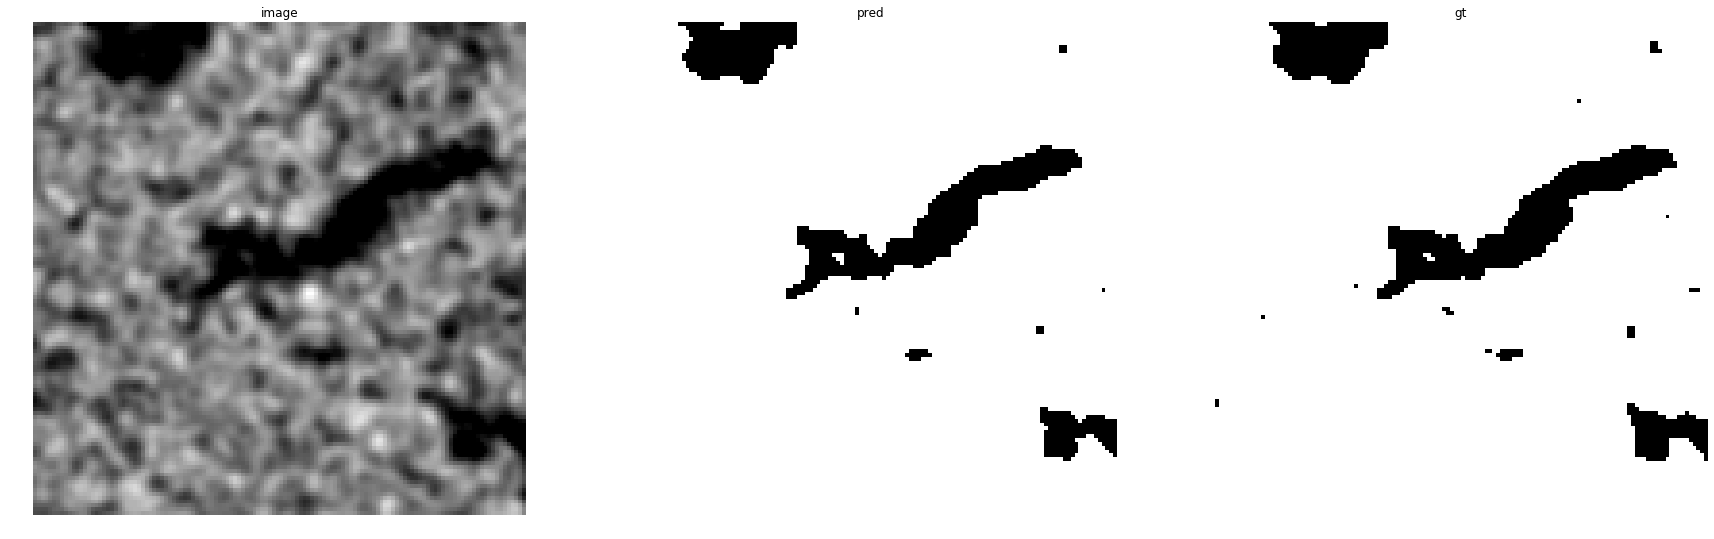

accuracy    : 0.9920654296875
precision   : 0.9914972764713698
recall      : 0.99986602357985
f1          : 0.9956640651057301
pr_auc      : 0.9999863329416813
iou         : 0.9913655685441021


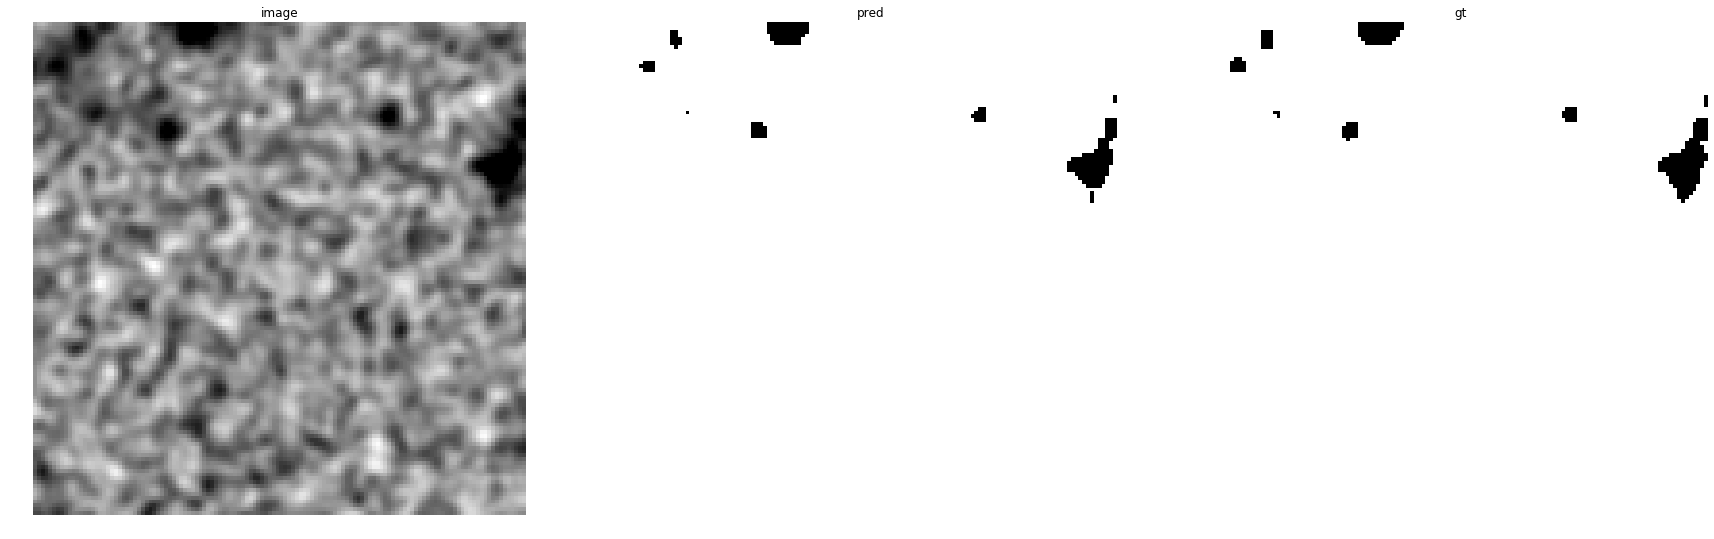

accuracy    : 0.99700927734375
precision   : 0.9970304380103935
recall      : 0.9999379537134703
f1          : 0.9984820792416591
pr_auc      : 0.9999975582500417
iou         : 0.9969687596659449


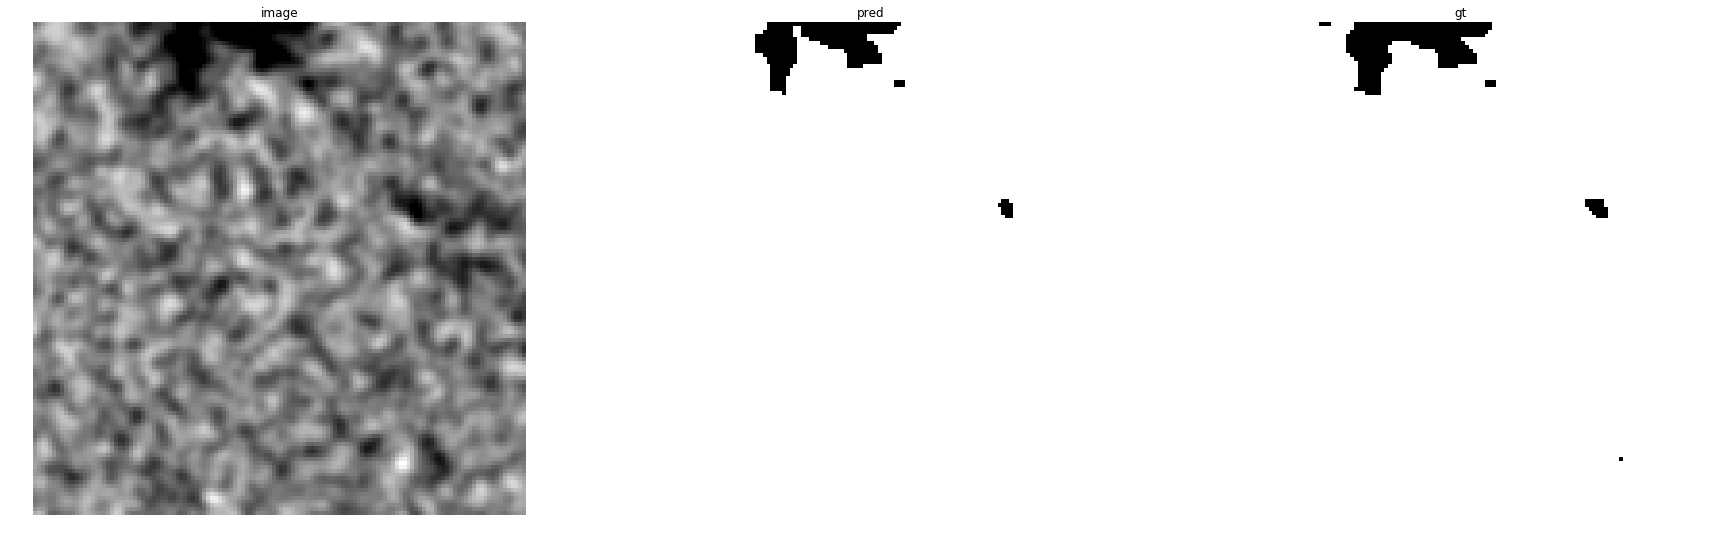

accuracy    : 0.9962158203125
precision   : 0.9961380341347951
recall      : 1.0
f1          : 0.9980652811583348
pr_auc      : 0.9999991402038462
iou         : 0.9961380341347951


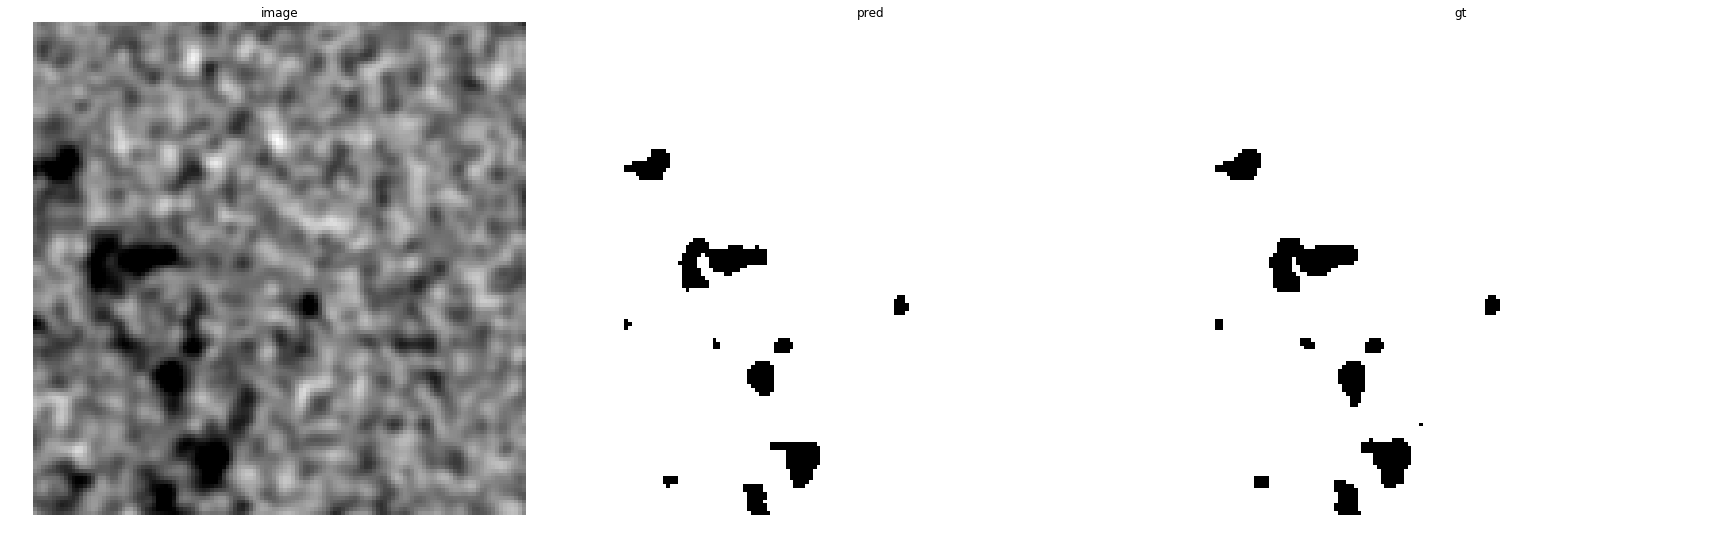

accuracy    : 0.99542236328125
precision   : 0.9953555513713676
recall      : 0.999936948297604
f1          : 0.9976409901550656
pr_auc      : 0.9999947015530286
iou         : 0.9952930839713819


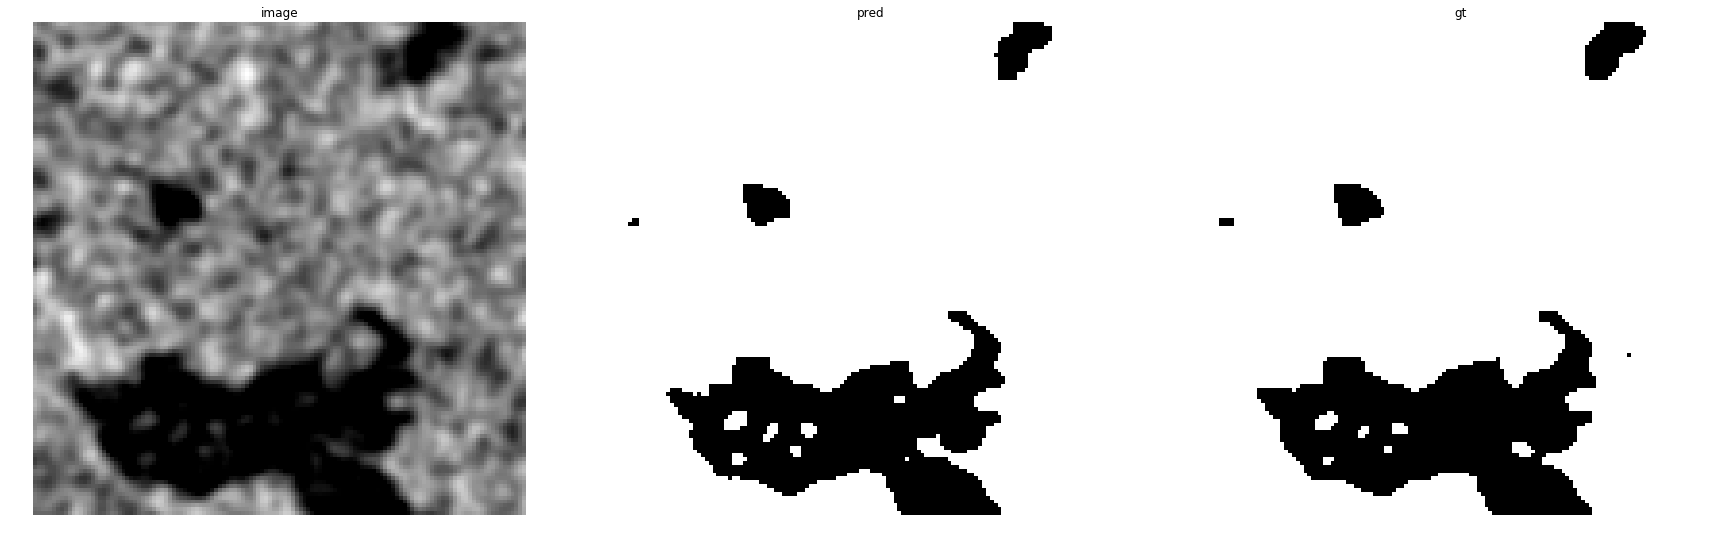

accuracy    : 0.9915771484375
precision   : 0.9901133001371148
recall      : 0.999927119014649
f1          : 0.9949960113133657
pr_auc      : 0.9999816583954566
iou         : 0.9900418530812527


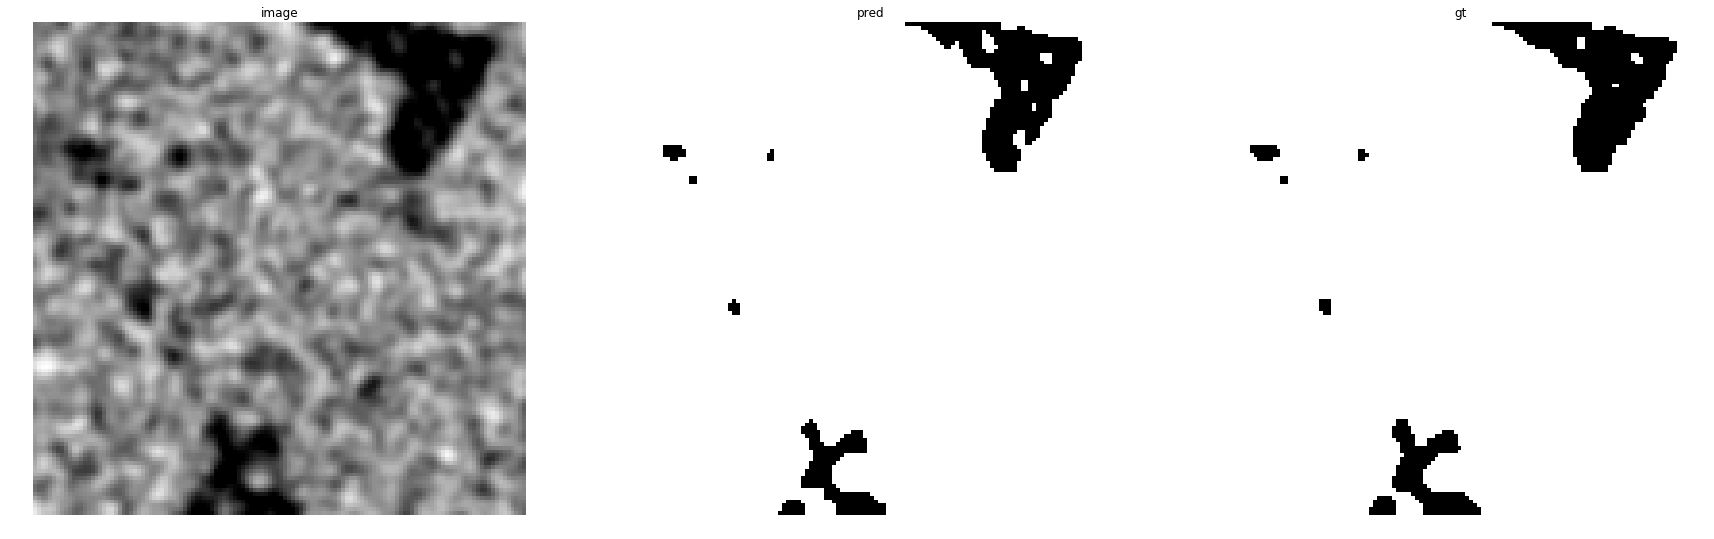

accuracy    : 0.9930419921875
precision   : 0.992661384595402
recall      : 0.9999345806620437
f1          : 0.9962847086429409
pr_auc      : 0.9999930701569735
iou         : 0.992596921878044


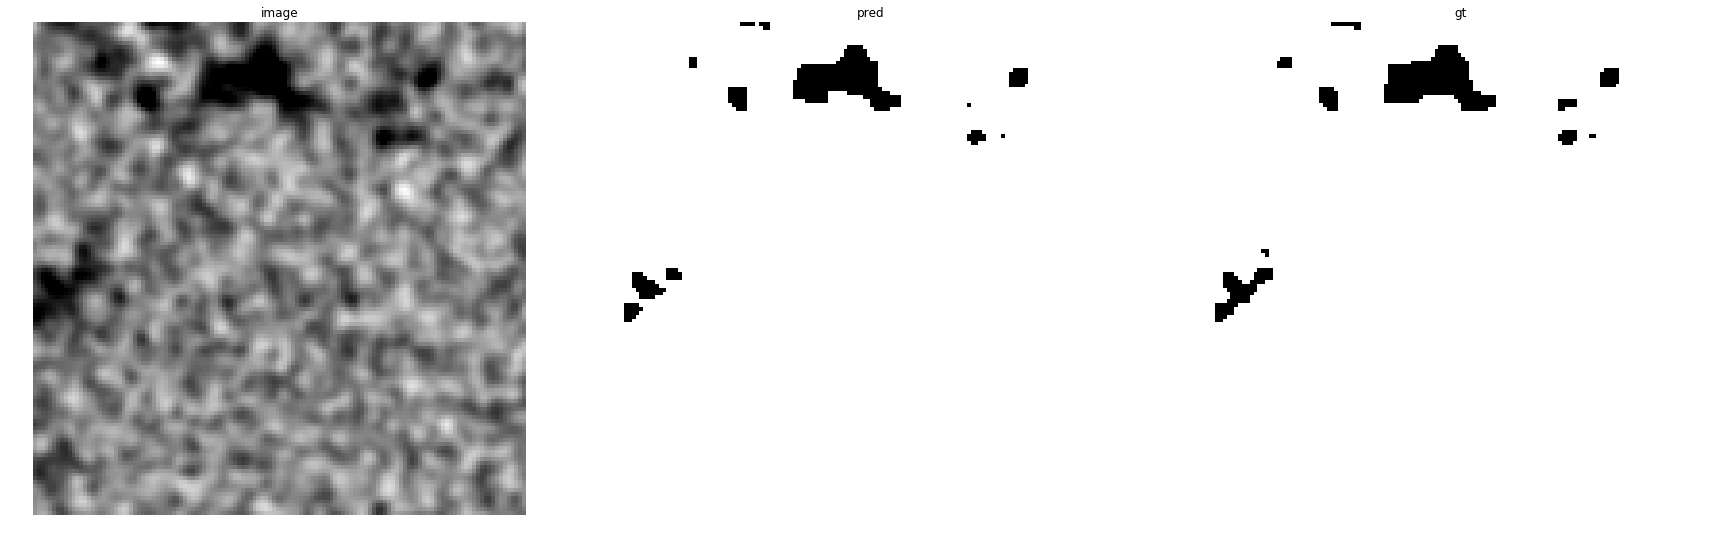

accuracy    : 0.99566650390625
precision   : 0.9957460118861433
recall      : 0.9998115577889447
f1          : 0.9977746434728099
pr_auc      : 0.9999928988741005
iou         : 0.9955591693770328


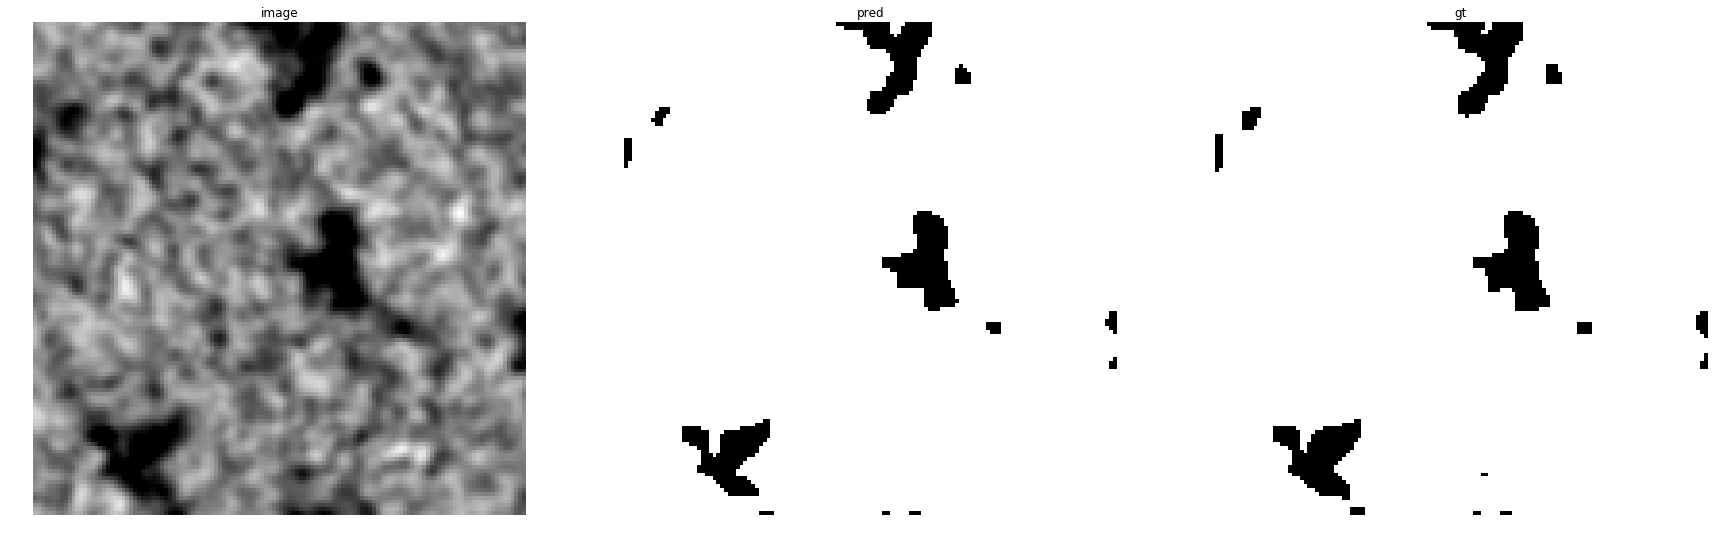

accuracy    : 0.99456787109375
precision   : 0.9943502824858758
recall      : 0.9999354380528117
f1          : 0.9971350394334461
pr_auc      : 0.9999910837683236
iou         : 0.9942864479681581


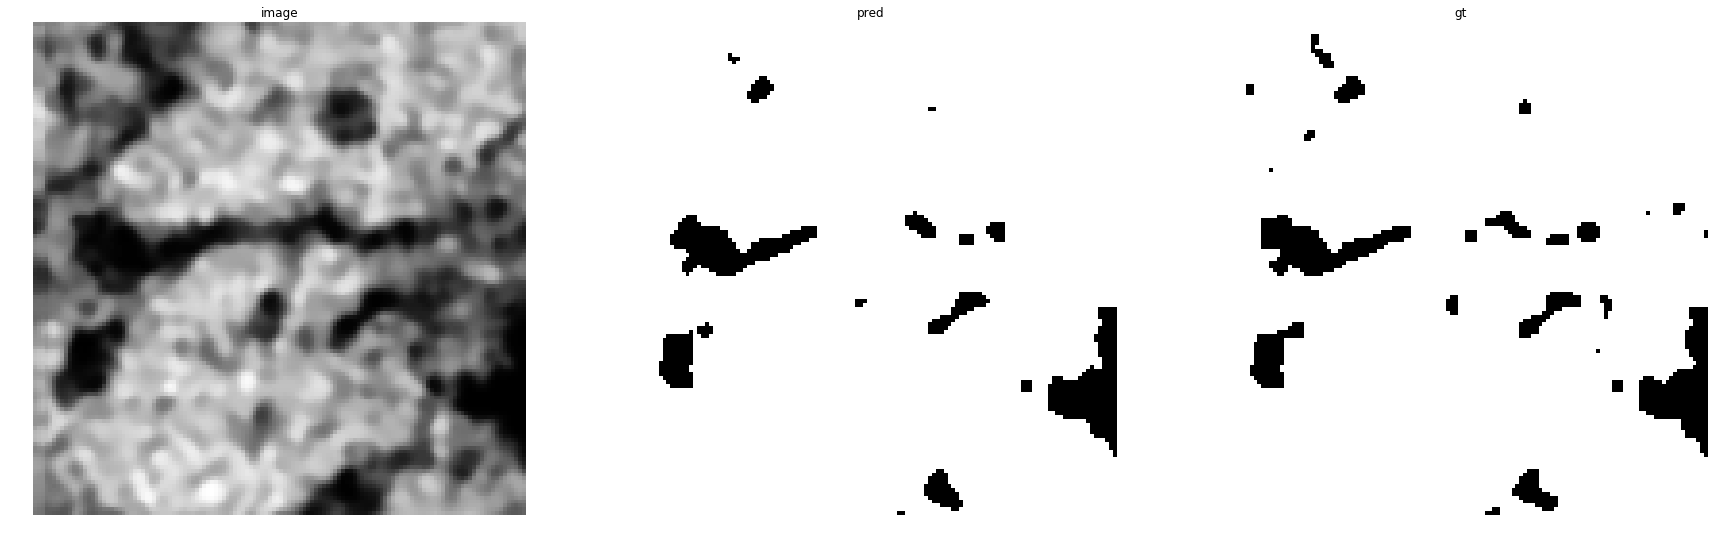

accuracy    : 0.989013671875
precision   : 0.989742258001688
recall      : 0.9985589834283094
f1          : 0.9941310727094881
pr_auc      : 0.9998838489868639
iou         : 0.9883306320907618


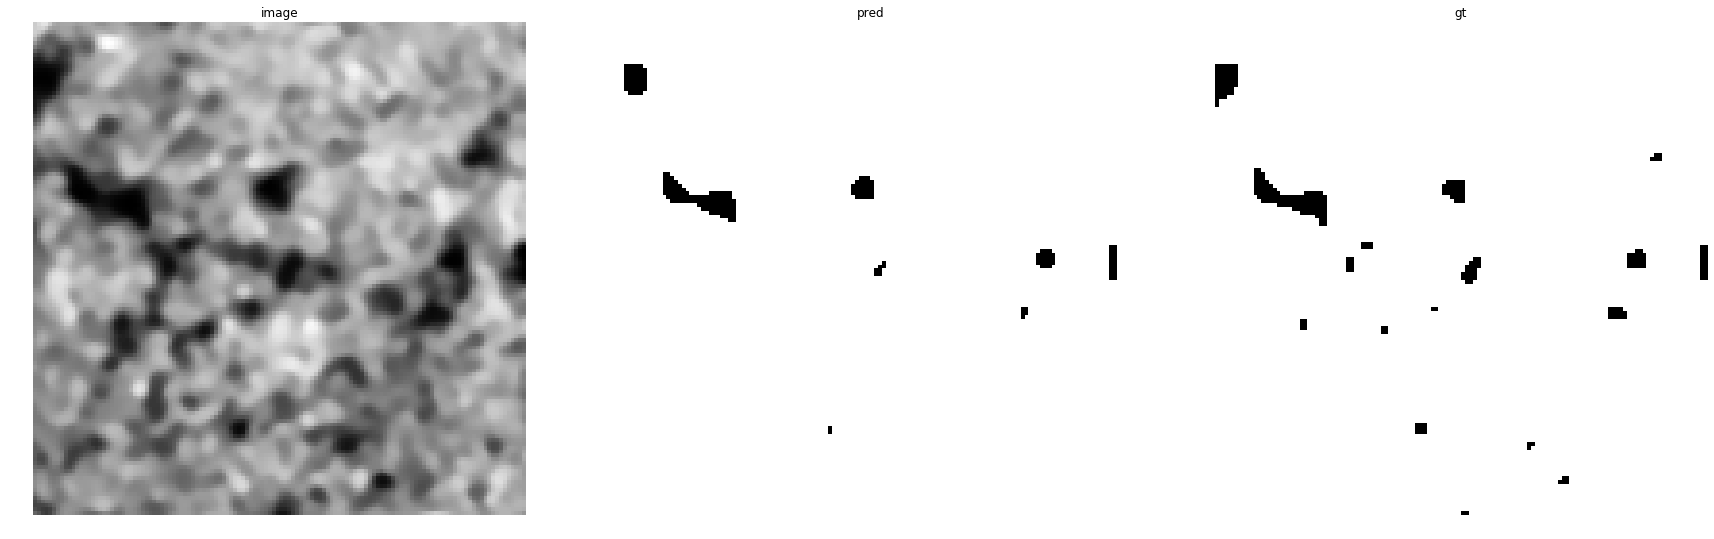

accuracy    : 0.99383544921875
precision   : 0.9942436246595692
recall      : 0.9995022089477942
f1          : 0.9968659819406088
pr_auc      : 0.9999674124667558
iou         : 0.9937515466468696


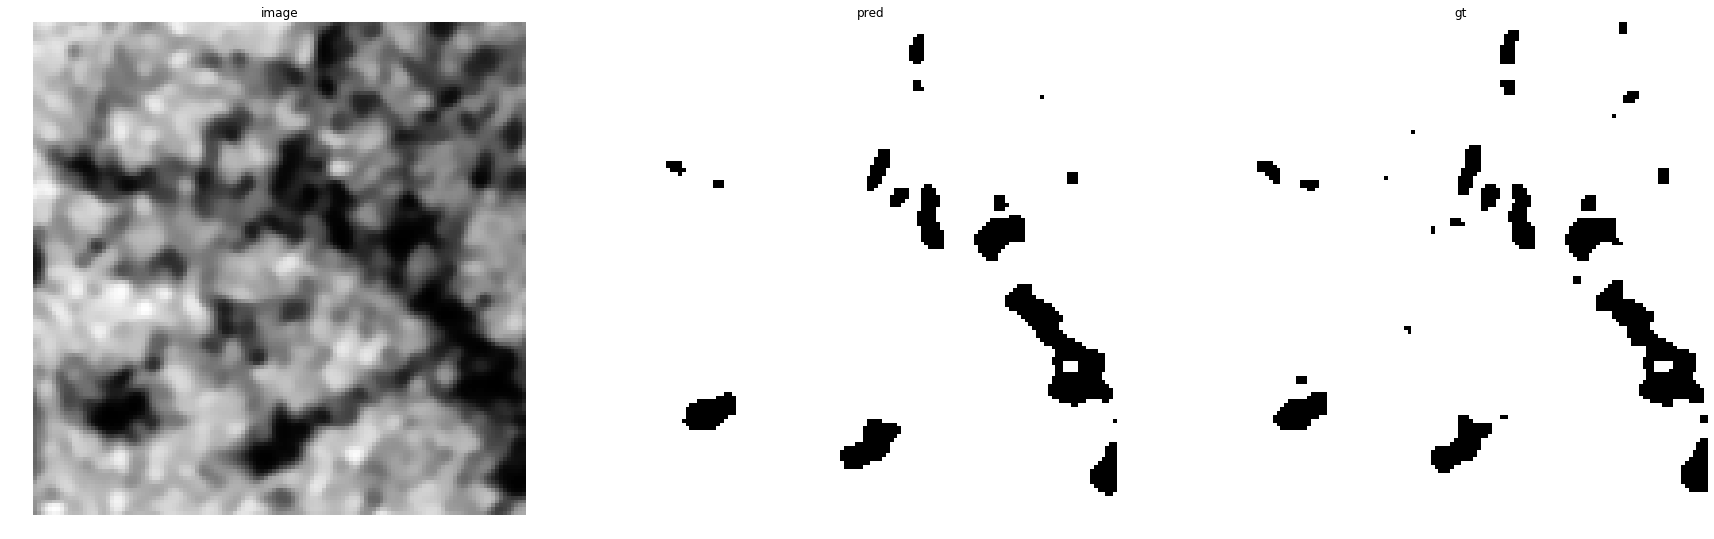

accuracy    : 0.9898681640625
precision   : 0.9909437867908661
recall      : 0.9983056370153144
f1          : 0.9946110894689002
pr_auc      : 0.9998896347692381
iou         : 0.9892799483371004


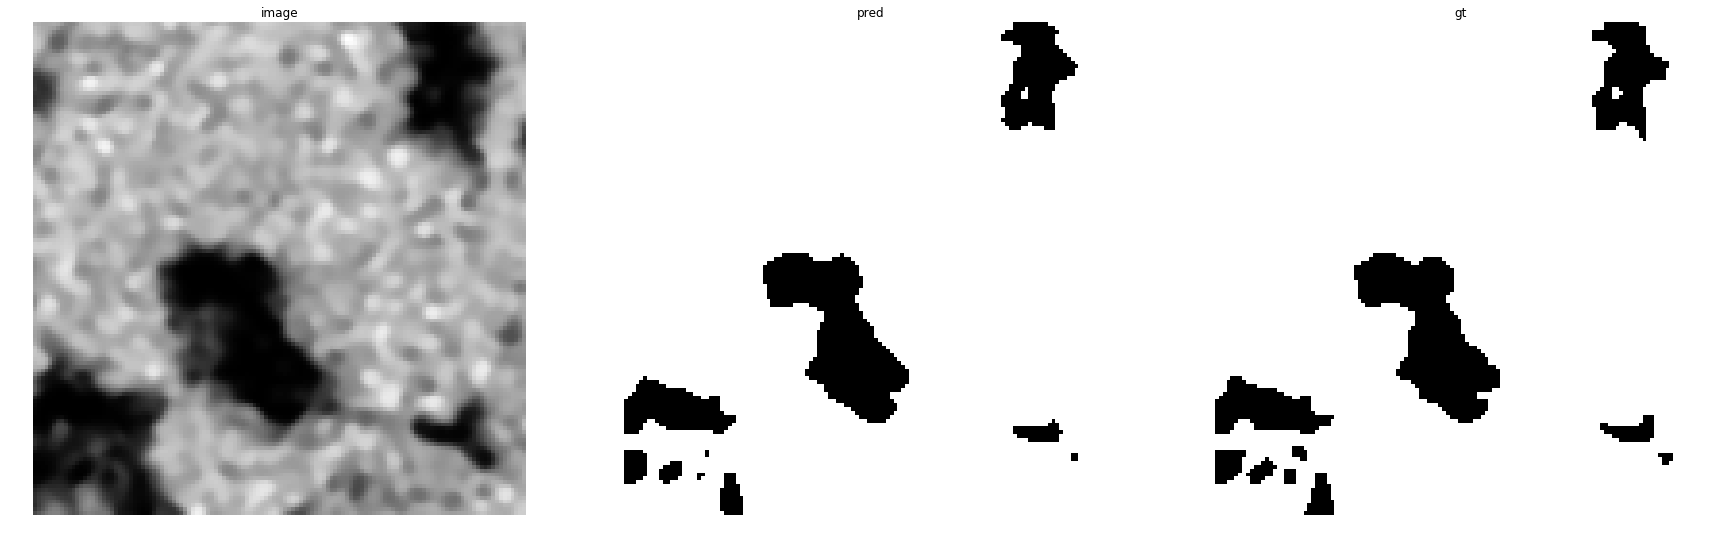

accuracy    : 0.99261474609375
precision   : 0.9944448208115981
recall      : 0.9973501834488382
f1          : 0.9958953831541097
pr_auc      : 0.9999376762530977
iou         : 0.9918243243243243


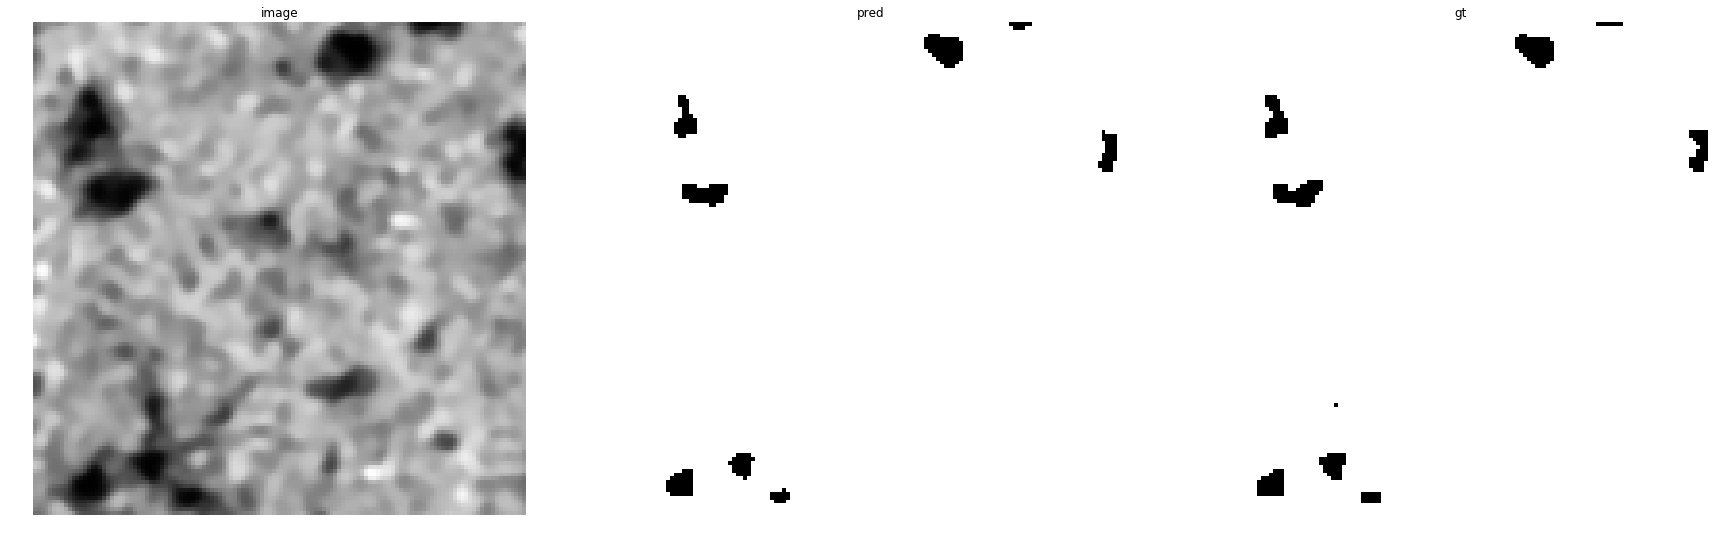

accuracy    : 0.99749755859375
precision   : 0.9980736966382899
recall      : 0.999377799900448
f1          : 0.9987253225555728
pr_auc      : 0.9999934837518903
iou         : 0.9974538905793952


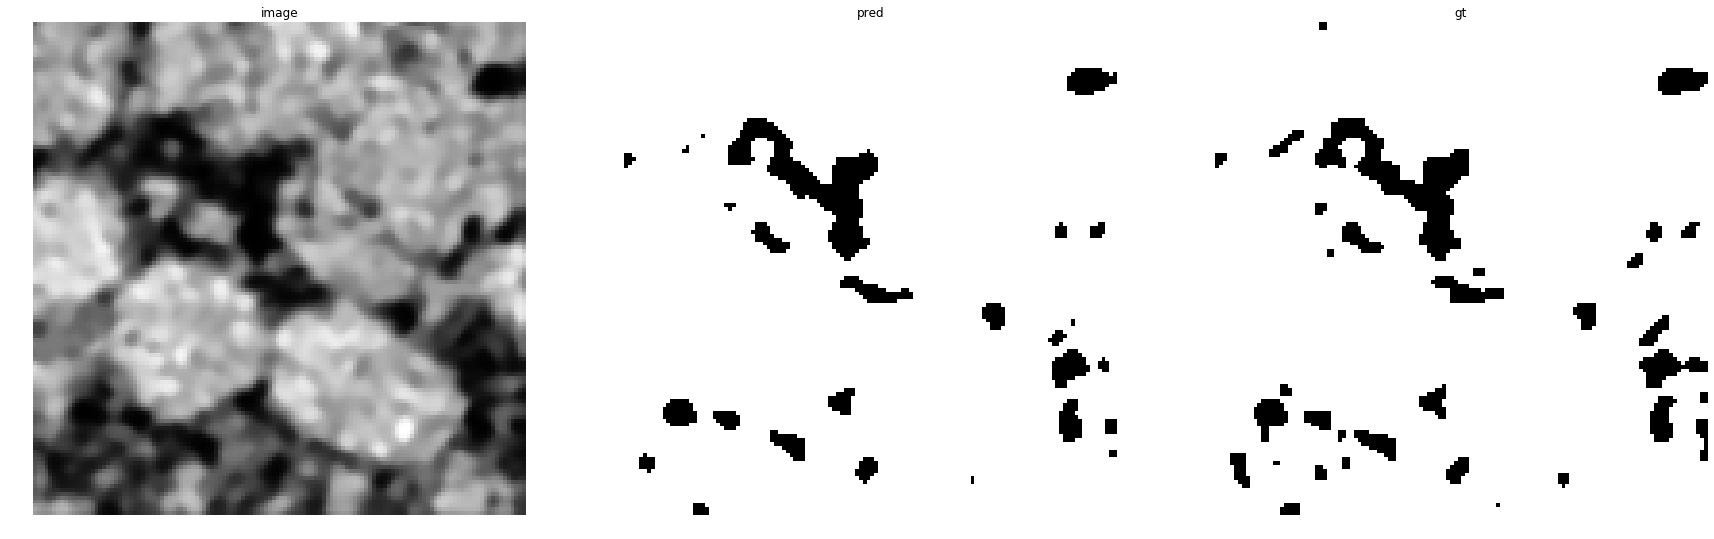

accuracy    : 0.98211669921875
precision   : 0.9831537708129285
recall      : 0.9976808905380334
f1          : 0.990364060907028
pr_auc      : 0.9997258617708199
iou         : 0.9809120521172638


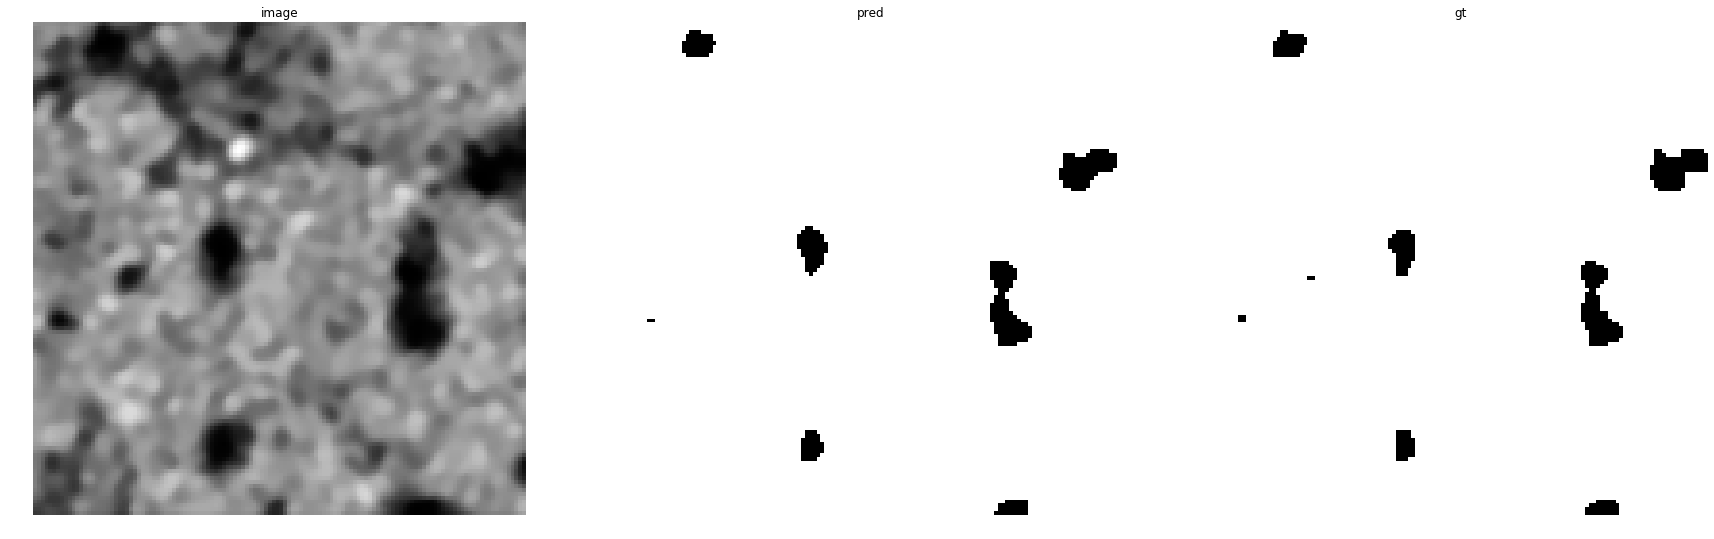

accuracy    : 0.99700927734375
precision   : 0.998495392138424
recall      : 0.9984327983951855
f1          : 0.998464094285804
pr_auc      : 0.9999908423659802
iou         : 0.9969328993490235


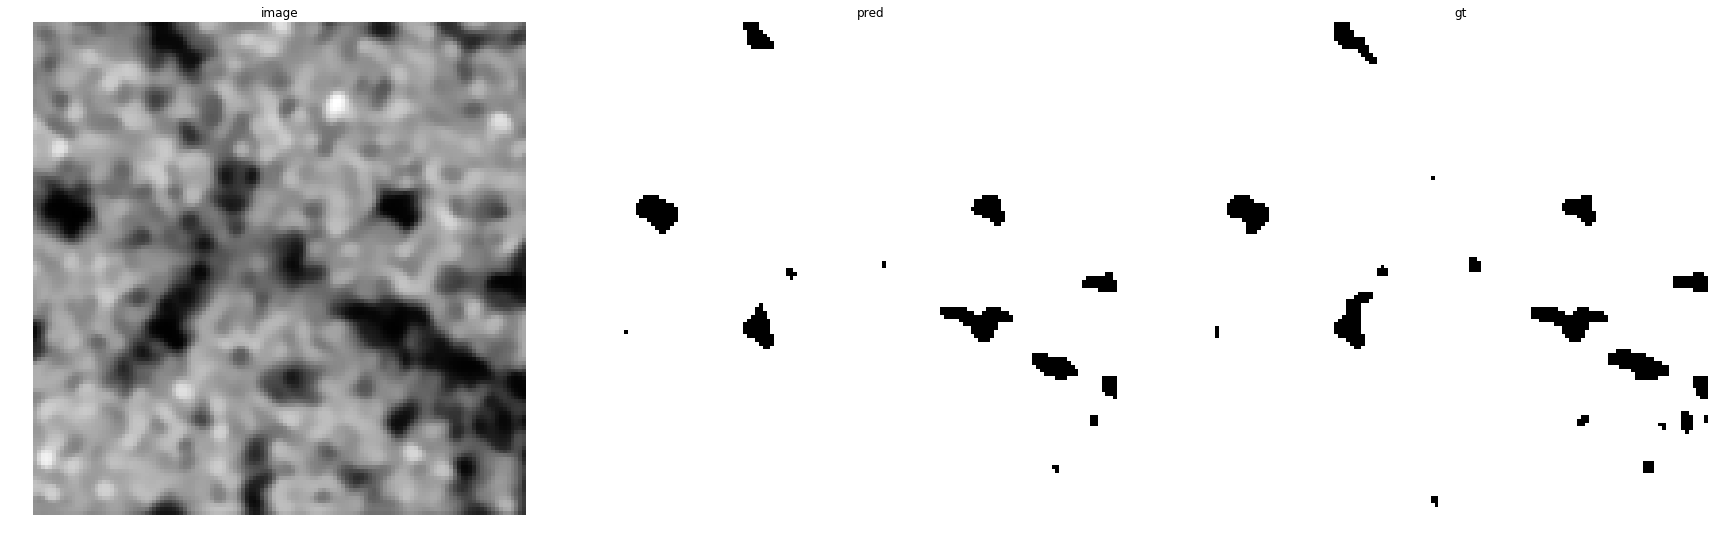

accuracy    : 0.9918212890625
precision   : 0.9923558897243108
recall      : 0.9992429022082019
f1          : 0.9957874882112544
pr_auc      : 0.999959514379291
iou         : 0.991610318056599


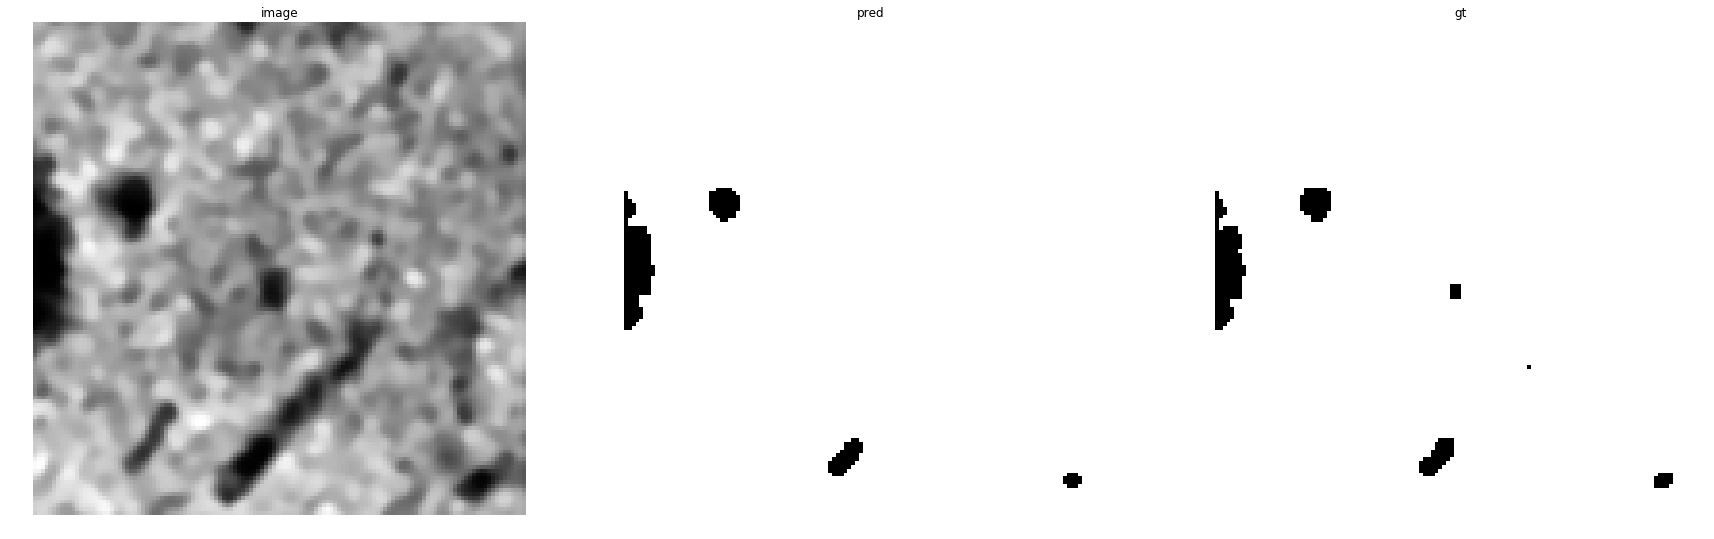

accuracy    : 0.99810791015625
precision   : 0.9984452736318408
recall      : 0.9996264242575182
f1          : 0.999035499828879
pr_auc      : 0.9999936737990546
iou         : 0.9980728583861743


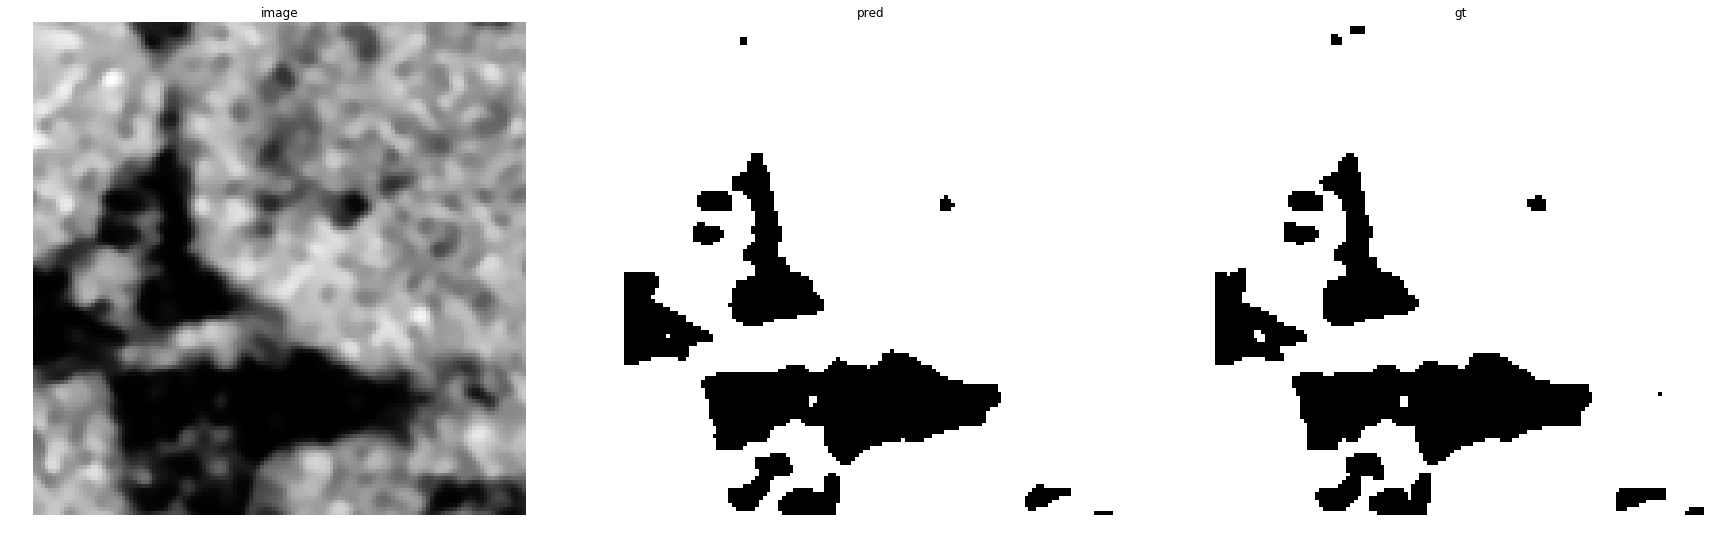

accuracy    : 0.9910888671875
precision   : 0.9935828105847574
recall      : 0.9958806099588061
f1          : 0.9947303833104743
pr_auc      : 0.9999123689840987
iou         : 0.9895160132126957


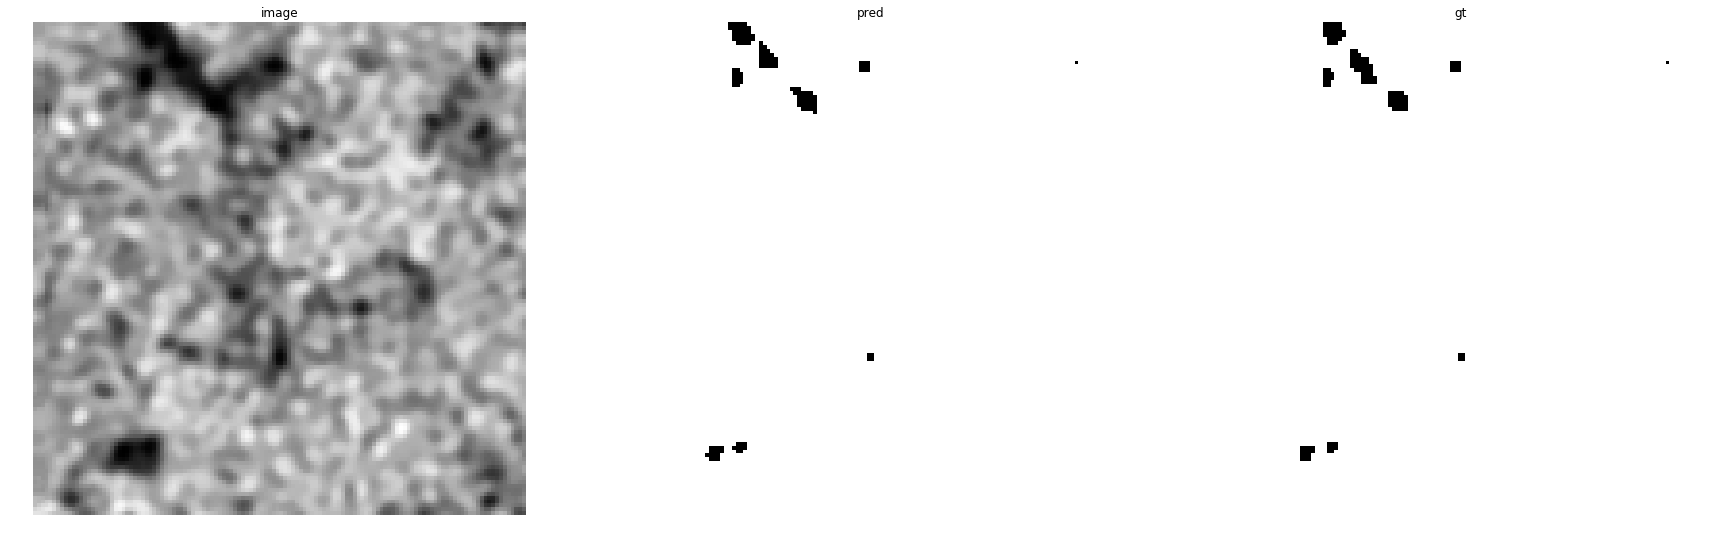

accuracy    : 0.99774169921875
precision   : 0.9988306253077301
recall      : 0.998892103157506
f1          : 0.9988613632866595
pr_auc      : 0.999993212895209
iou         : 0.9977253166113366


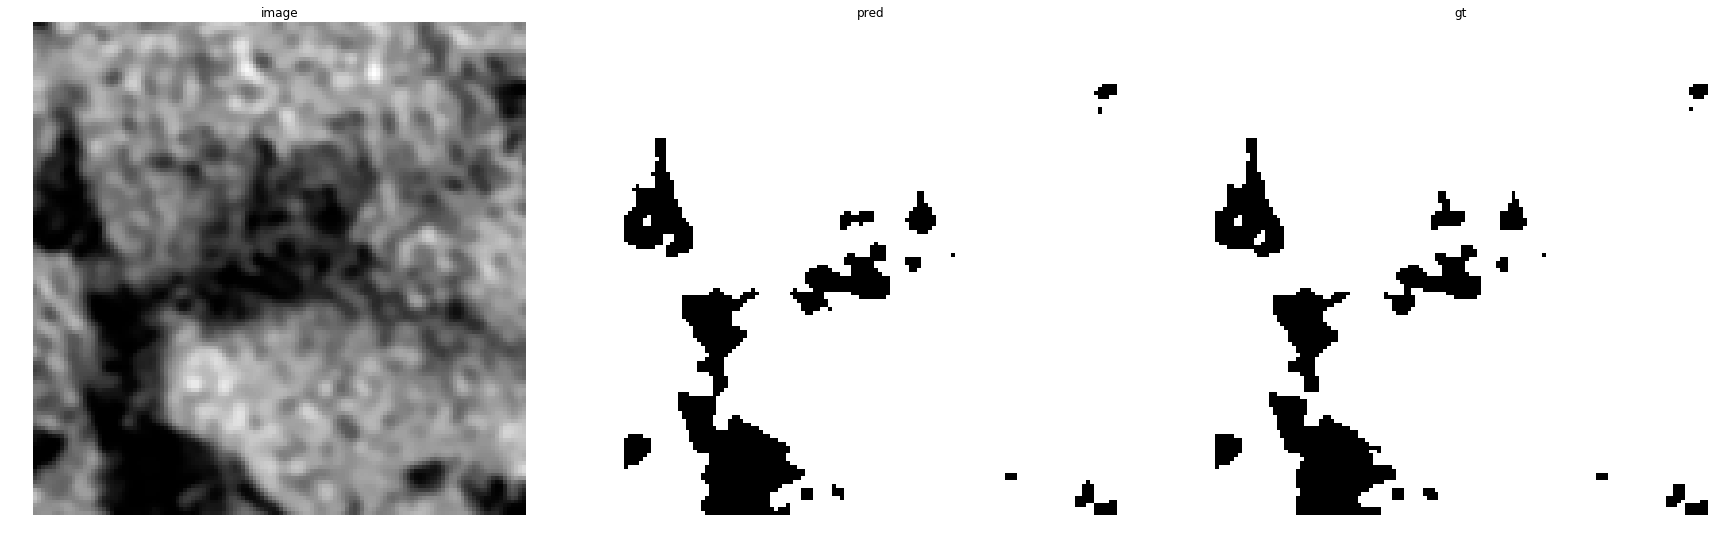

accuracy    : 0.991943359375
precision   : 0.9966302736217819
recall      : 0.9944855413584398
f1          : 0.9955567523899287
pr_auc      : 0.9999390506872083
iou         : 0.9911528150134048


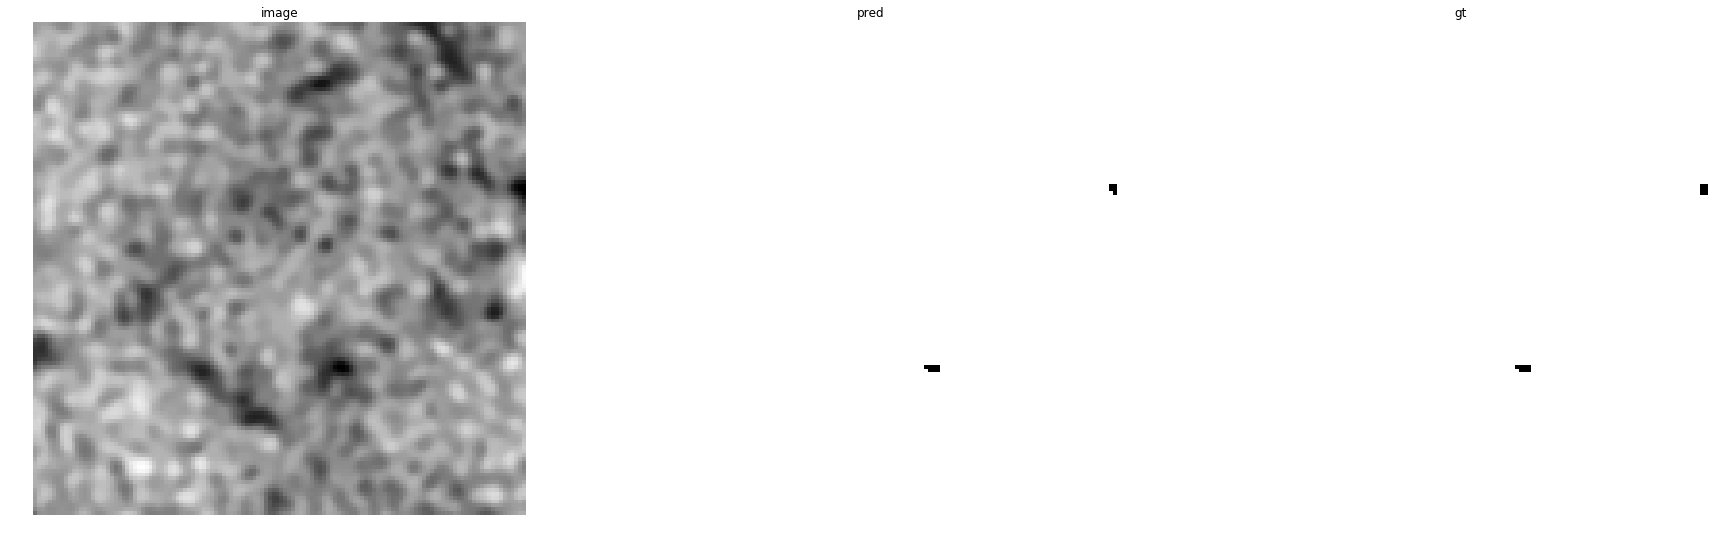

accuracy    : 0.99993896484375
precision   : 0.9999389201075006
recall      : 1.0
f1          : 0.9999694591210335
pr_auc      : 0.9999999888063728
iou         : 0.9999389201075006


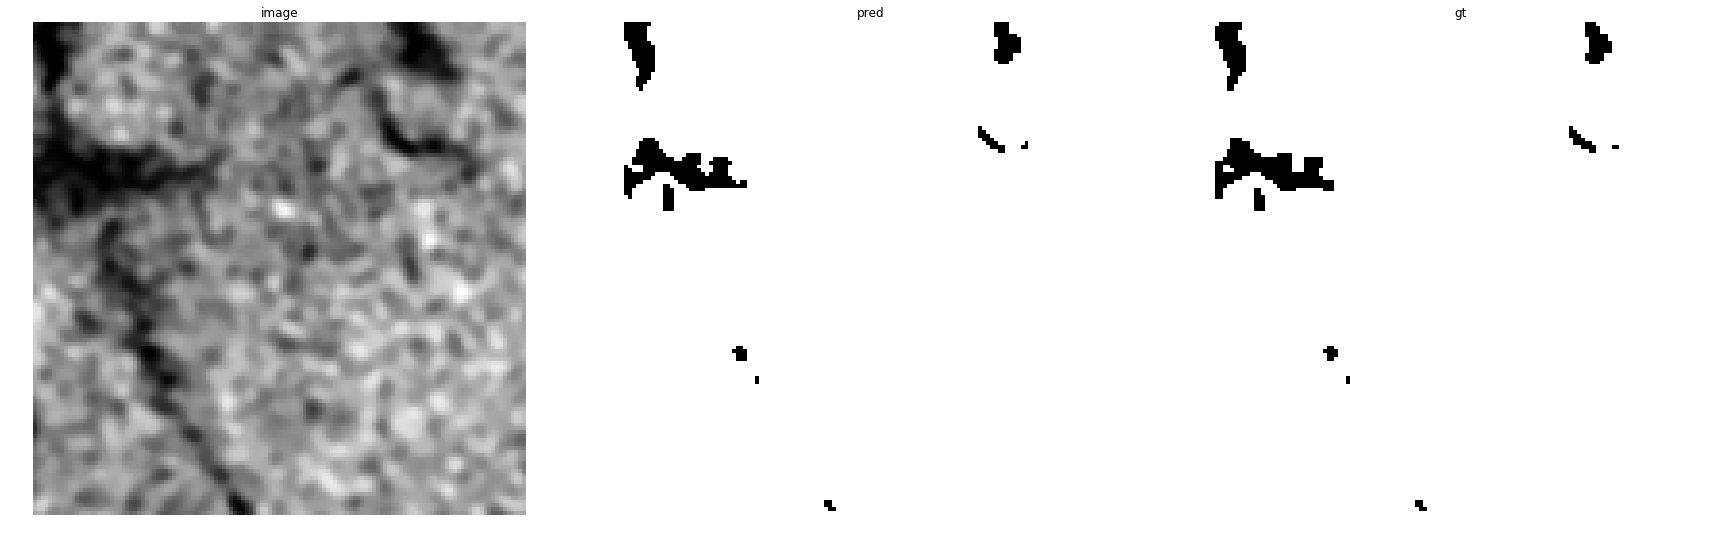

accuracy    : 0.9976806640625
precision   : 0.998622244488978
recall      : 0.9989976193459467
f1          : 0.9988098966489195
pr_auc      : 0.9999940593982917
iou         : 0.9976226226226226


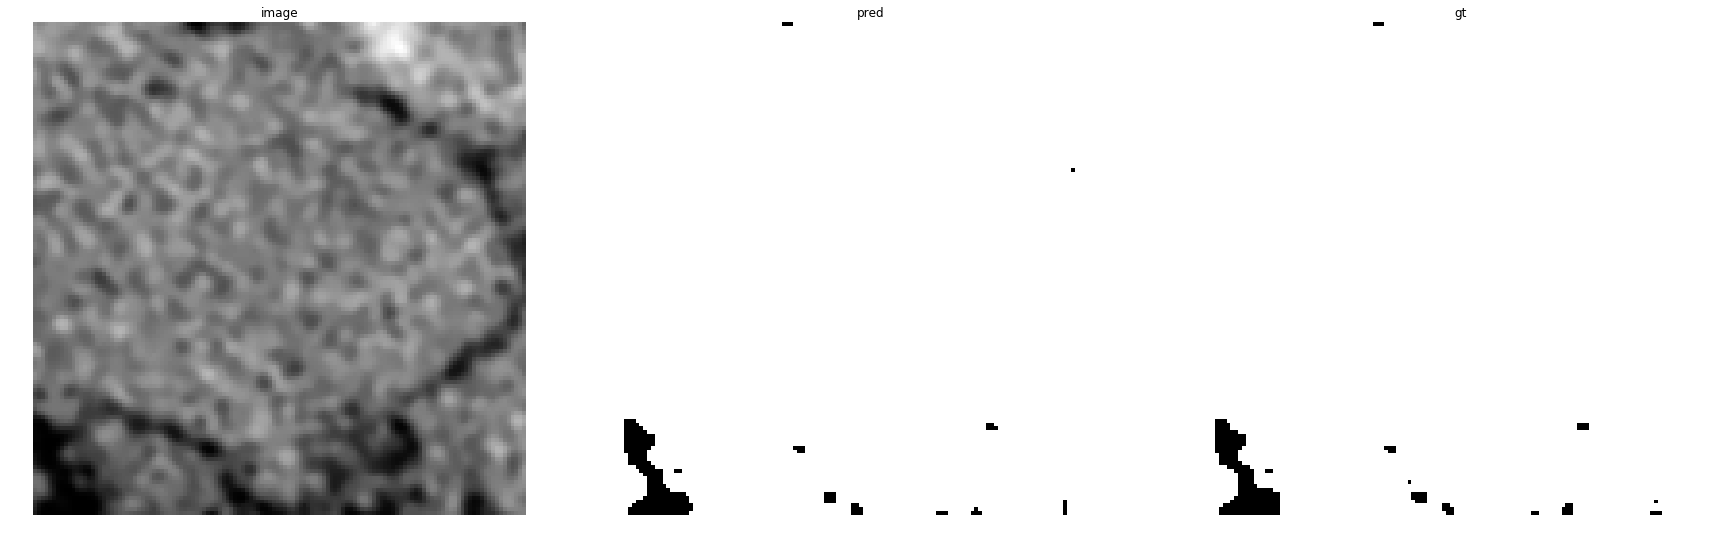

accuracy    : 0.9984130859375
precision   : 0.9990711499164034
recall      : 0.9993186745122329
f1          : 0.9991948968848702
pr_auc      : 0.9999967790450311
iou         : 0.998391089108911


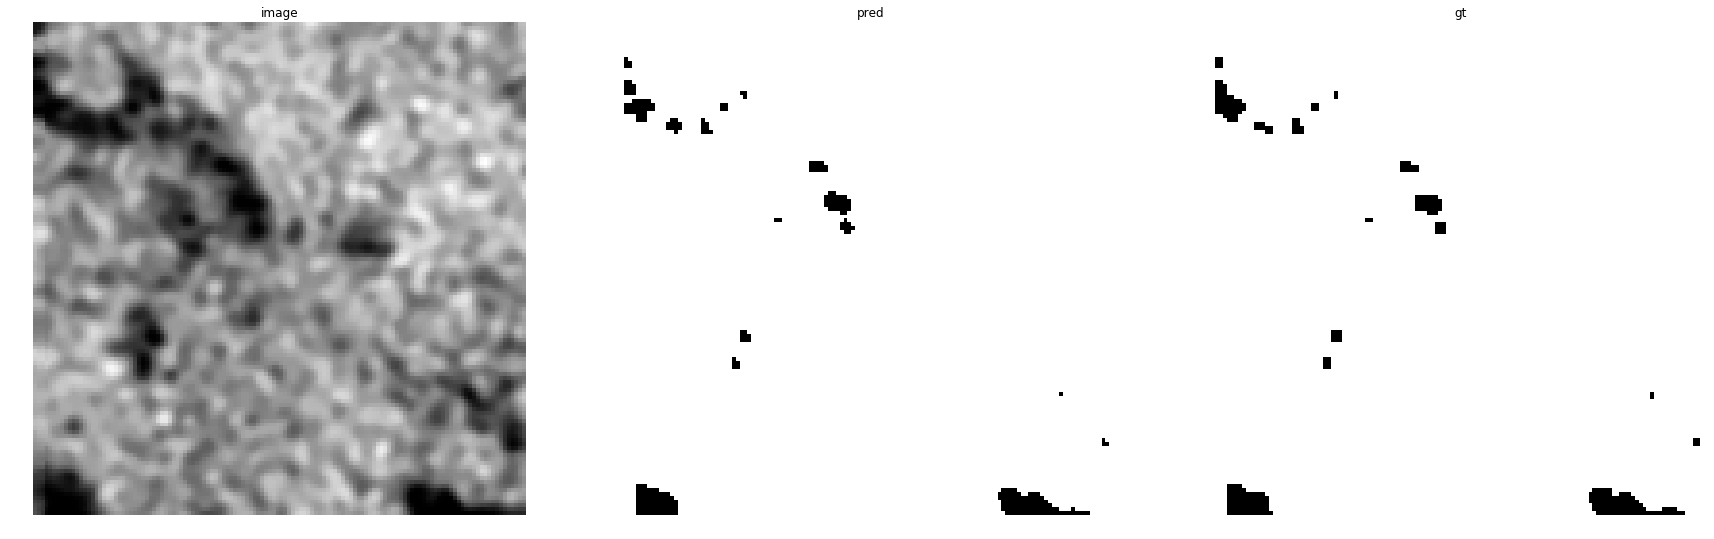

accuracy    : 0.9971923828125
precision   : 0.9979472505598408
recall      : 0.9991903338315894
f1          : 0.9985684053280218
pr_auc      : 0.9999950604499324
iou         : 0.9971409037230405


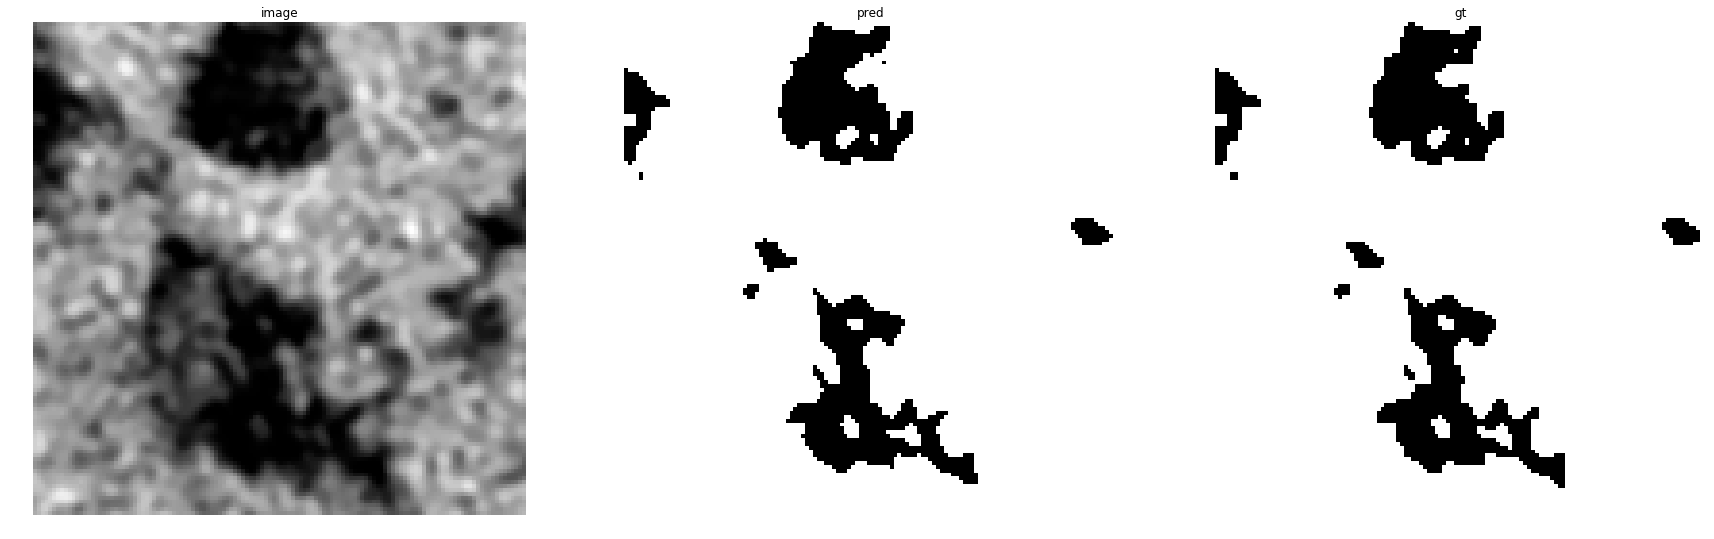

accuracy    : 0.99310302734375
precision   : 0.9951650780494543
recall      : 0.9970244273752682
f1          : 0.9960938850288638
pr_auc      : 0.9999577171714841
iou         : 0.9922181667929206


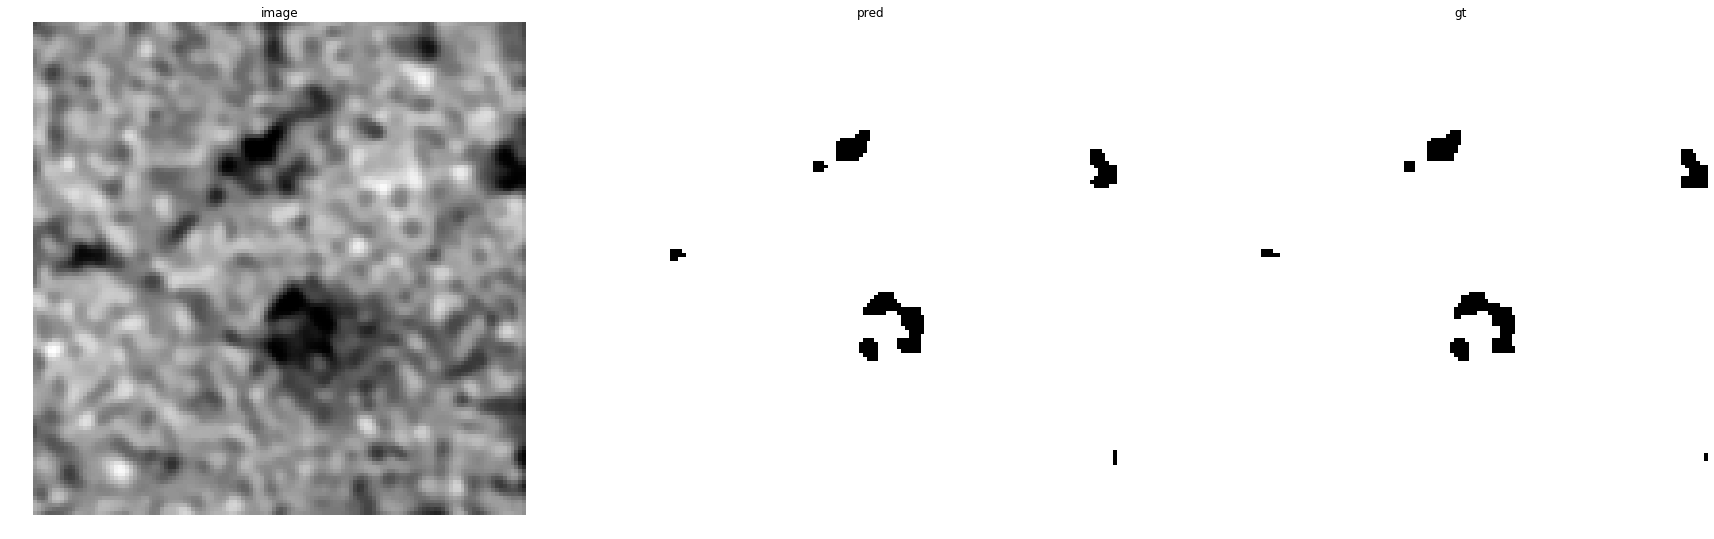

accuracy    : 0.99859619140625
precision   : 0.9991320520768754
recall      : 0.9994418604651163
f1          : 0.9992869322585646
pr_auc      : 0.999998040022983
iou         : 0.9985748807237127


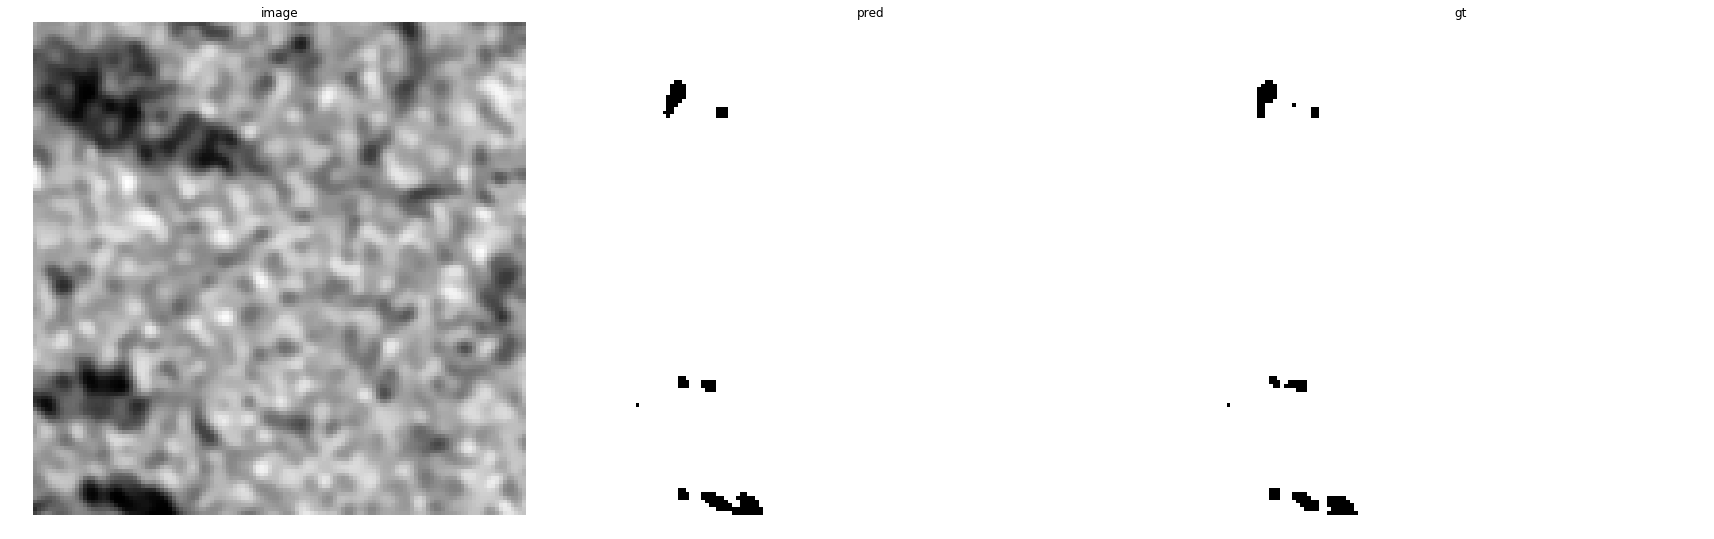

accuracy    : 0.99835205078125
precision   : 0.9992002952755905
recall      : 0.9991388325029218
f1          : 0.9991695629440531
pr_auc      : 0.9999981656570249
iou         : 0.998340503995083


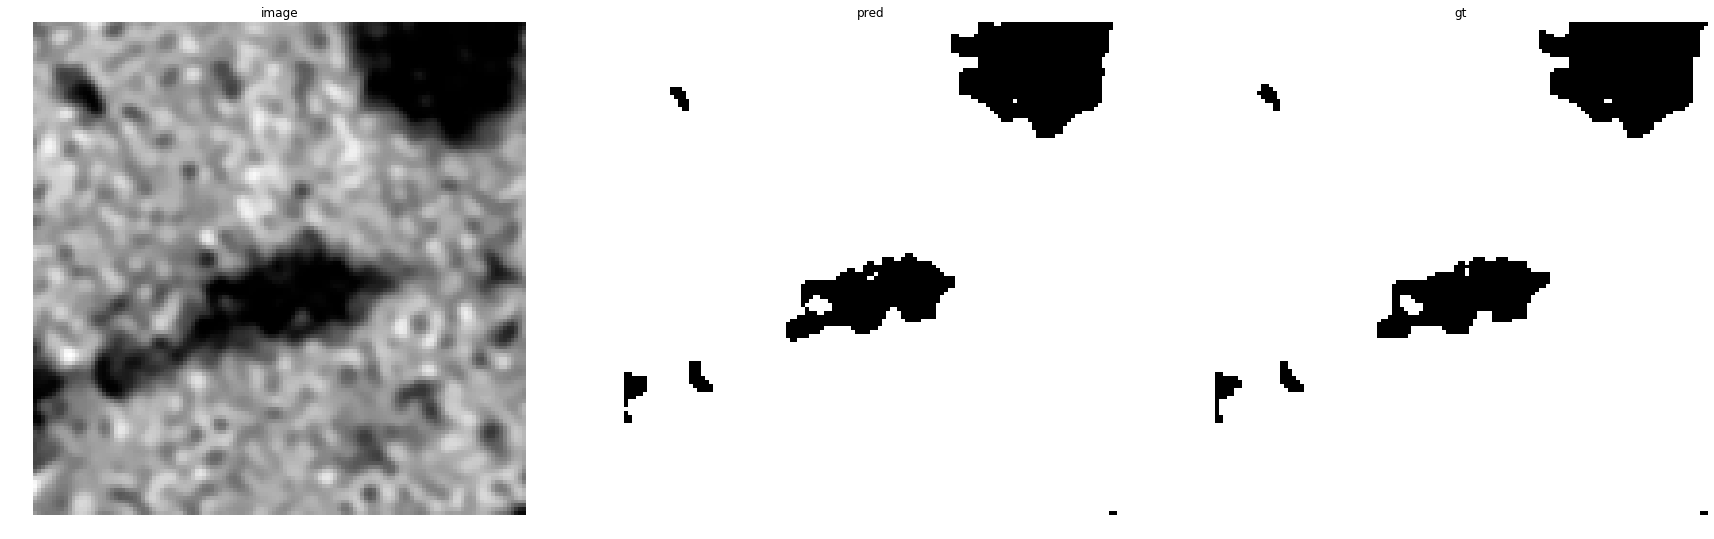

accuracy    : 0.9959716796875
precision   : 0.9970360390703941
recall      : 0.9985158200094448
f1          : 0.9977753808817581
pr_auc      : 0.999987871660574
iou         : 0.9955606376538643


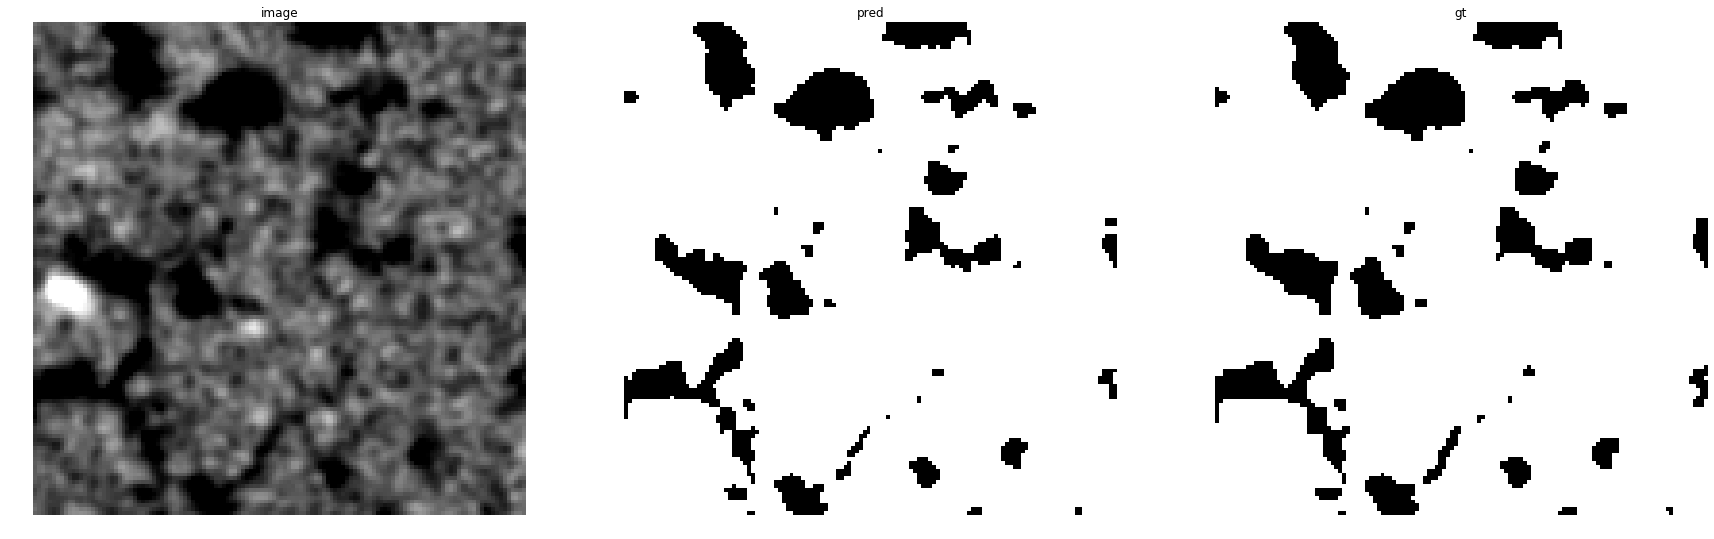

accuracy    : 0.98724365234375
precision   : 0.986151704940849
recall      : 0.9992948311120513
f1          : 0.9926797660327134
pr_auc      : 0.9999013343115097
iou         : 0.9854659248956884


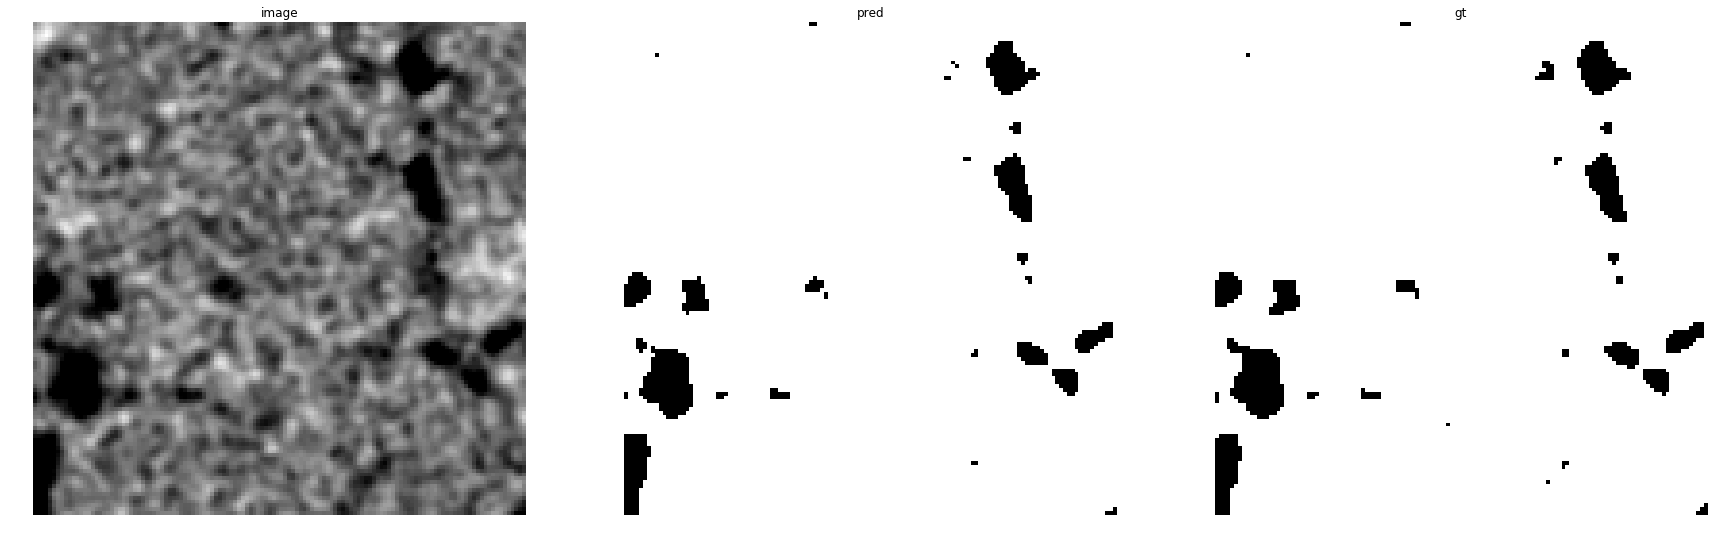

accuracy    : 0.99560546875
precision   : 0.9958266452648475
recall      : 0.9995488818714958
f1          : 0.9976842917792358
pr_auc      : 0.9999858325099239
iou         : 0.9953792837889873


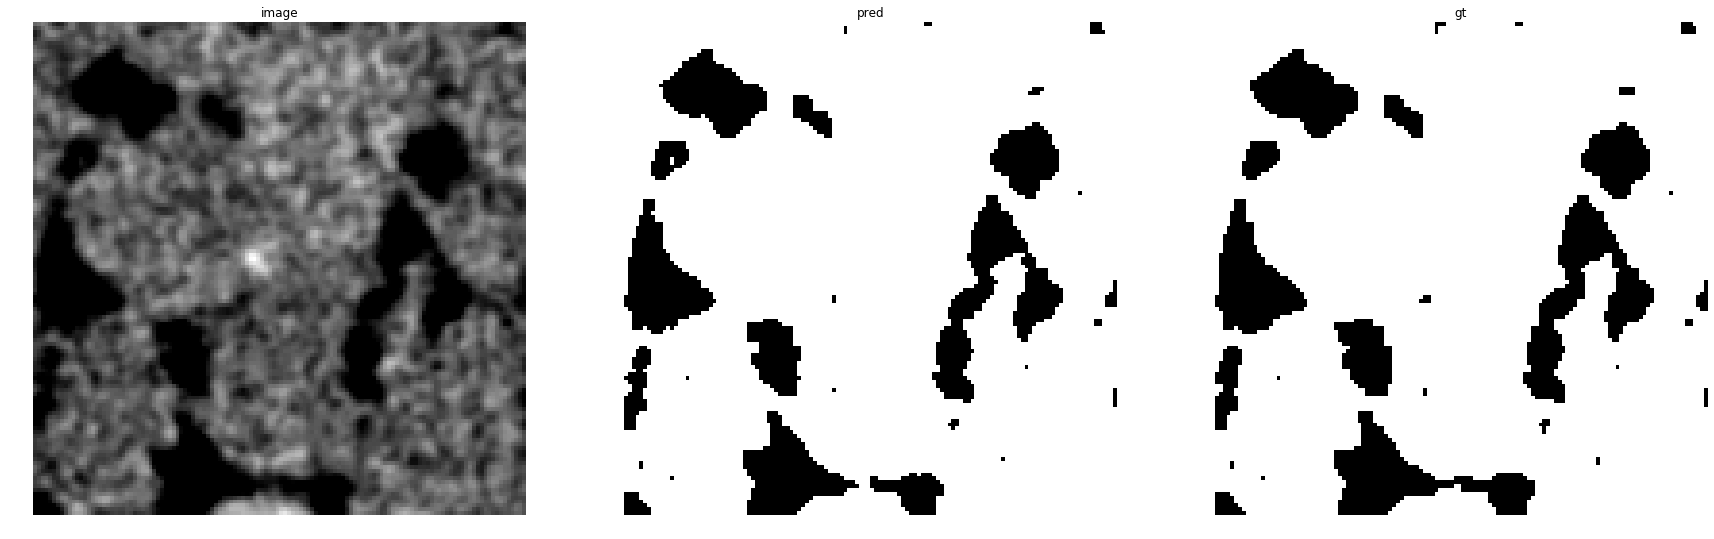

accuracy    : 0.9913330078125
precision   : 0.9901069324216193
recall      : 0.9995593743115223
f1          : 0.9948107001900306
pr_auc      : 0.9999493583281037
iou         : 0.9896749800043627


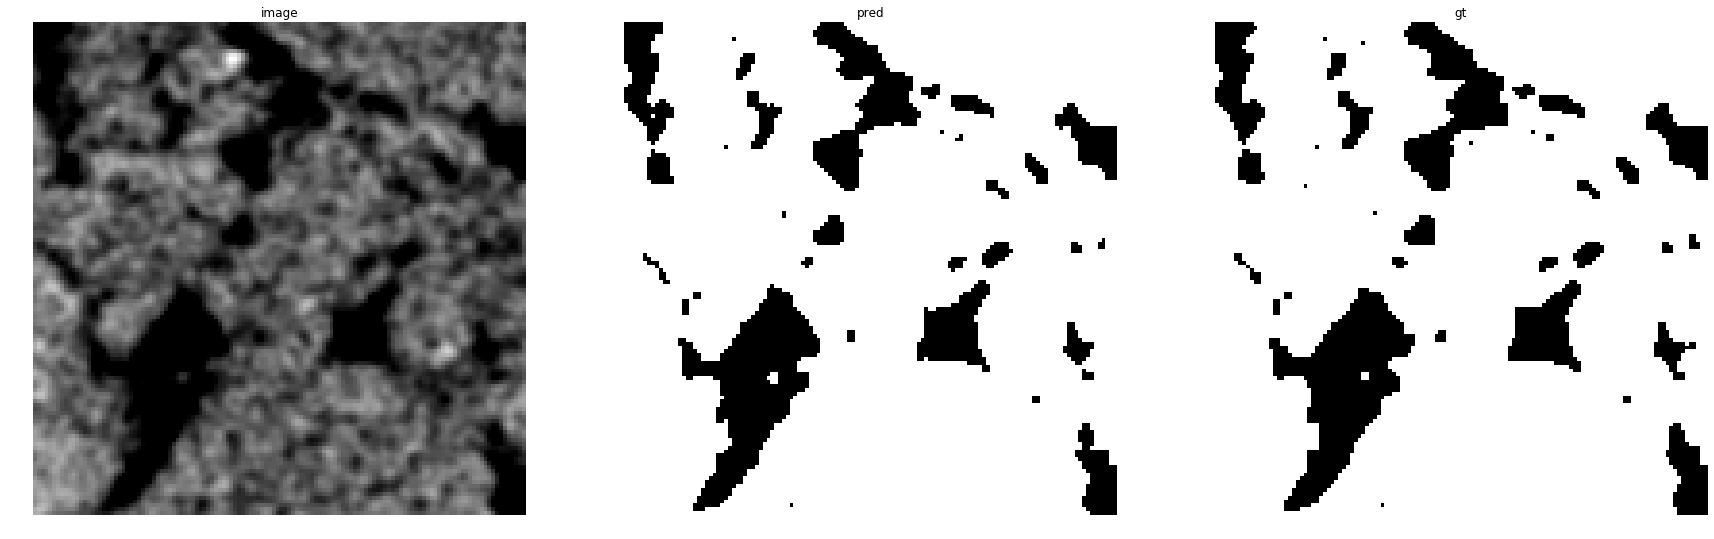

accuracy    : 0.98797607421875
precision   : 0.987352812908853
recall      : 0.9983096935400897
f1          : 0.9928010232048237
pr_auc      : 0.999884436062458
iou         : 0.9857049560989769


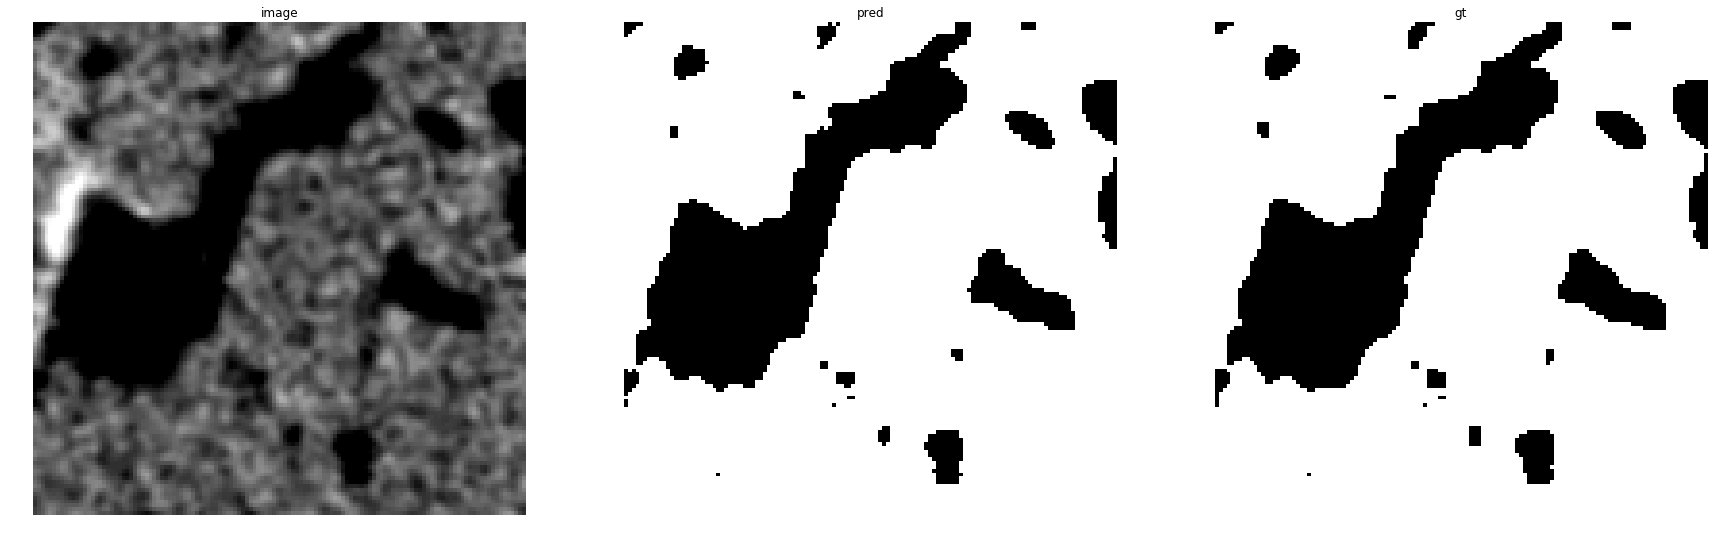

accuracy    : 0.99169921875
precision   : 0.9906339499961297
recall      : 0.9988293139779911
f1          : 0.9947147520596922
pr_auc      : 0.9999619994085338
iou         : 0.9894850780887583


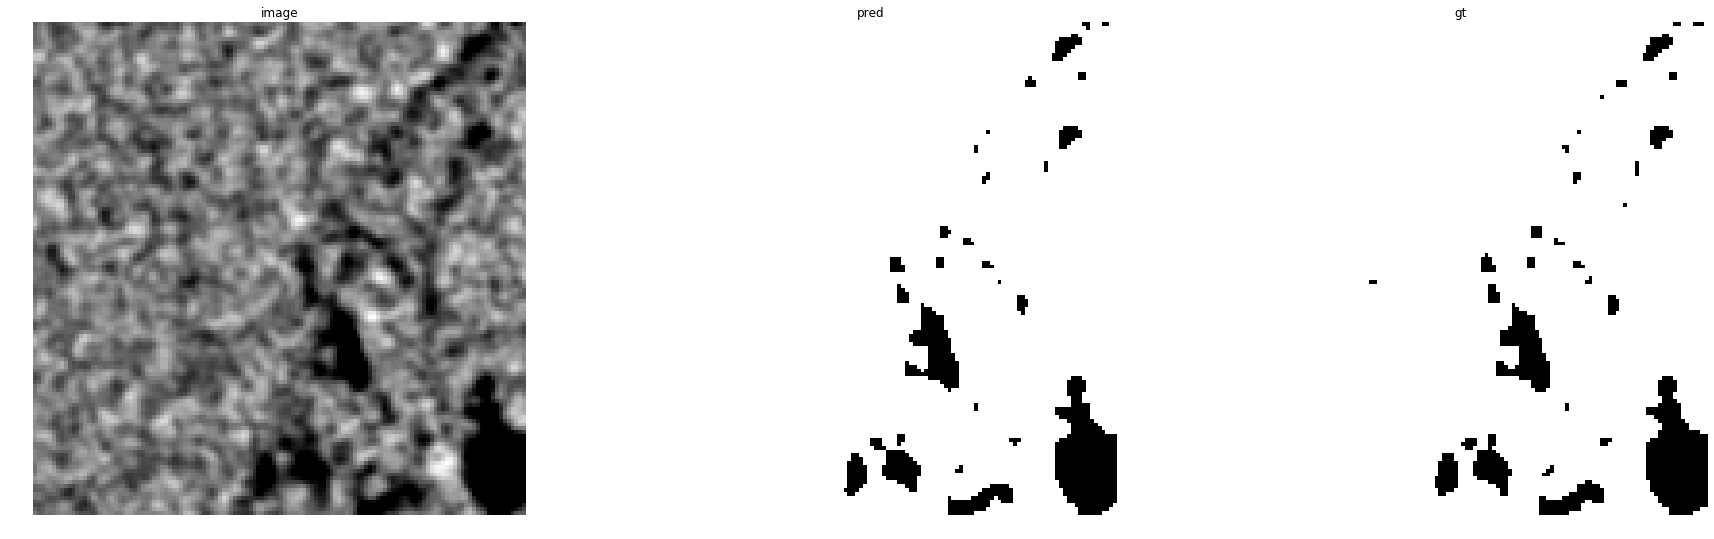

accuracy    : 0.99560546875
precision   : 0.9961876453864048
recall      : 0.9991574854180169
f1          : 0.9976703552708212
pr_auc      : 0.9999878712083988
iou         : 0.9953515398024404


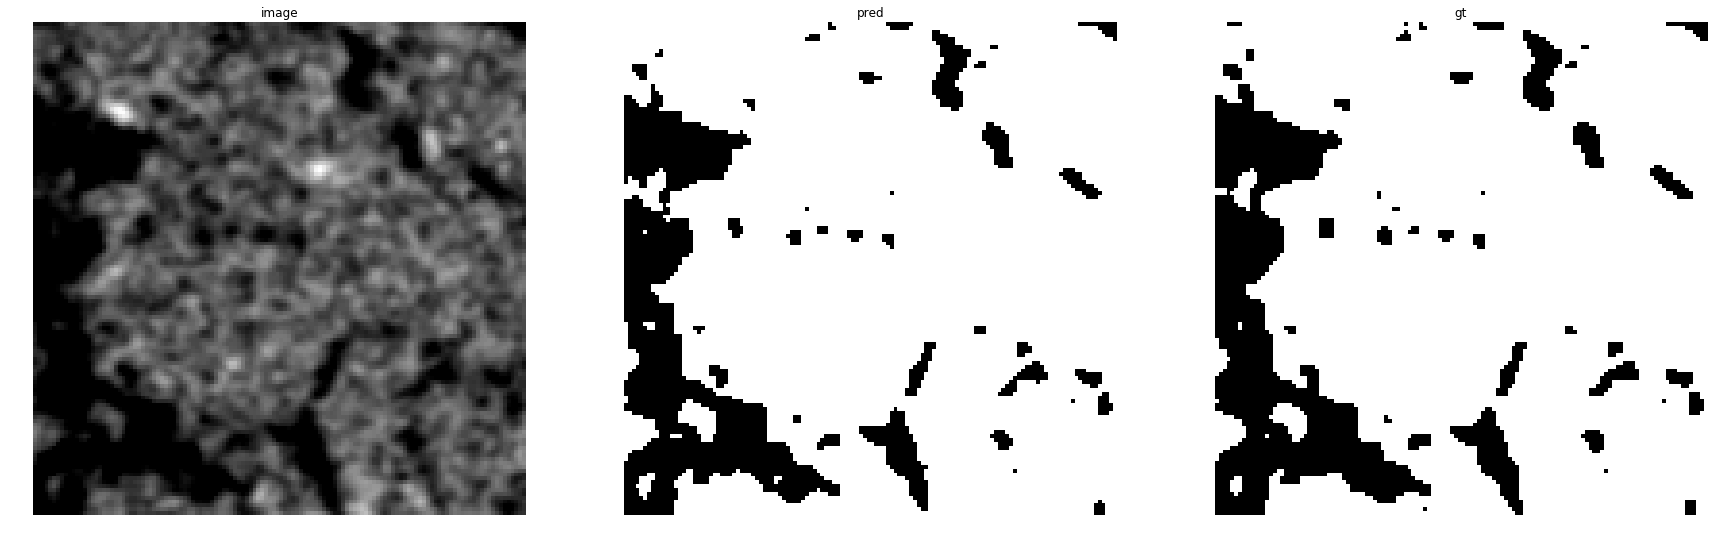

accuracy    : 0.98565673828125
precision   : 0.9829629629629629
recall      : 0.9996233521657251
f1          : 0.9912231559290382
pr_auc      : 0.9998786080348668
iou         : 0.9825990373935579


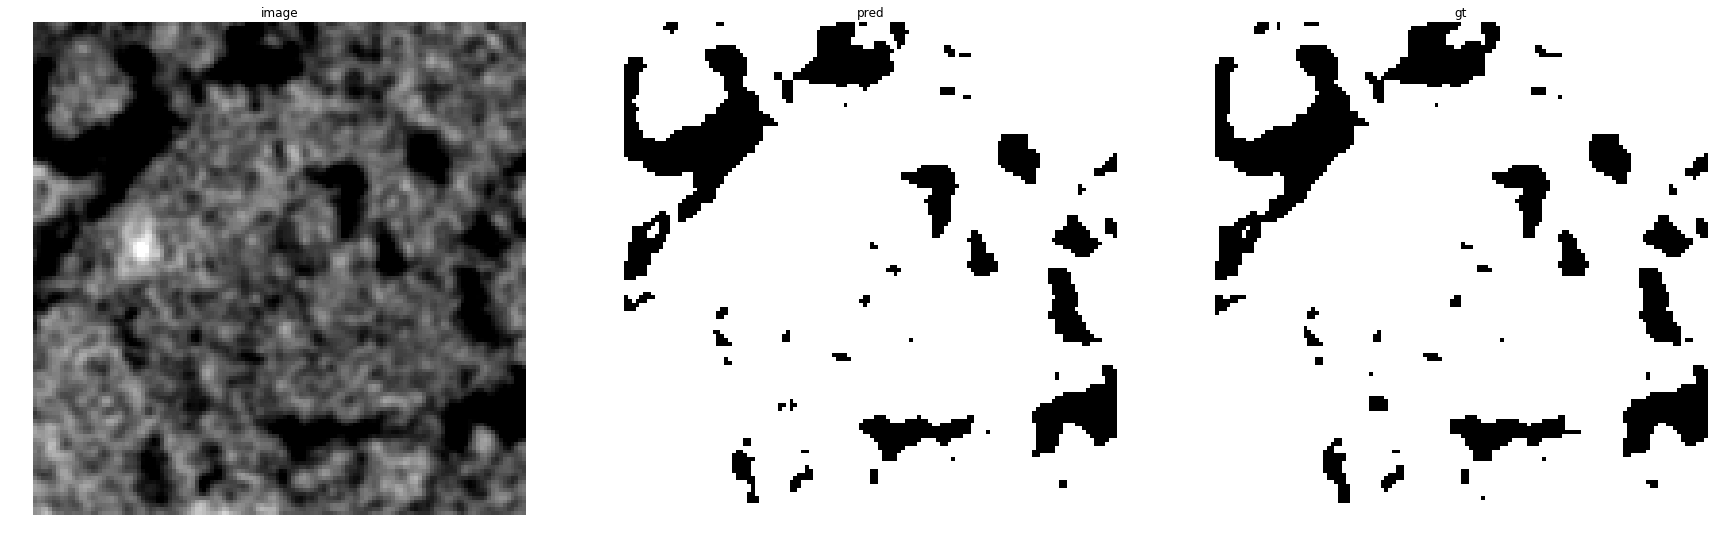

accuracy    : 0.98858642578125
precision   : 0.9876754292227684
recall      : 0.9989912091079406
f1          : 0.9933010926025434
pr_auc      : 0.9998827673849031
iou         : 0.9866913386947548


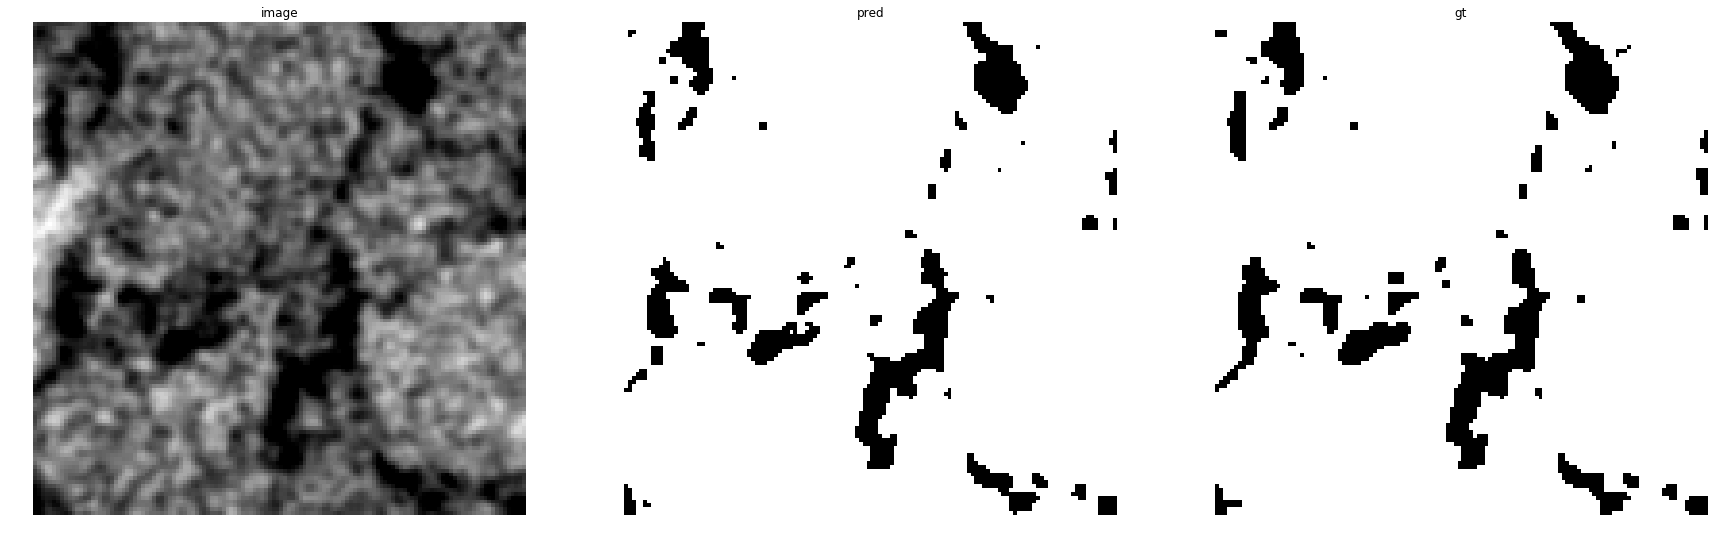

accuracy    : 0.98883056640625
precision   : 0.9886508629373447
recall      : 0.9990499457111836
f1          : 0.9938232018091606
pr_auc      : 0.9999098471812354
iou         : 0.9877222408587722


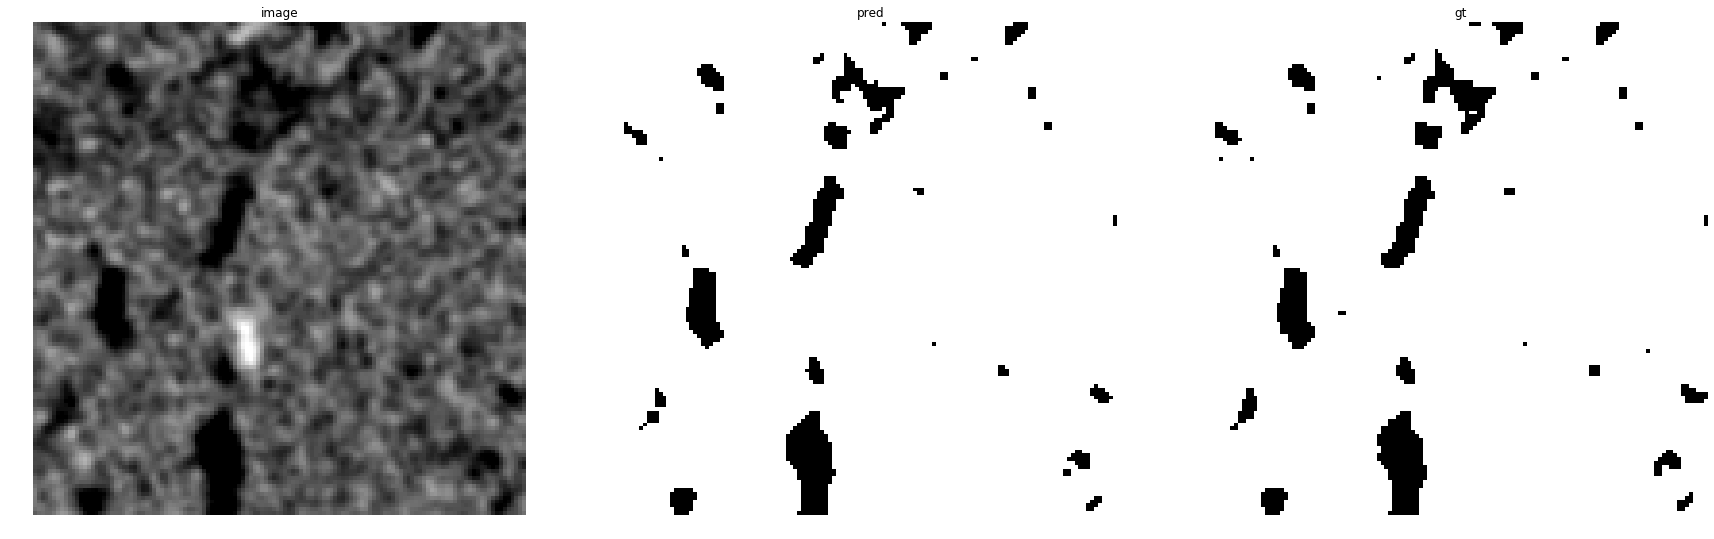

accuracy    : 0.99420166015625
precision   : 0.9942323893461215
recall      : 0.9996090695856138
f1          : 0.9969134799701095
pr_auc      : 0.9999726016653357
iou         : 0.9938459545248429


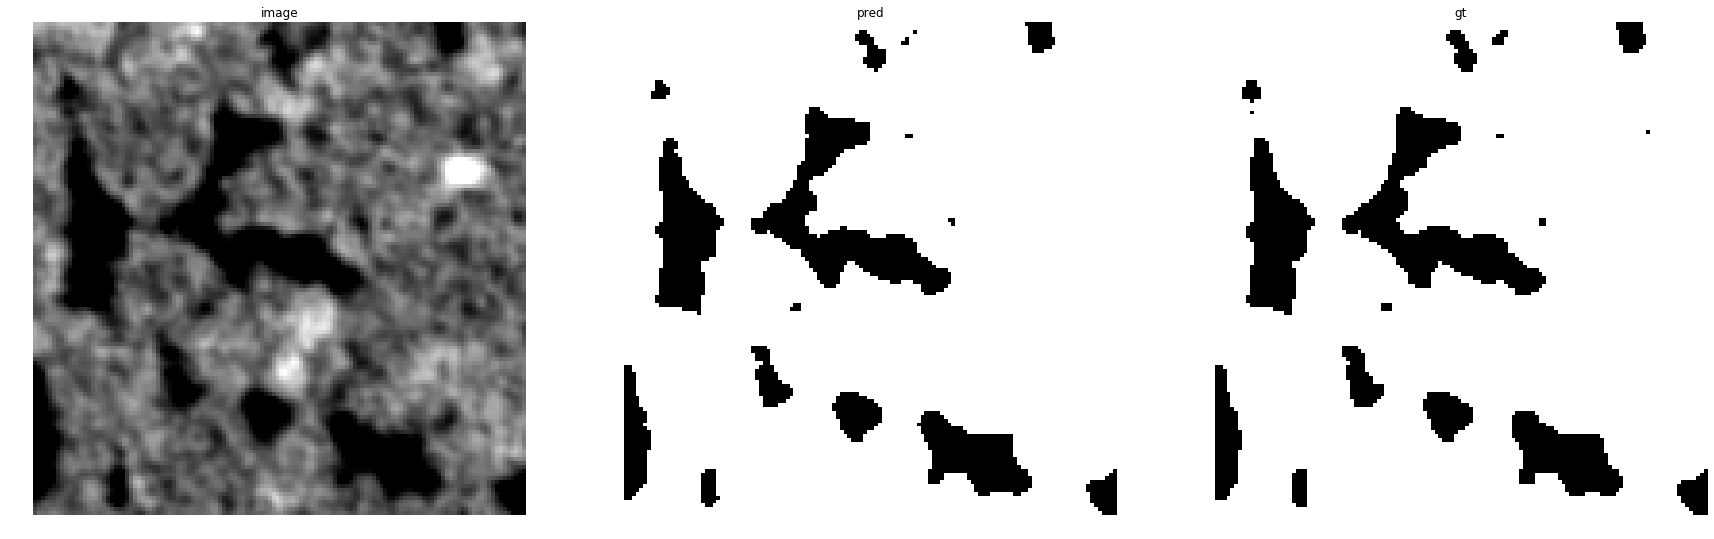

accuracy    : 0.9931640625
precision   : 0.9927388086006345
recall      : 0.9993612944432616
f1          : 0.9960390437119818
pr_auc      : 0.9999790015688902
iou         : 0.9921093419754826


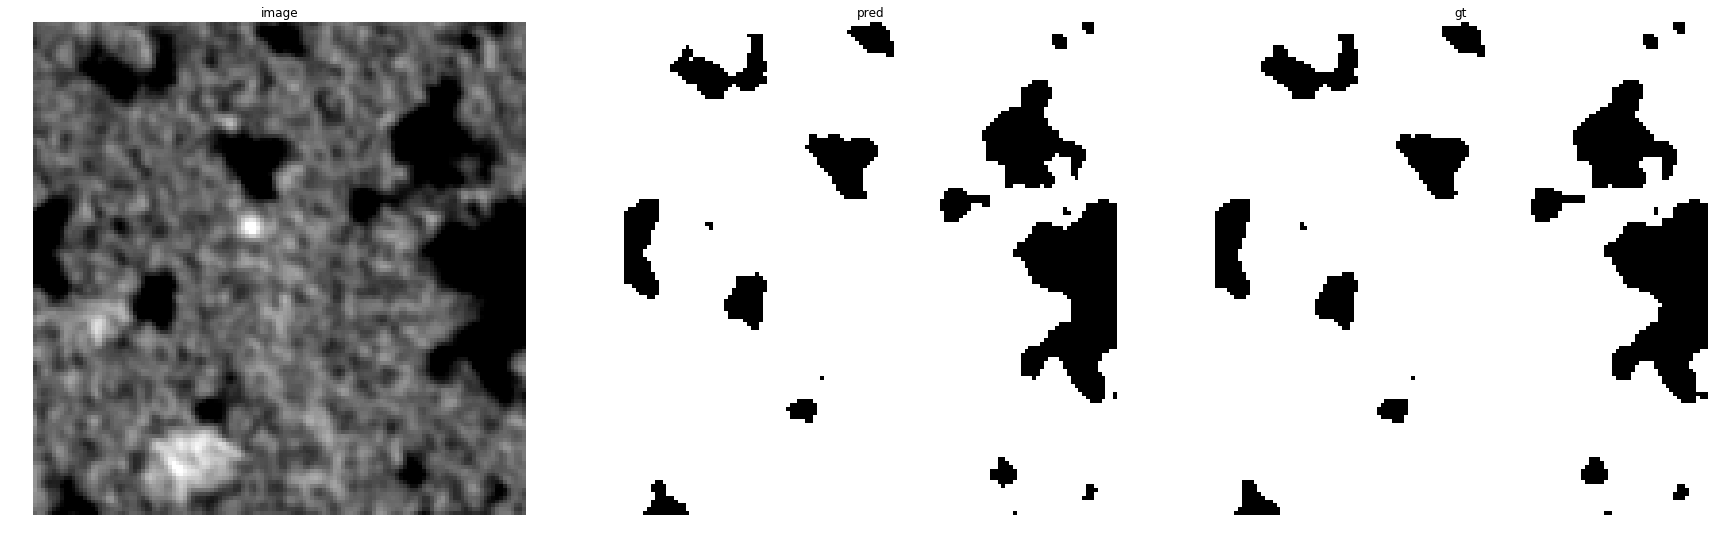

accuracy    : 0.99212646484375
precision   : 0.9916666666666667
recall      : 0.9992172489859816
f1          : 0.9954276397405452
pr_auc      : 0.9999723174147961
iou         : 0.9908969021240561


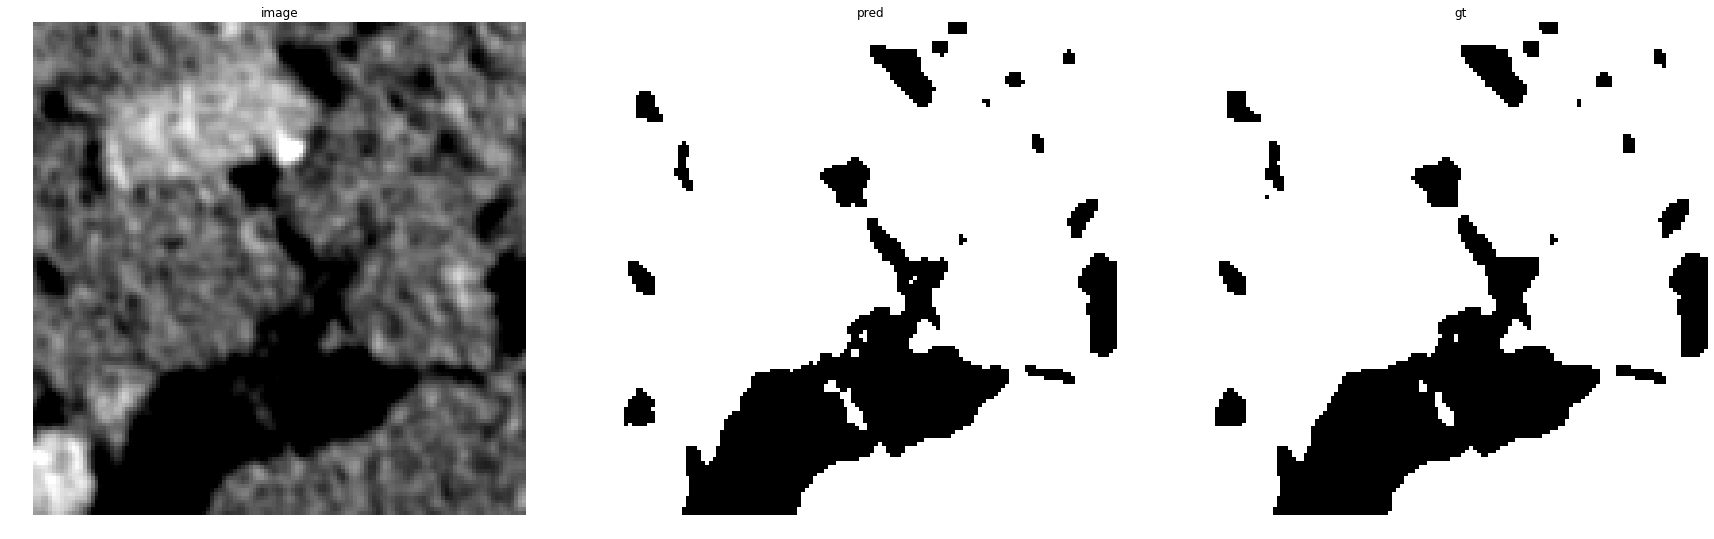

accuracy    : 0.991943359375
precision   : 0.9905989385898408
recall      : 0.9993880985161389
f1          : 0.9949741090466037
pr_auc      : 0.9999527151728482
iou         : 0.9899984846188816


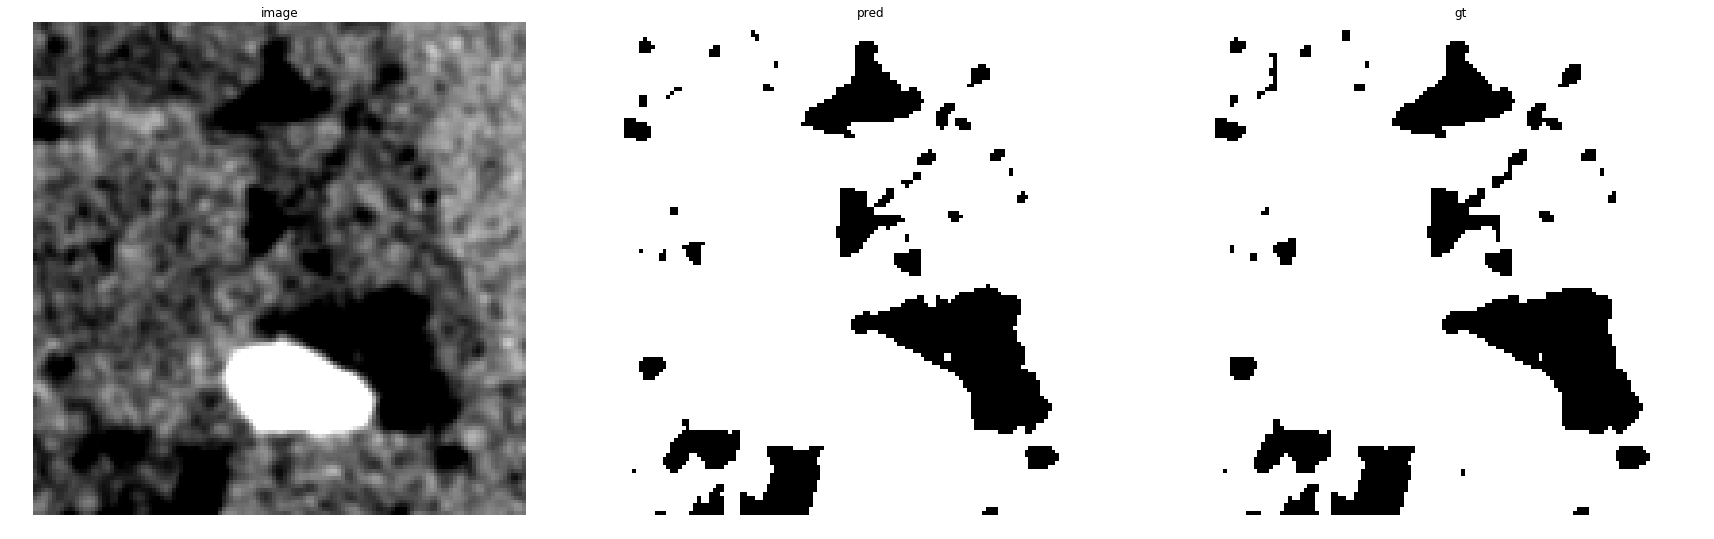

accuracy    : 0.9903564453125
precision   : 0.9895287958115183
recall      : 0.999285510145756
f1          : 0.9943832207607537
pr_auc      : 0.9999082759546403
iou         : 0.988829185520362


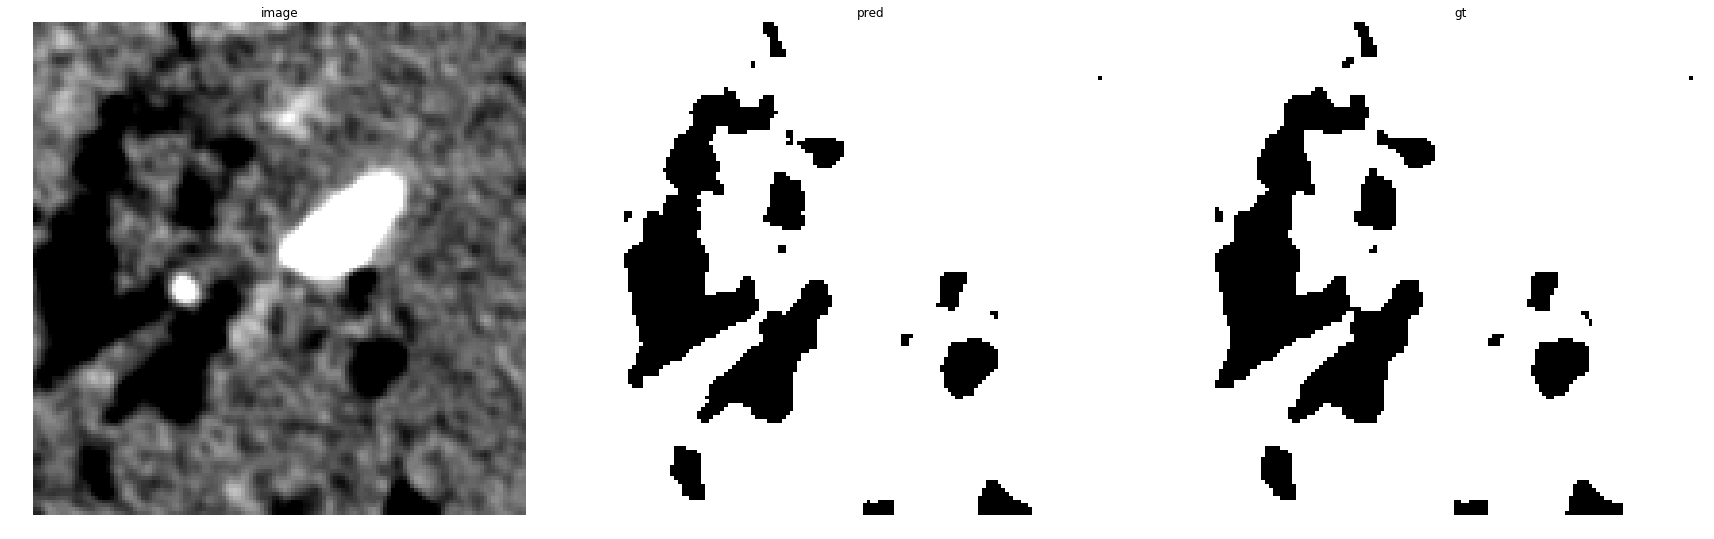

accuracy    : 0.9913330078125
precision   : 0.9906468091229584
recall      : 0.9991292359045062
f1          : 0.9948699421965318
pr_auc      : 0.999953006347405
iou         : 0.989792250736827


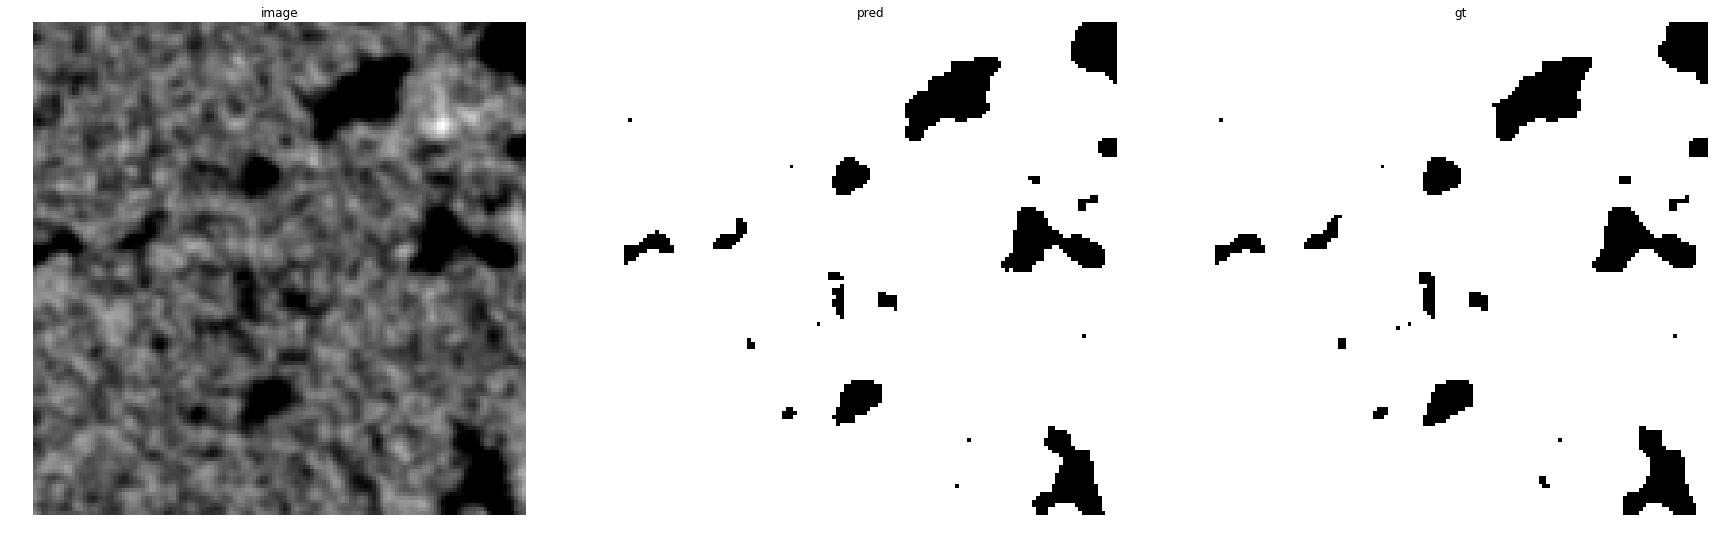

accuracy    : 0.99407958984375
precision   : 0.9942513545658782
recall      : 0.9993358570764429
f1          : 0.996787121989997
pr_auc      : 0.9999820133790192
iou         : 0.993594823032224


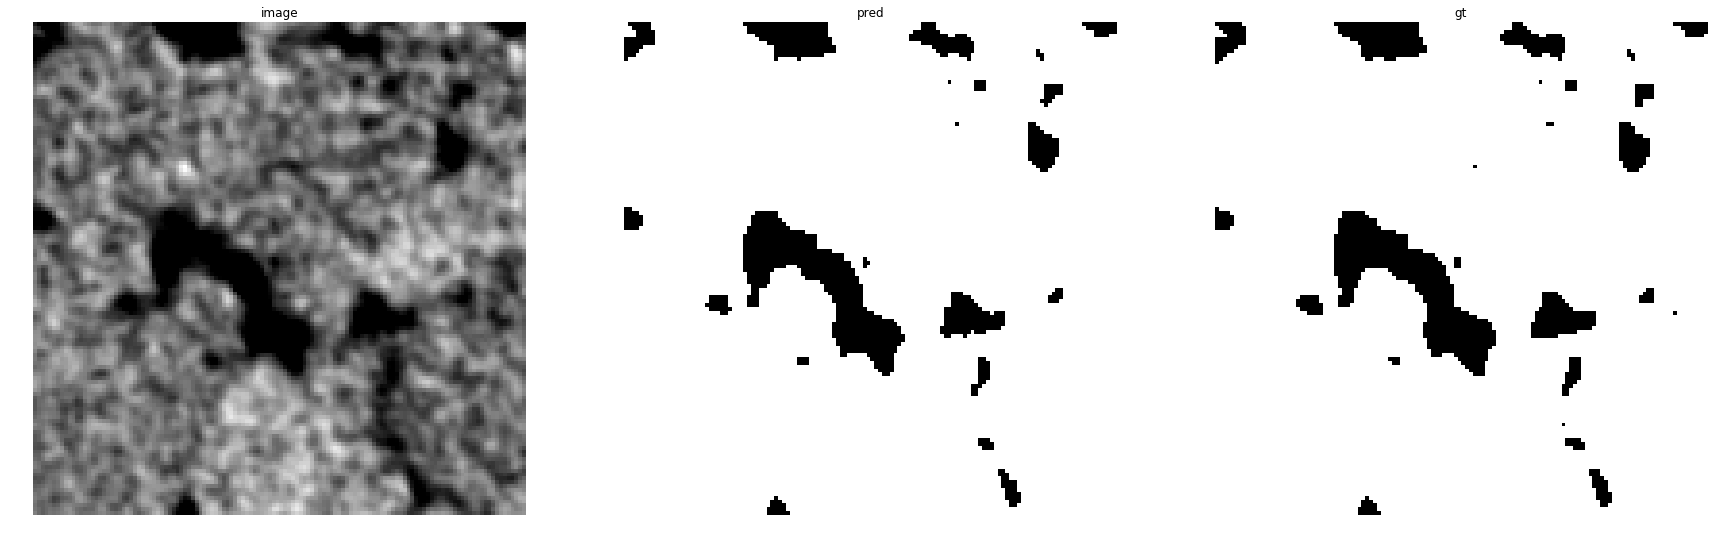

accuracy    : 0.99407958984375
precision   : 0.9940840202073916
recall      : 0.9994653478580499
f1          : 0.9967674209351152
pr_auc      : 0.999977280192993
iou         : 0.9935556736646293


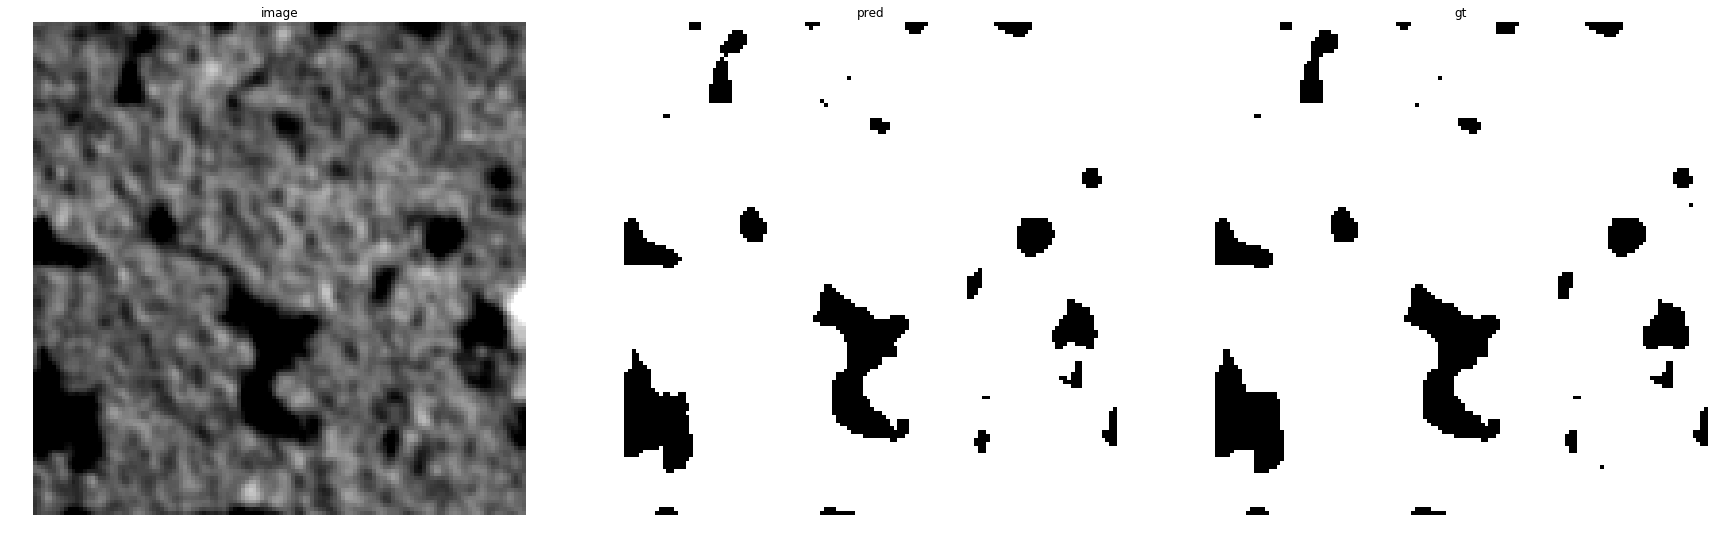

accuracy    : 0.99493408203125
precision   : 0.9948494983277592
recall      : 0.9995967470932187
f1          : 0.9972174729290288
pr_auc      : 0.9999893203360657
iou         : 0.9944503878042257


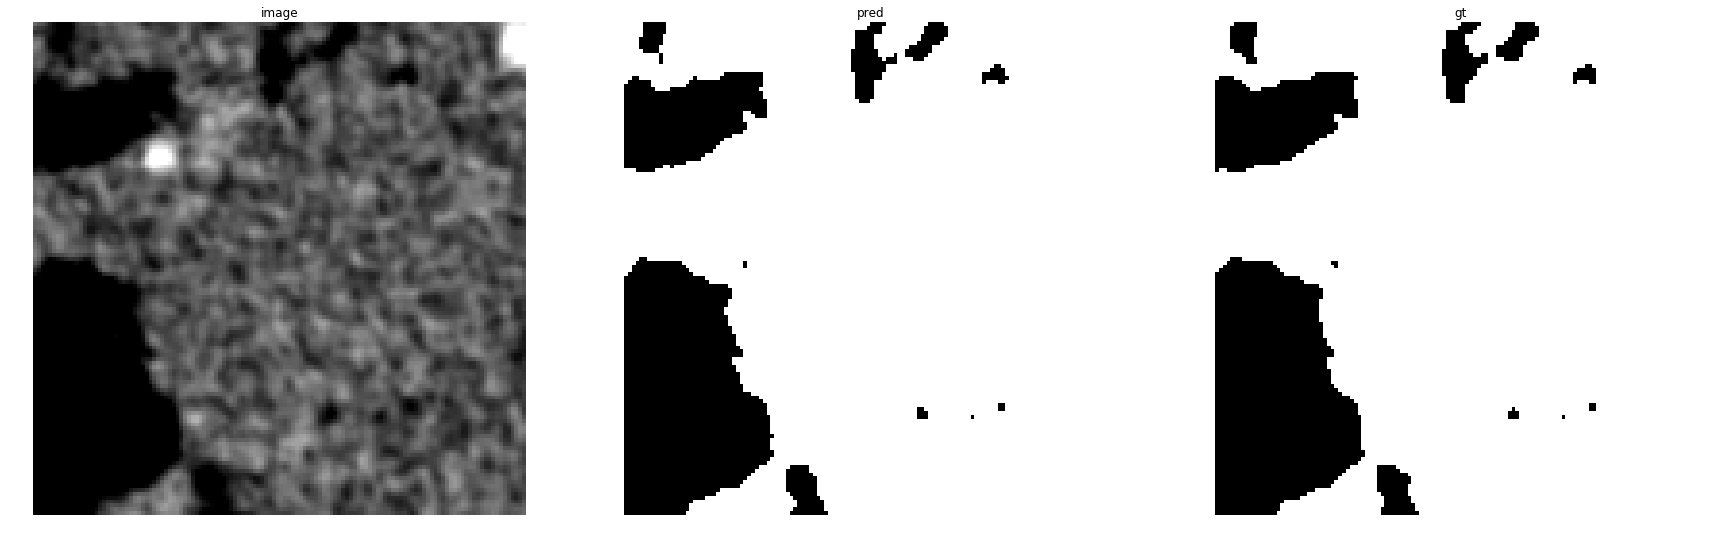

accuracy    : 0.99530029296875
precision   : 0.9949193066347878
recall      : 0.9993245778611632
f1          : 0.9971170766408326
pr_auc      : 0.9999825461011831
iou         : 0.9942507279922348


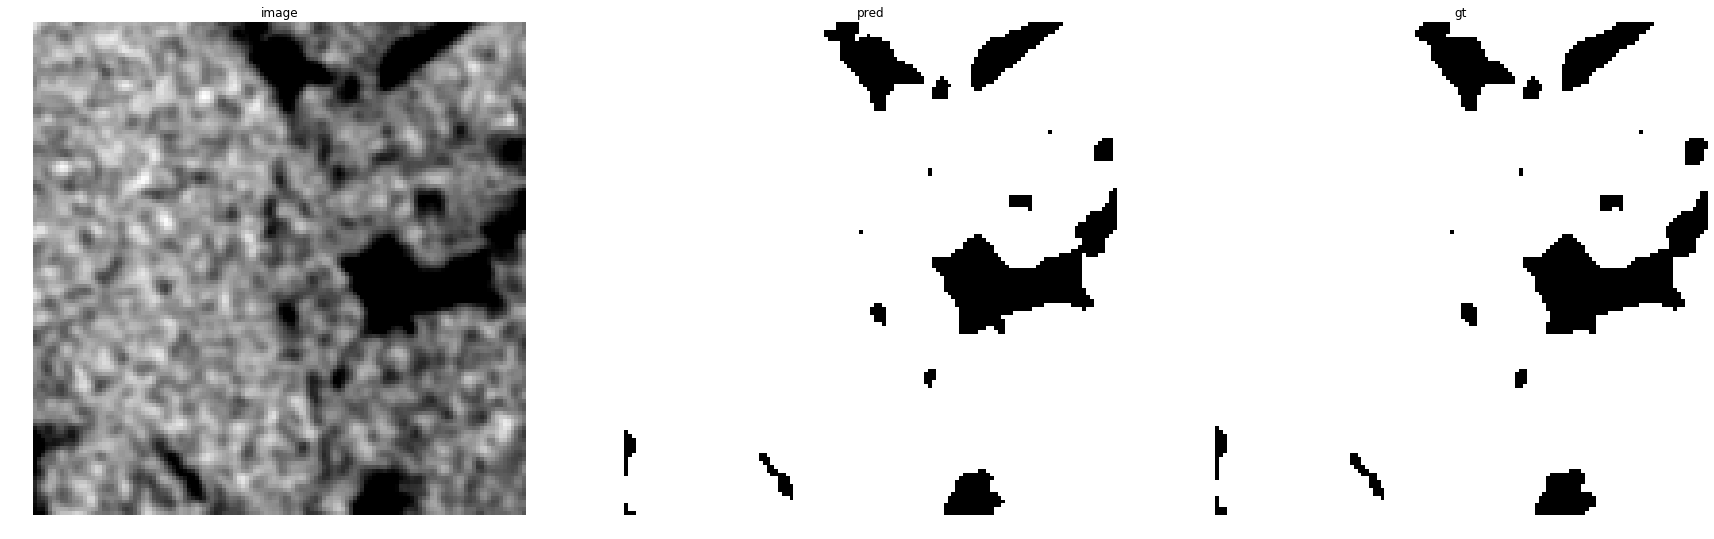

accuracy    : 0.9949951171875
precision   : 0.9950604098524798
recall      : 0.9994636272209185
f1          : 0.9972571581482472
pr_auc      : 0.9999853894583803
iou         : 0.9945293215024351


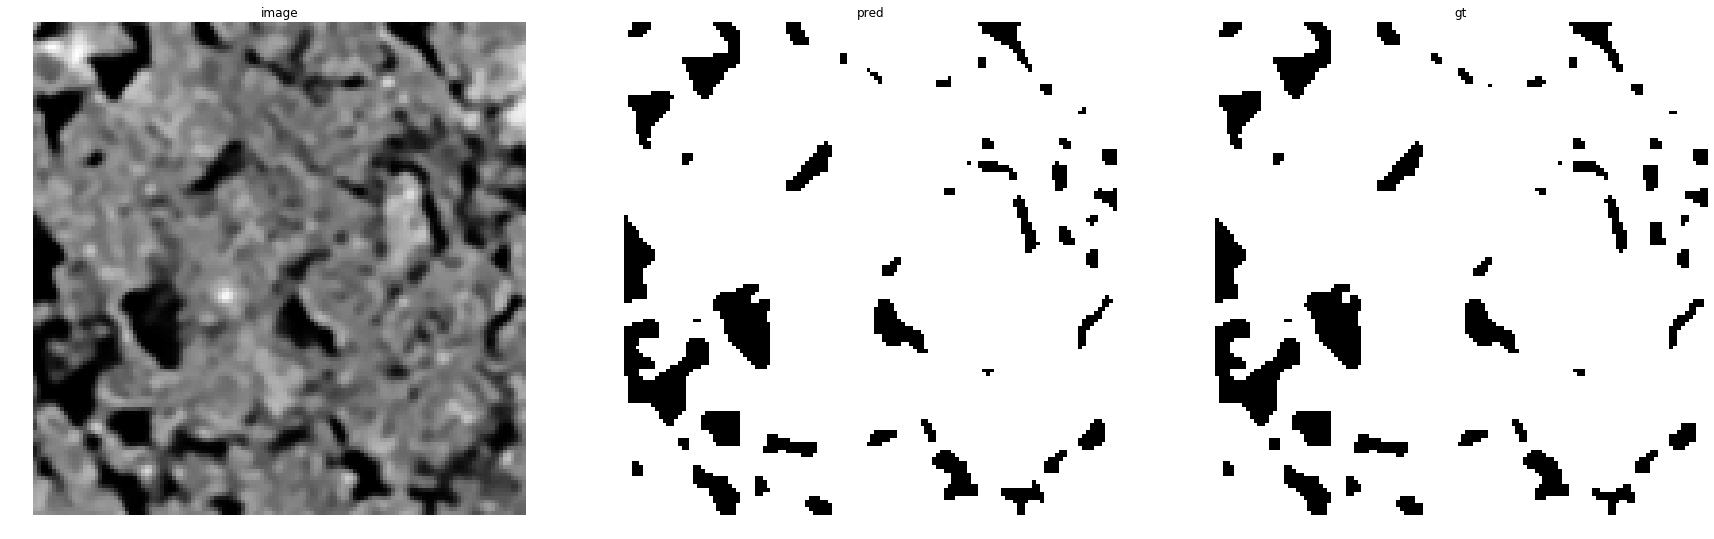

accuracy    : 0.99420166015625
precision   : 0.9962740633409232
recall      : 0.9971685082872929
f1          : 0.9967210851482414
pr_auc      : 0.9999658009026738
iou         : 0.9934636025870373


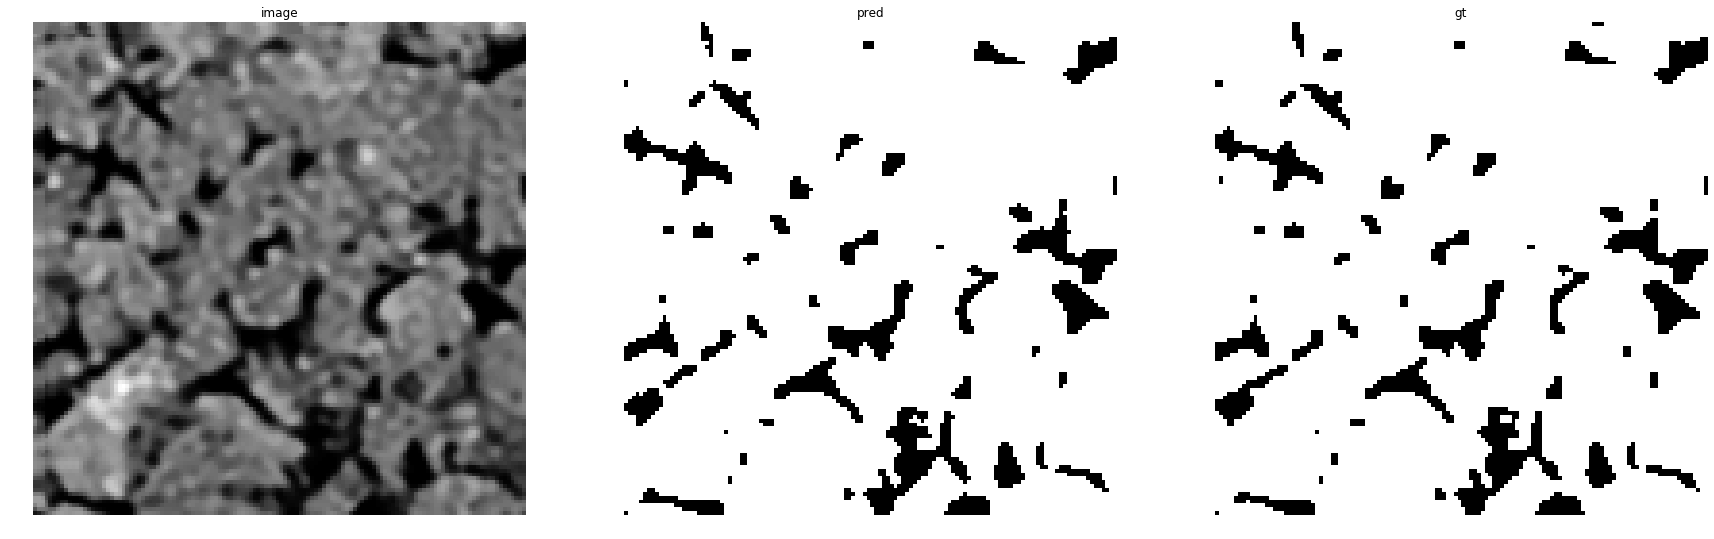

accuracy    : 0.99310302734375
precision   : 0.9963968957871396
recall      : 0.995775915795305
f1          : 0.9960863090084161
pr_auc      : 0.9999380076703218
iou         : 0.9922031325467467


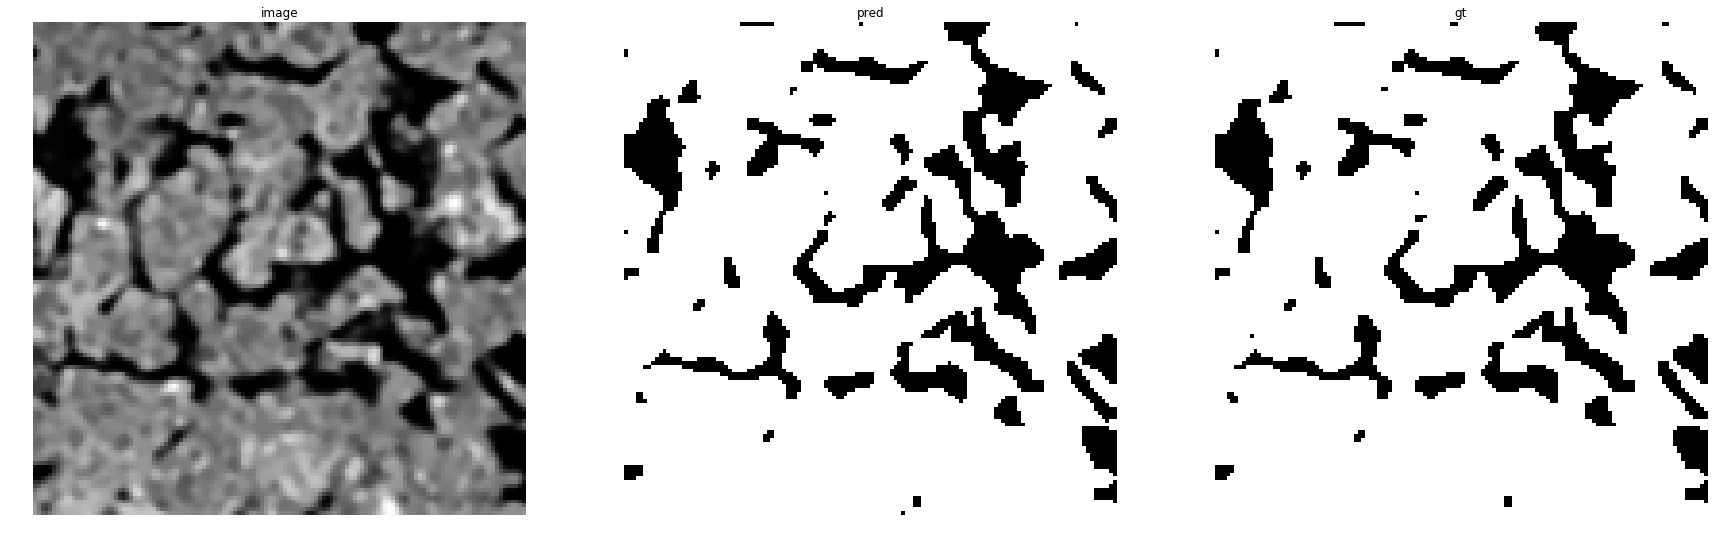

accuracy    : 0.9927978515625
precision   : 0.9958952160609
recall      : 0.9953009621839337
f1          : 0.9955980004476609
pr_auc      : 0.9999448538768165
iou         : 0.9912345862427574


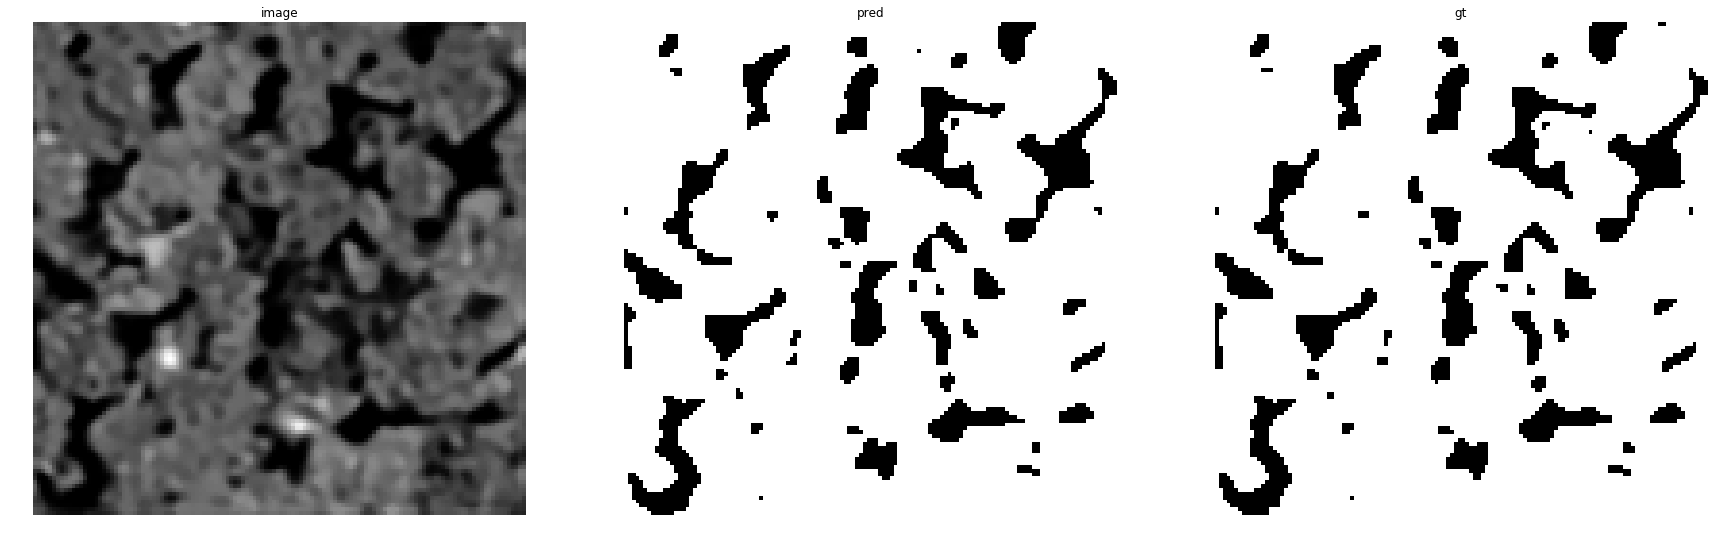

accuracy    : 0.99212646484375
precision   : 0.9954663212435233
recall      : 0.9952514569393481
f1          : 0.9953588774959524
pr_auc      : 0.9999373573258743
iou         : 0.9907606360120327


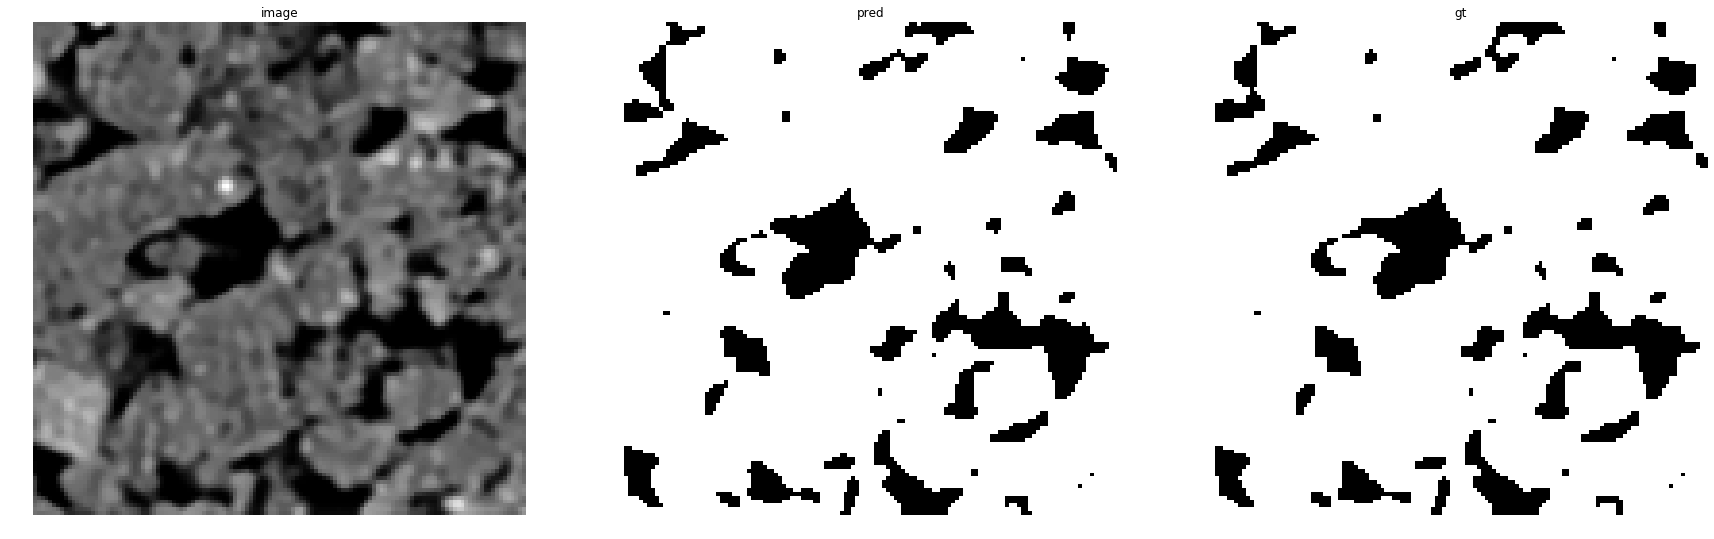

accuracy    : 0.99188232421875
precision   : 0.9955199075077679
recall      : 0.9948729058347776
f1          : 0.9951963015133456
pr_auc      : 0.999920707477327
iou         : 0.9904385334291876


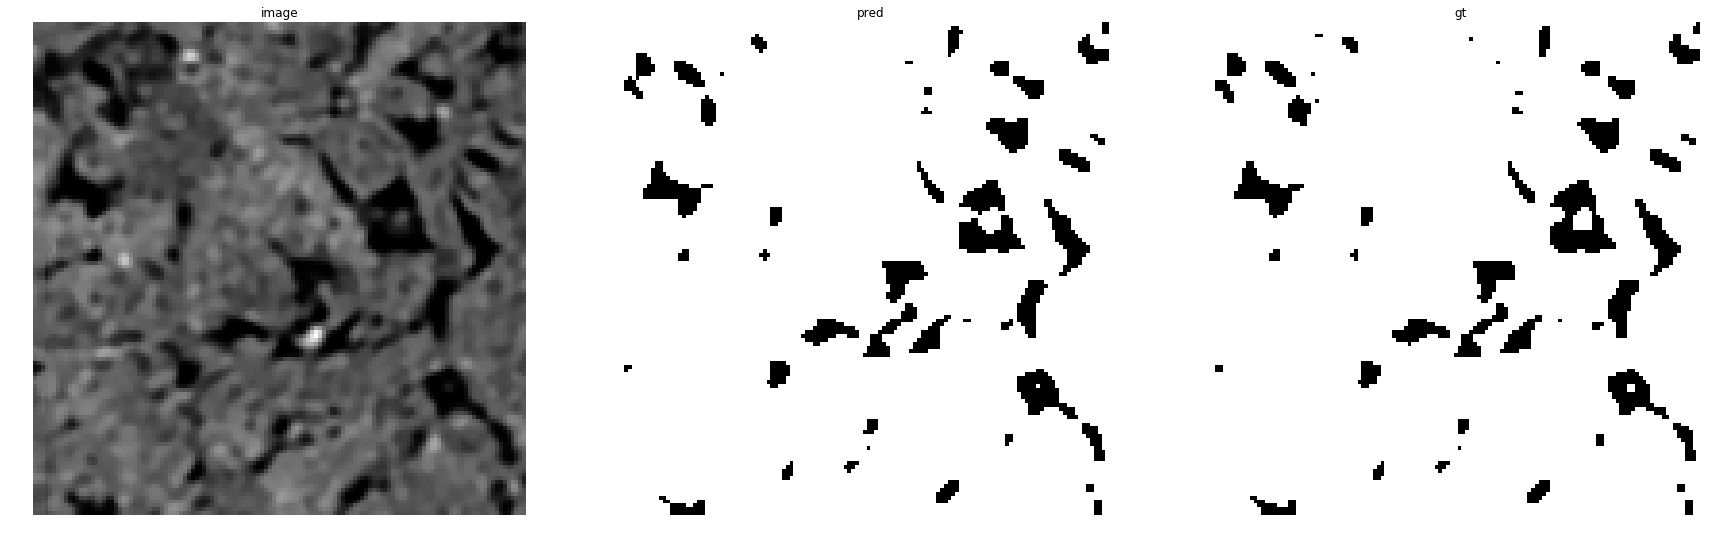

accuracy    : 0.9937744140625
precision   : 0.9958782076851482
recall      : 0.9973368841544608
f1          : 0.9966070121748387
pr_auc      : 0.9999683111630684
iou         : 0.9932369712239756


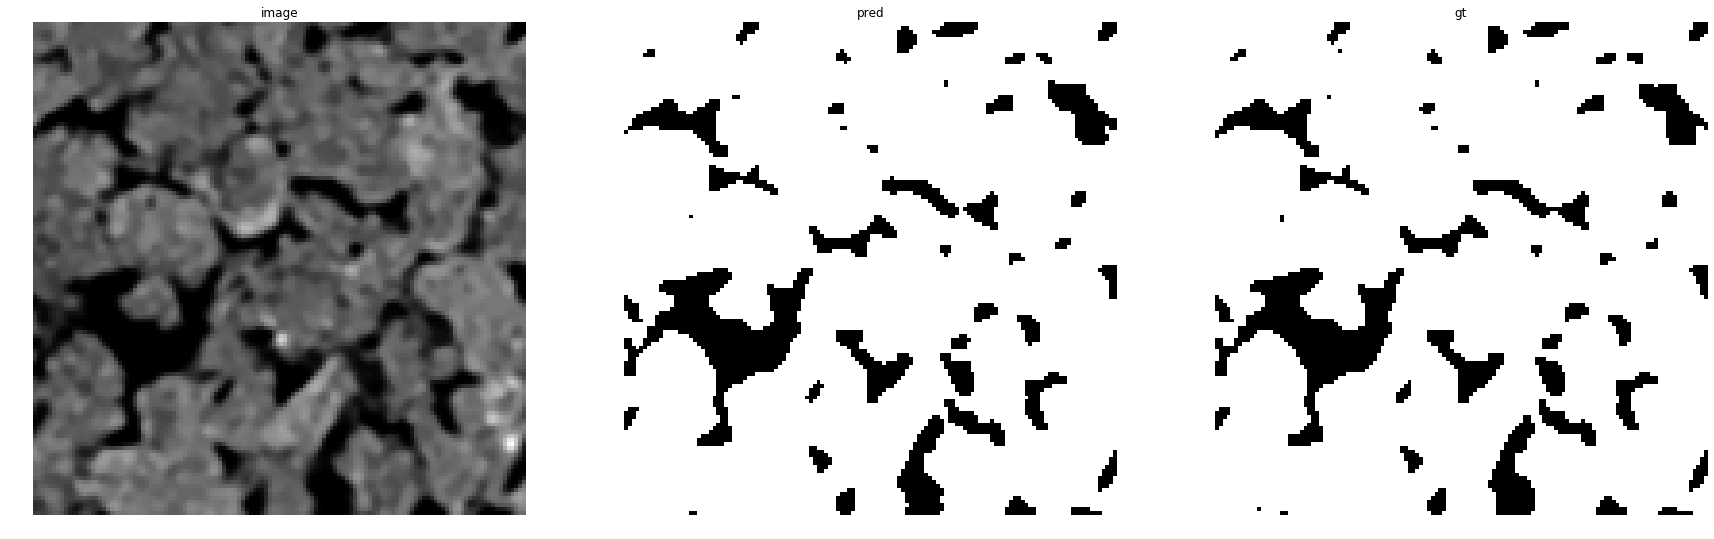

accuracy    : 0.9930419921875
precision   : 0.9966531367941323
recall      : 0.9952357249520017
f1          : 0.9959439265637231
pr_auc      : 0.9999352338588453
iou         : 0.9919206236711552


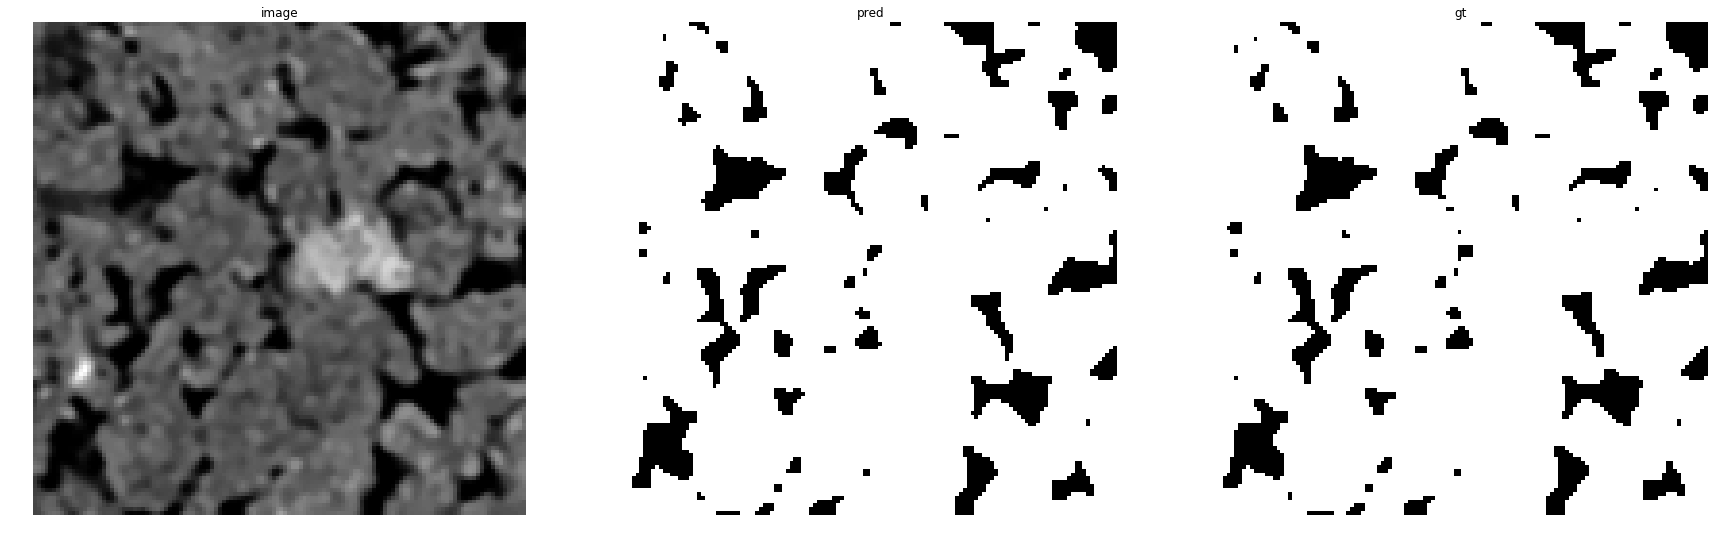

accuracy    : 0.99310302734375
precision   : 0.9963697291259425
recall      : 0.9957440870717924
f1          : 0.9960568098544857
pr_auc      : 0.9999510078377477
iou         : 0.9921445950643031


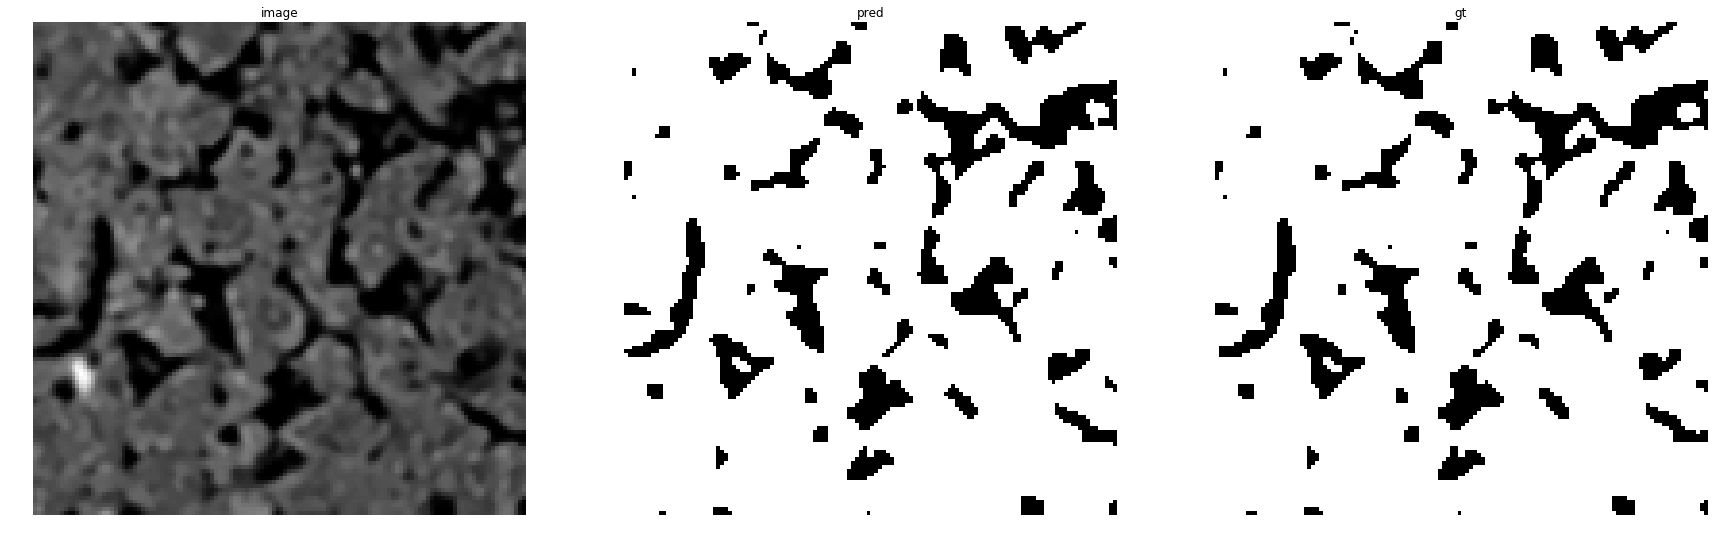

accuracy    : 0.99273681640625
precision   : 0.995597892761781
recall      : 0.9958134834704778
f1          : 0.9957056764461765
pr_auc      : 0.9999402942193211
iou         : 0.9914480776140855


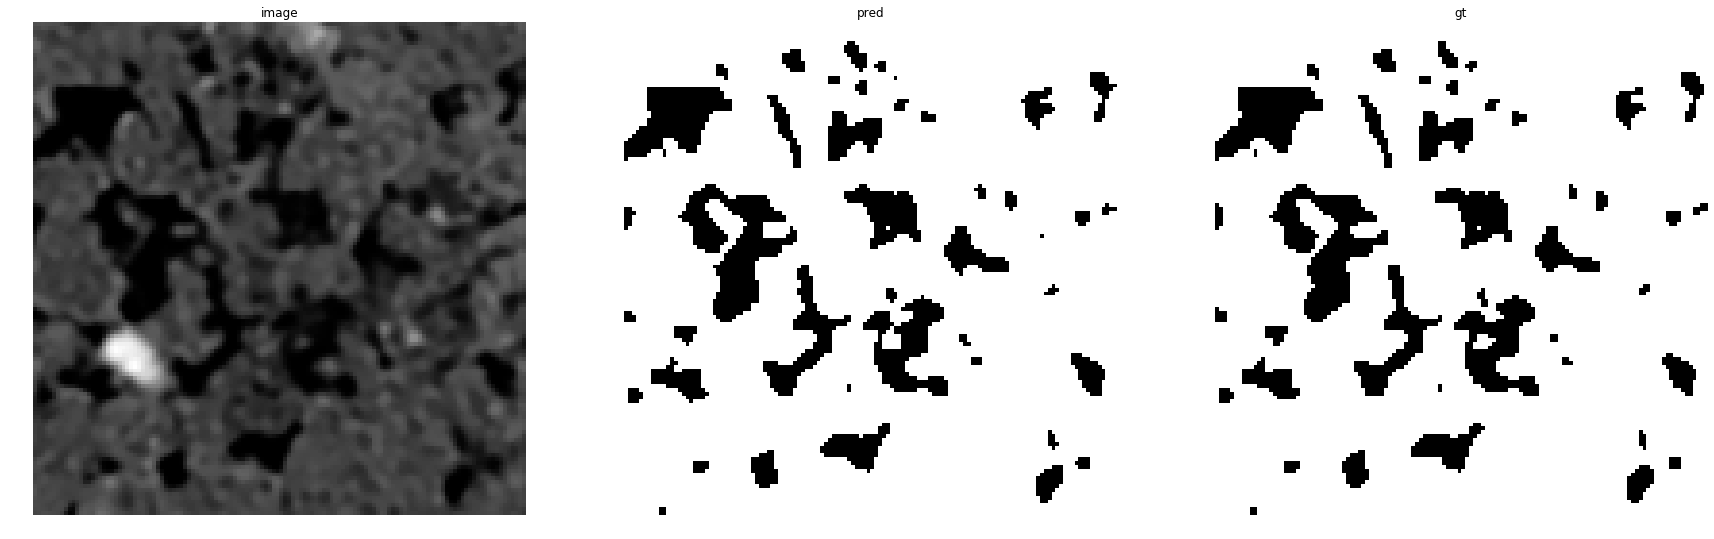

accuracy    : 0.99176025390625
precision   : 0.9959928443649374
recall      : 0.9943563366195171
f1          : 0.9951739177063598
pr_auc      : 0.9999341258448942
iou         : 0.9903941938238224


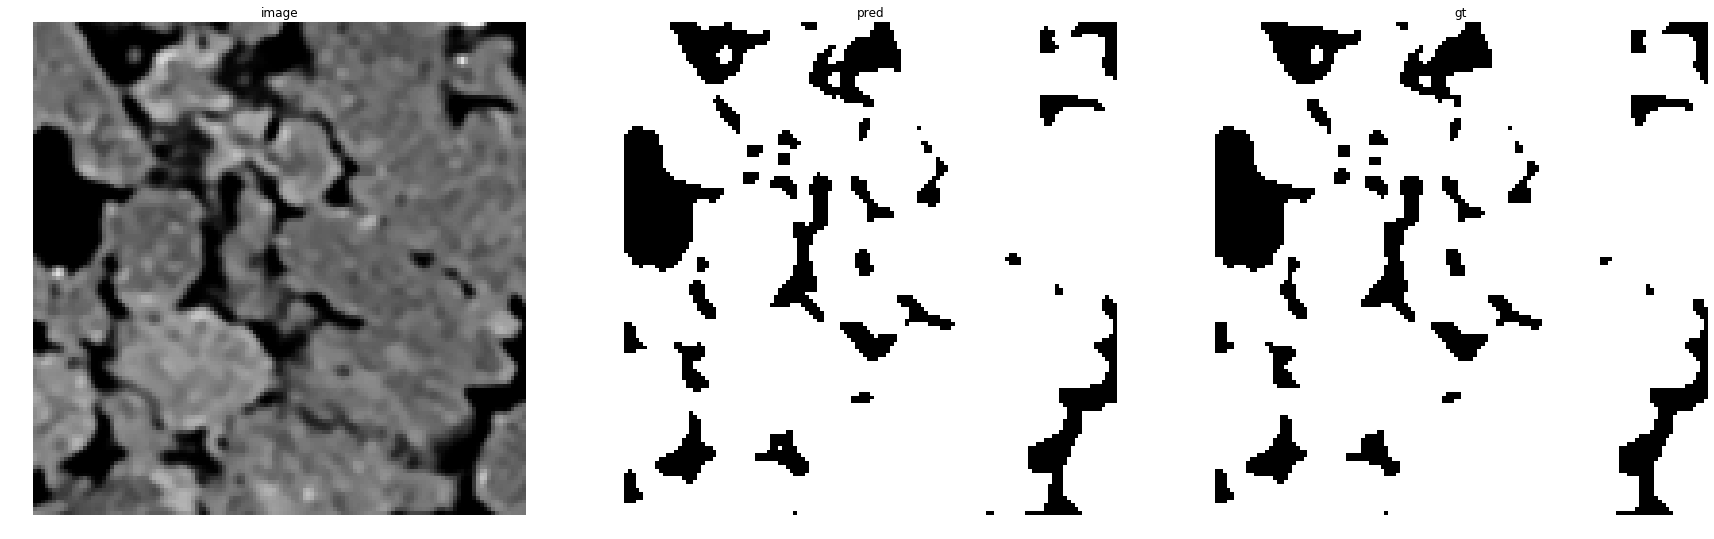

accuracy    : 0.99017333984375
precision   : 0.995237064299632
recall      : 0.9931585769840127
f1          : 0.9941967343113579
pr_auc      : 0.9999240921810257
iou         : 0.9884604357798165


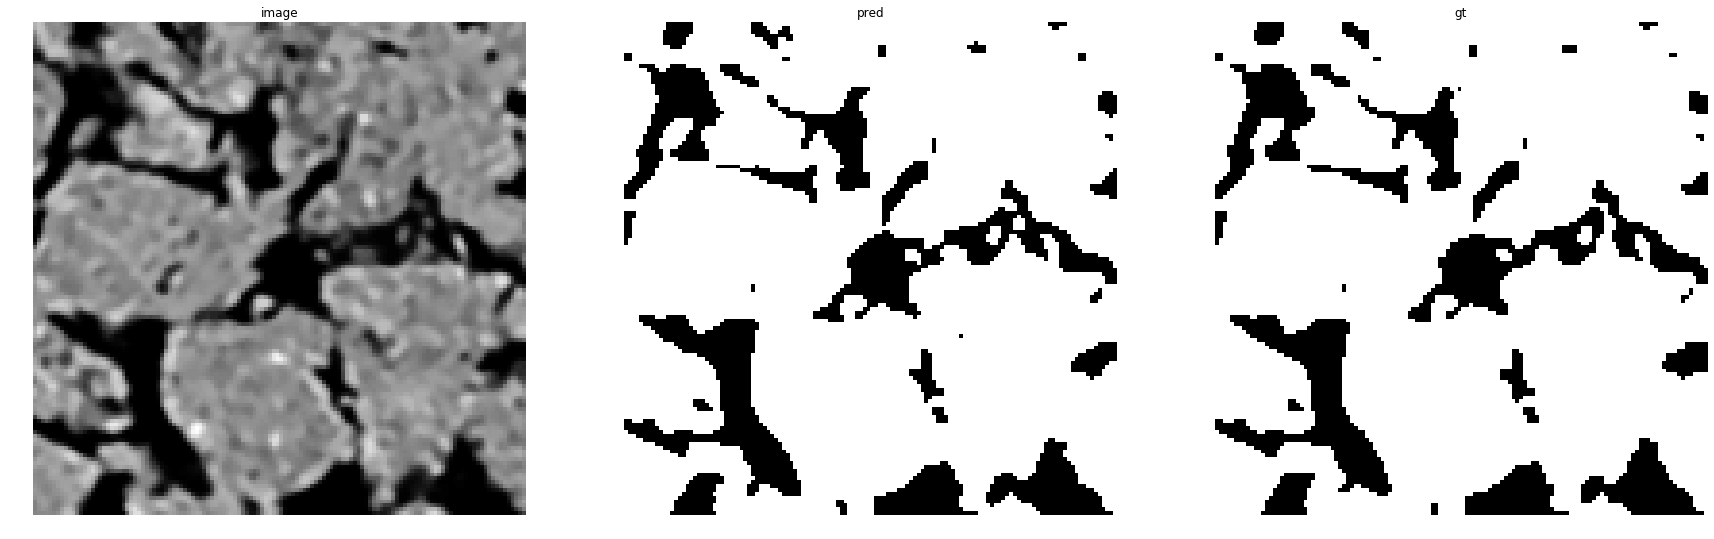

accuracy    : 0.9869384765625
precision   : 0.9928620244513631
recall      : 0.9909056460780599
f1          : 0.9918828705810955
pr_auc      : 0.9998290557308264
iou         : 0.9838964557152532


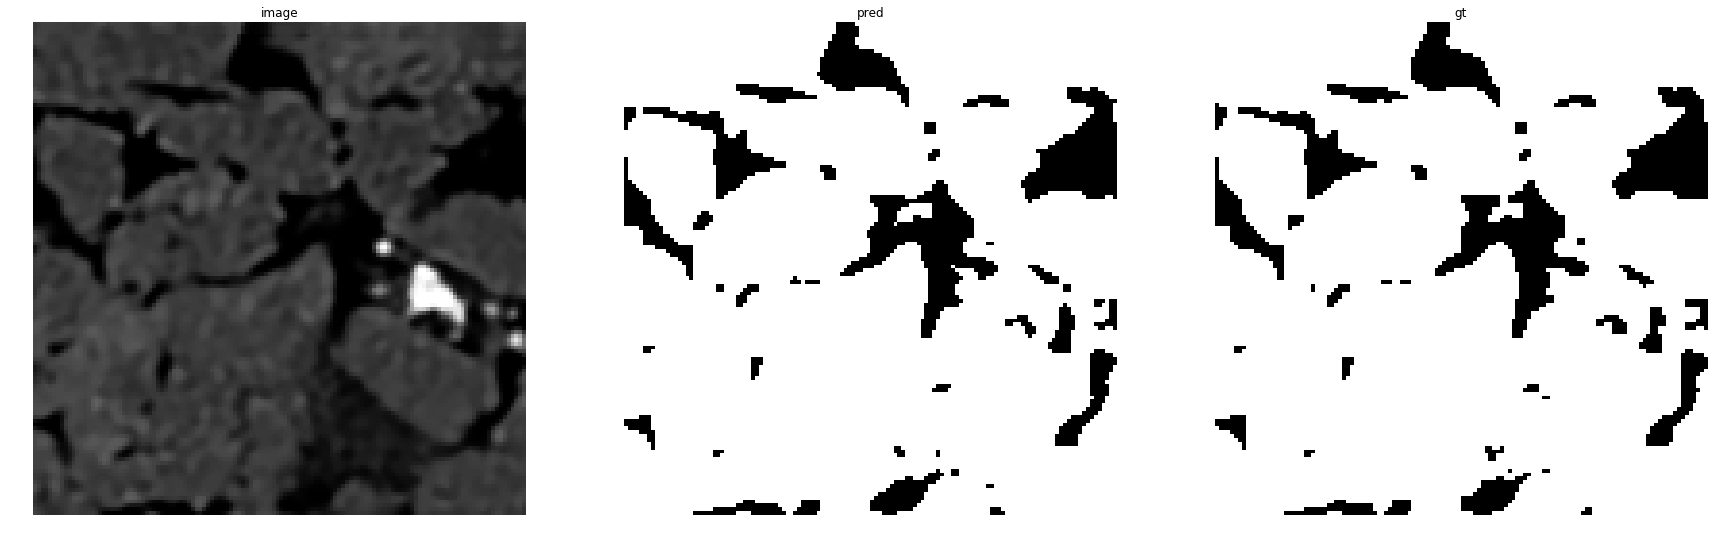

accuracy    : 0.9910888671875
precision   : 0.9942451154529307
recall      : 0.9953766270716267
f1          : 0.9948105495130446
pr_auc      : 0.9999194441713322
iou         : 0.9896746817538897


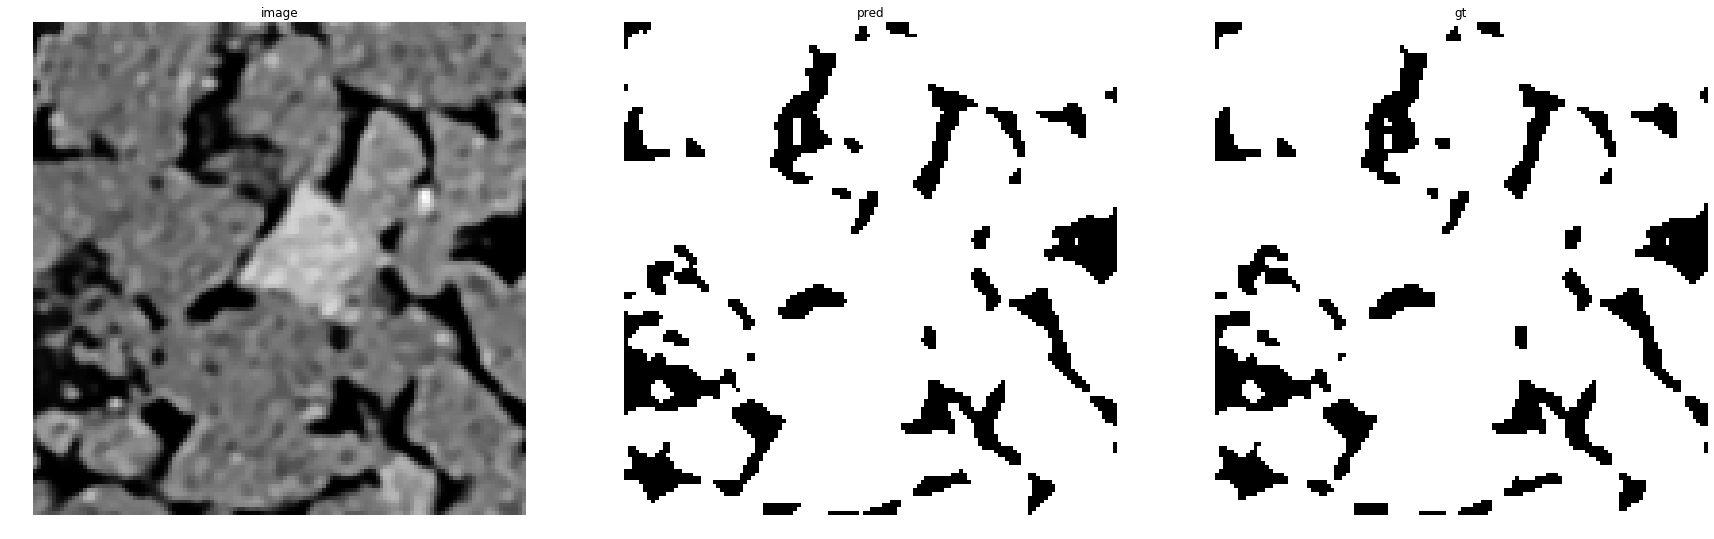

accuracy    : 0.9886474609375
precision   : 0.9943876816808174
recall      : 0.9922458357265939
f1          : 0.9933156041112629
pr_auc      : 0.9998762554031284
iou         : 0.9867199771526489


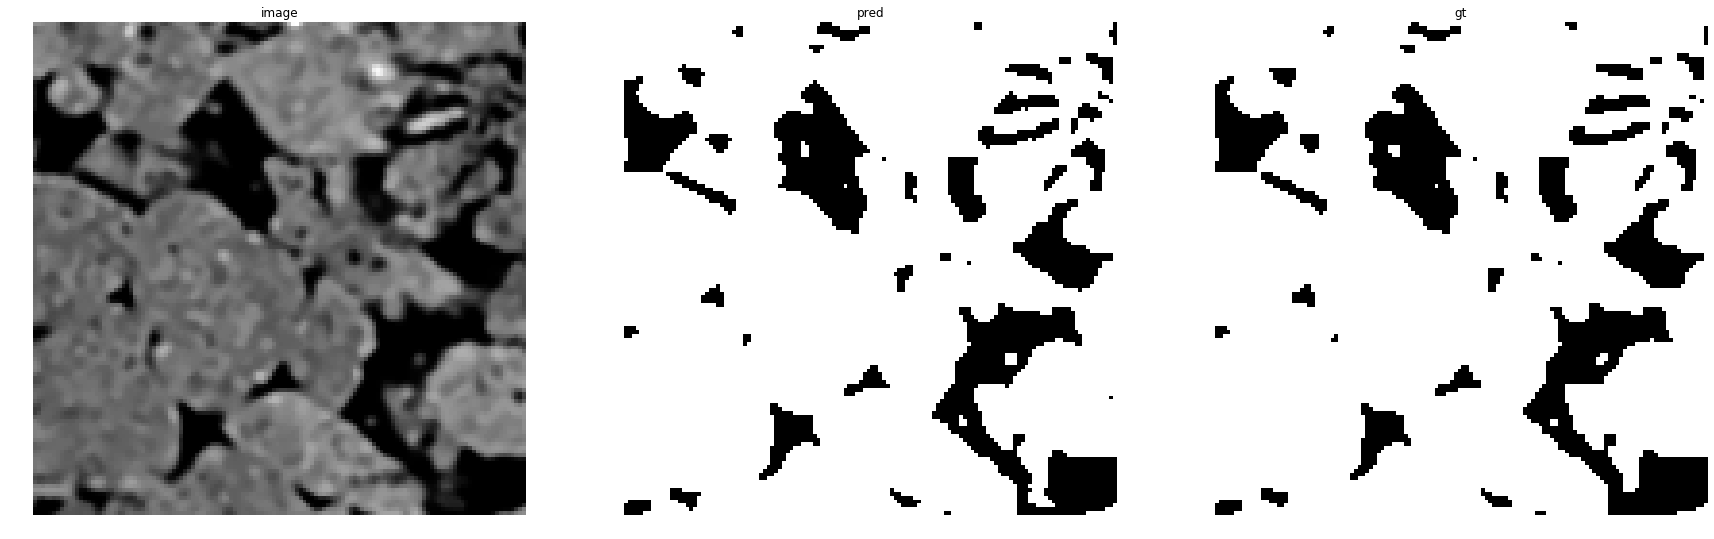

accuracy    : 0.9908447265625
precision   : 0.9940498326515433
recall      : 0.9947897283215482
f1          : 0.9944196428571429
pr_auc      : 0.9999046351226539
iou         : 0.9889012208657048


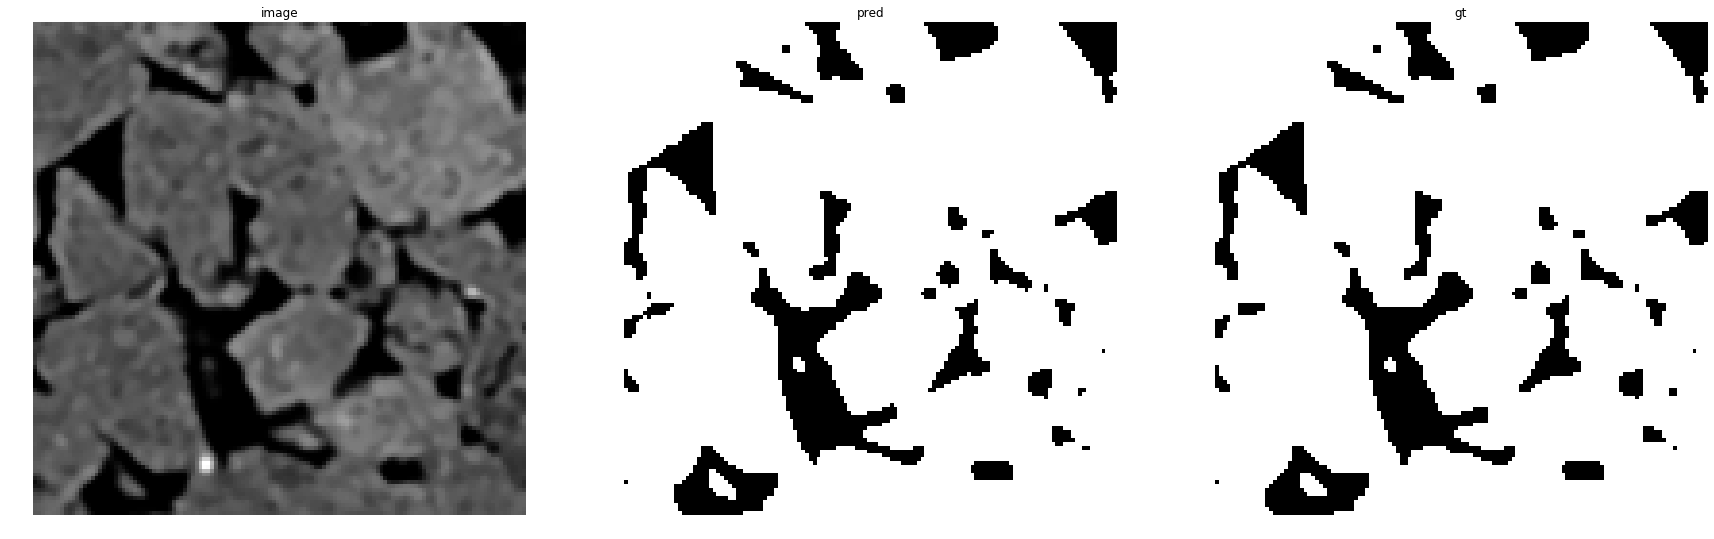

accuracy    : 0.99298095703125
precision   : 0.9953663481030988
recall      : 0.9963040800057975
f1          : 0.9958349932997719
pr_auc      : 0.9999525669759401
iou         : 0.9917045372574479


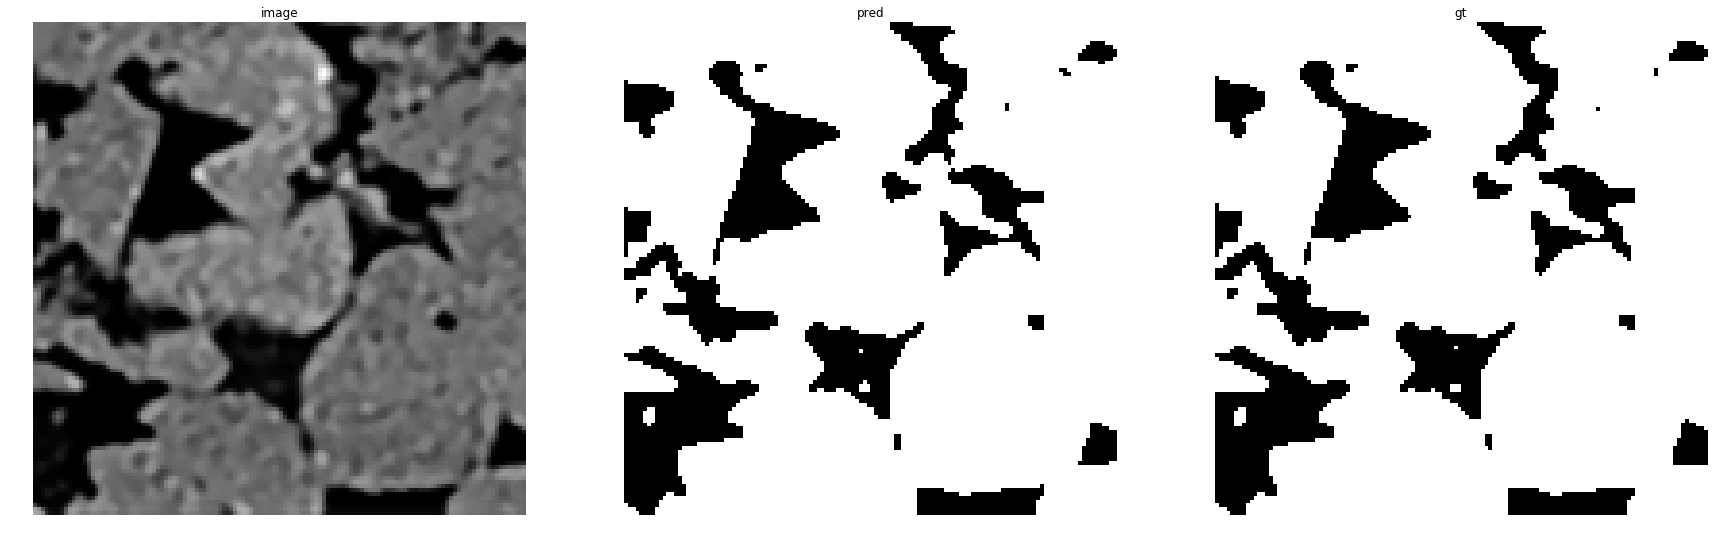

accuracy    : 0.99261474609375
precision   : 0.9936359454071462
recall      : 0.9970762483650073
f1          : 0.9953531241599141
pr_auc      : 0.9999450972667397
iou         : 0.9907492354740061


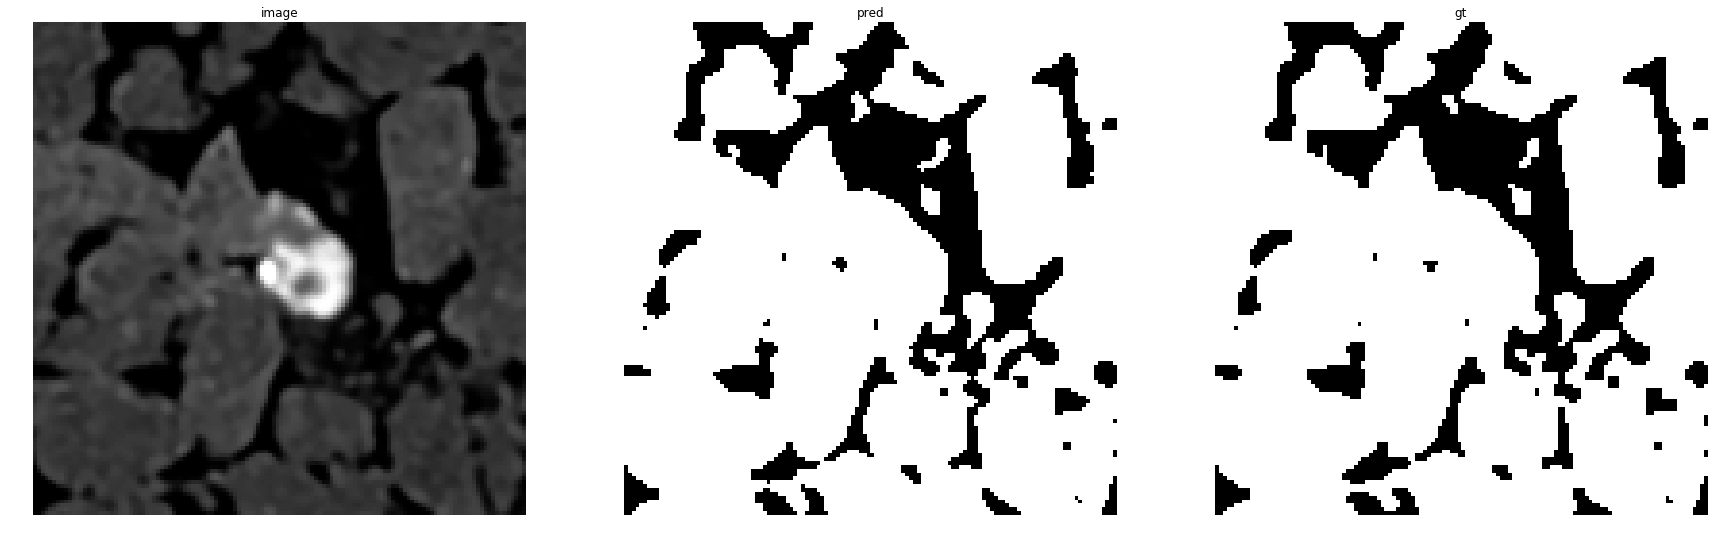

accuracy    : 0.98651123046875
precision   : 0.9907371370748035
recall      : 0.992049883086516
f1          : 0.9913930755150525
pr_auc      : 0.9998078079158982
iou         : 0.9829330450227817


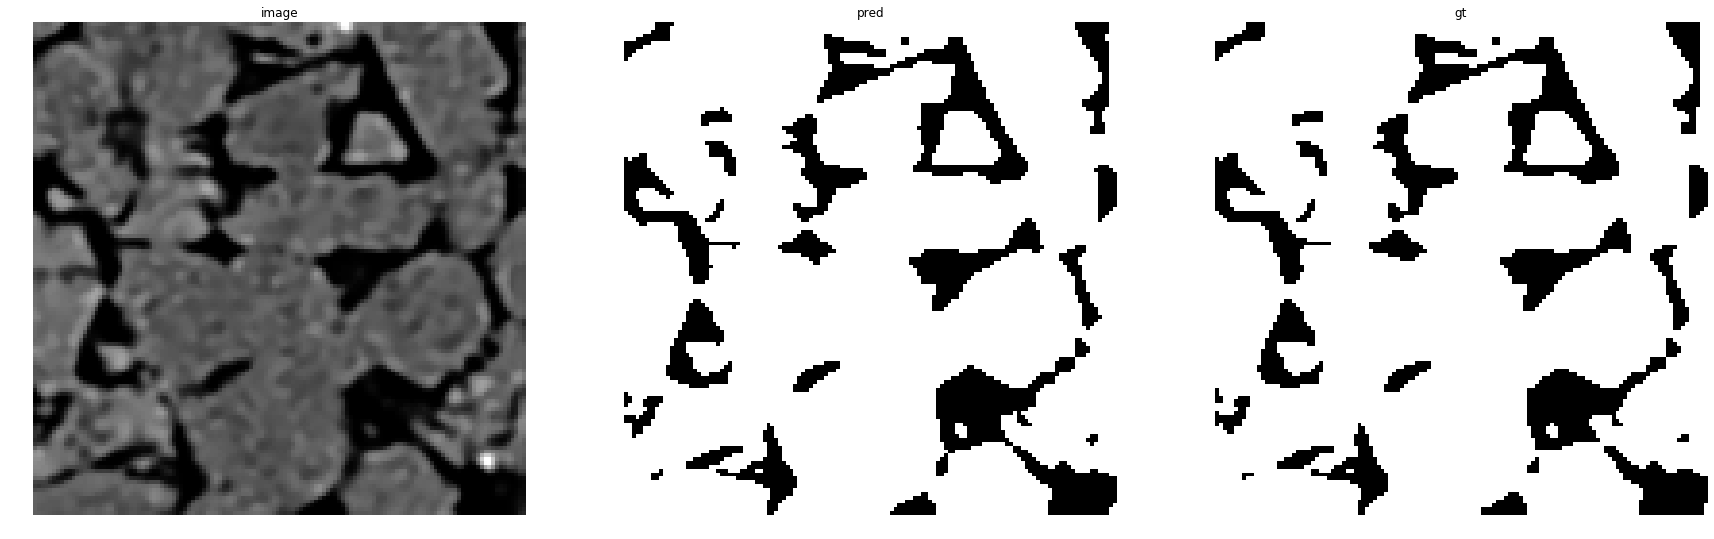

accuracy    : 0.9898681640625
precision   : 0.9932885906040269
recall      : 0.9943266646760227
f1          : 0.9938073565619637
pr_auc      : 0.9999071123097288
iou         : 0.9876909387512977


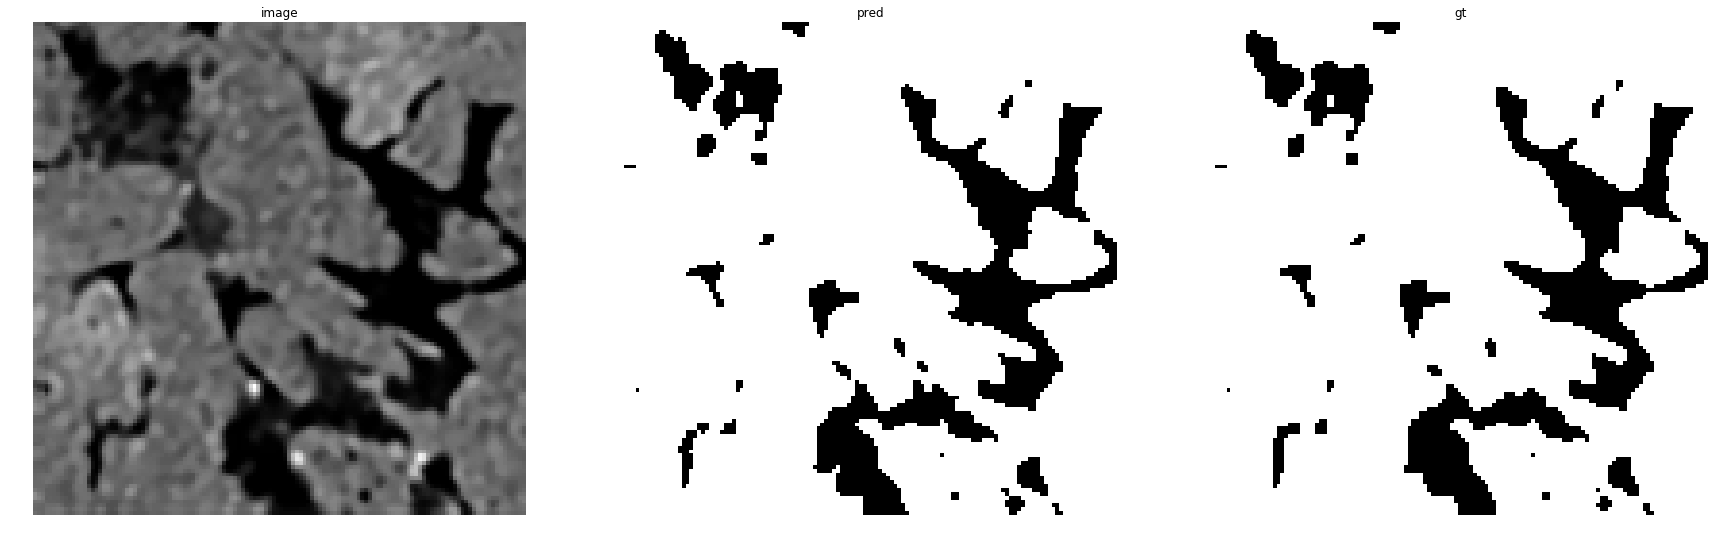

accuracy    : 0.98931884765625
precision   : 0.9947152084556665
recall      : 0.992456975466862
f1          : 0.9935848088273032
pr_auc      : 0.9998923109023936
iou         : 0.9872514023457419


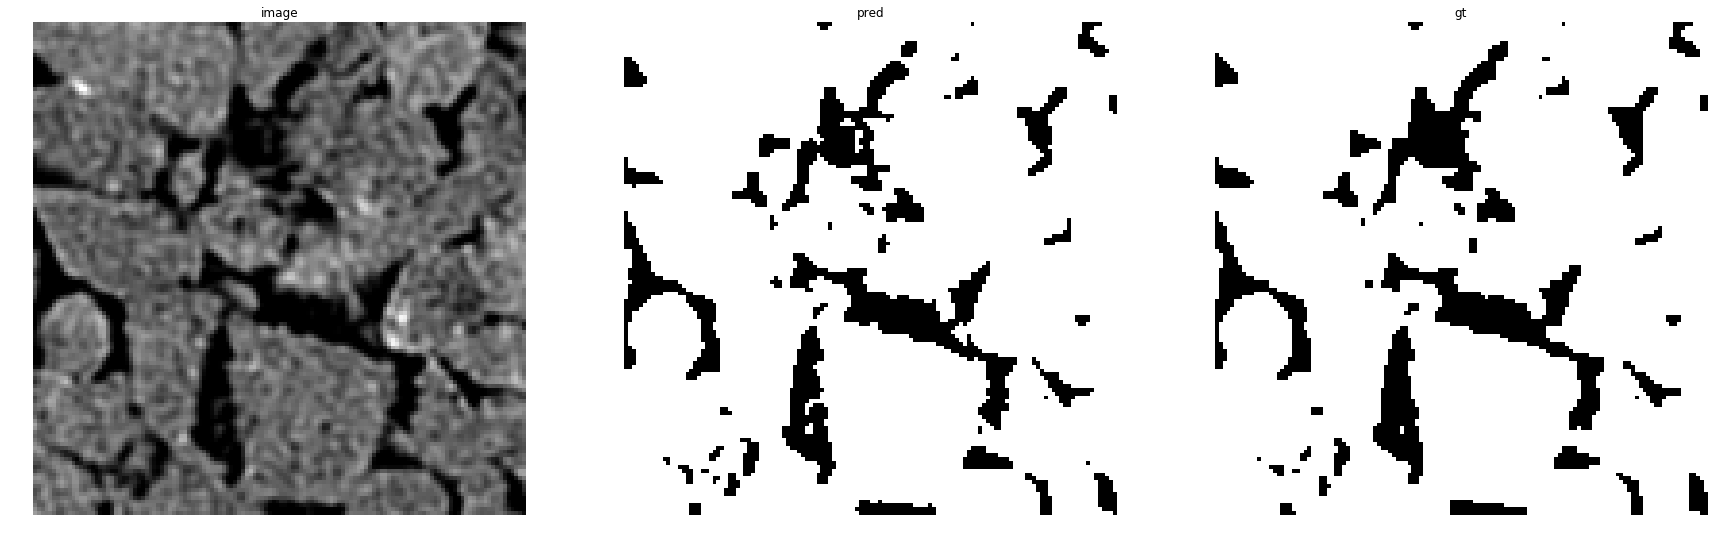

accuracy    : 0.98358154296875
precision   : 0.988740022805017
recall      : 0.9920629245620307
f1          : 0.9903986865117607
pr_auc      : 0.9996973912805742
iou         : 0.9809799901011101


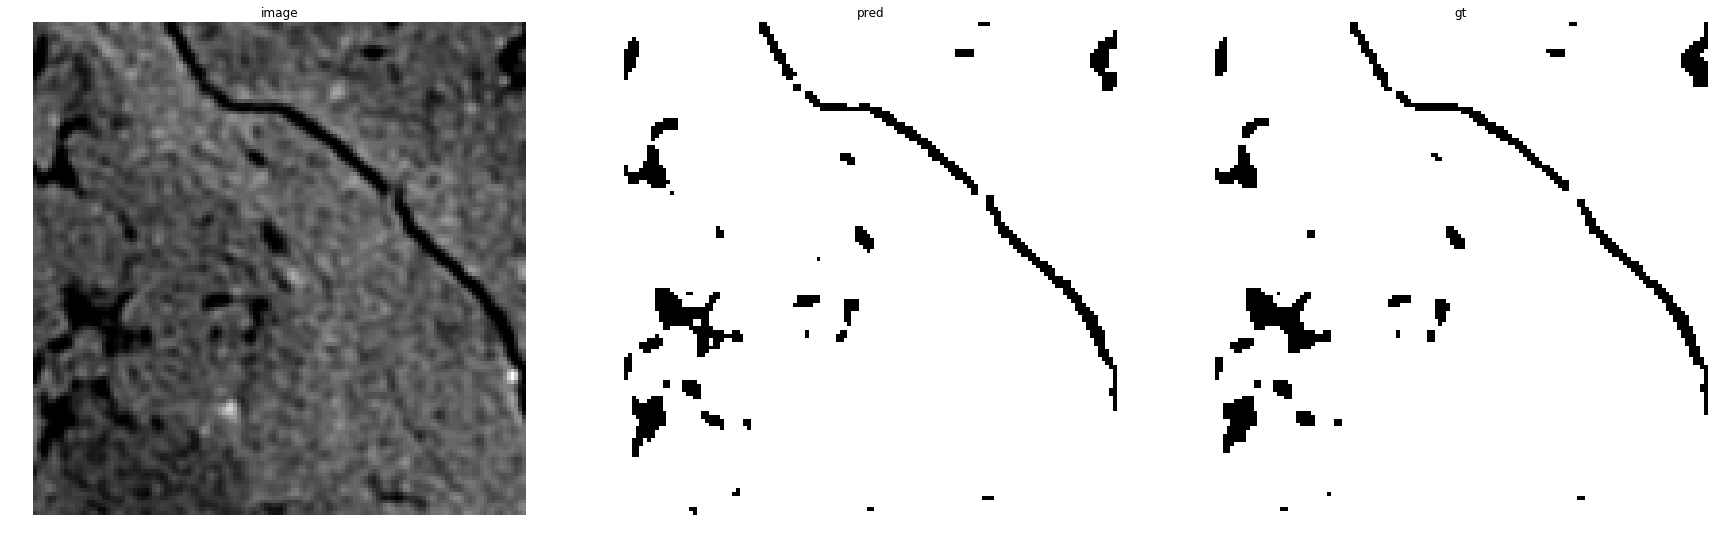

accuracy    : 0.99151611328125
precision   : 0.9963763426944481
recall      : 0.9946385892384213
f1          : 0.9955067076127364
pr_auc      : 0.9999430679727532
iou         : 0.9910536139537878


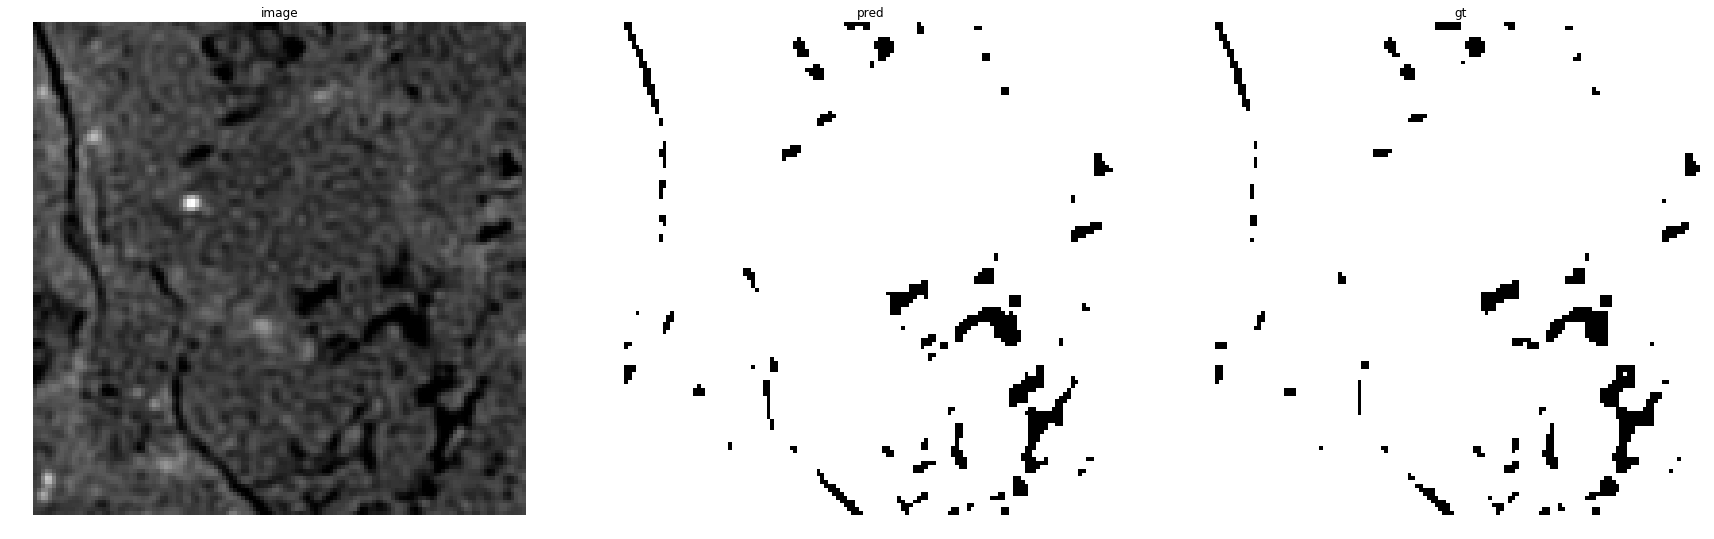

accuracy    : 0.98968505859375
precision   : 0.9962875248031748
recall      : 0.992919112018372
f1          : 0.9946004664685774
pr_auc      : 0.9999248681147028
iou         : 0.9892589297063684


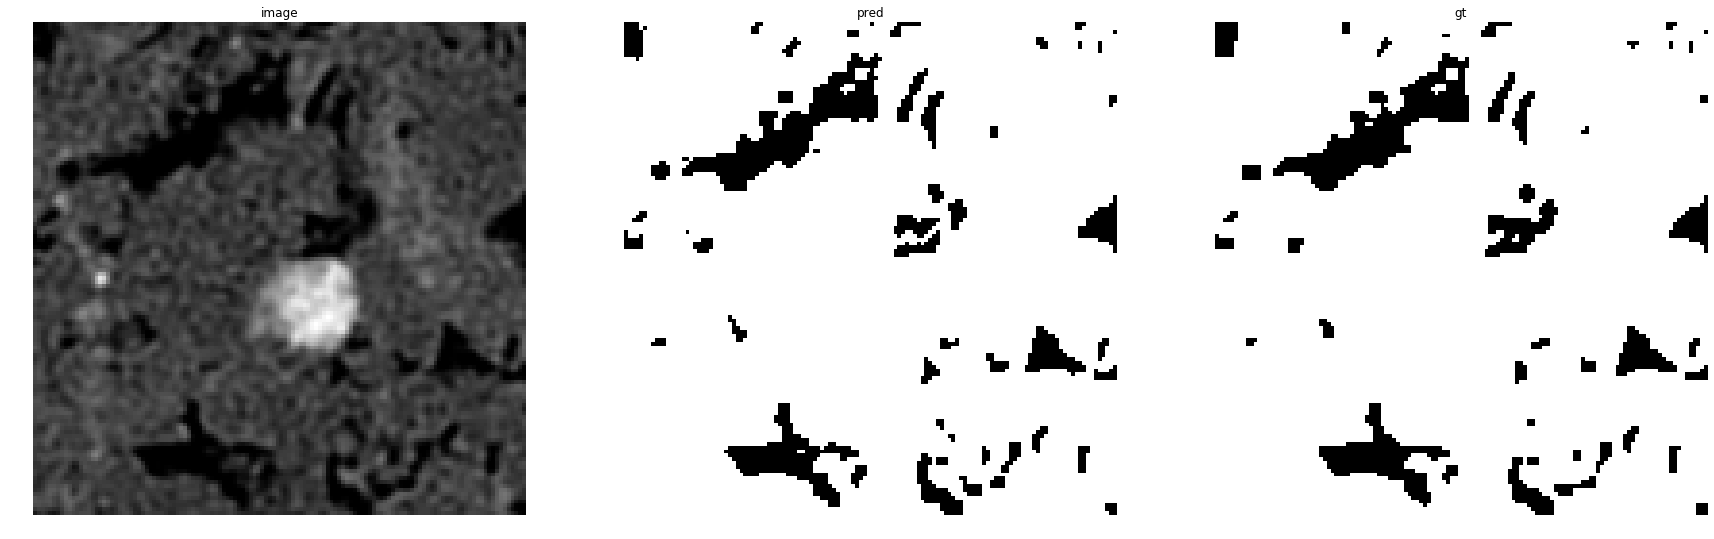

accuracy    : 0.98638916015625
precision   : 0.9919678714859438
recall      : 0.9928464368442567
f1          : 0.992406959719432
pr_auc      : 0.9998357517522235
iou         : 0.9849283590159502


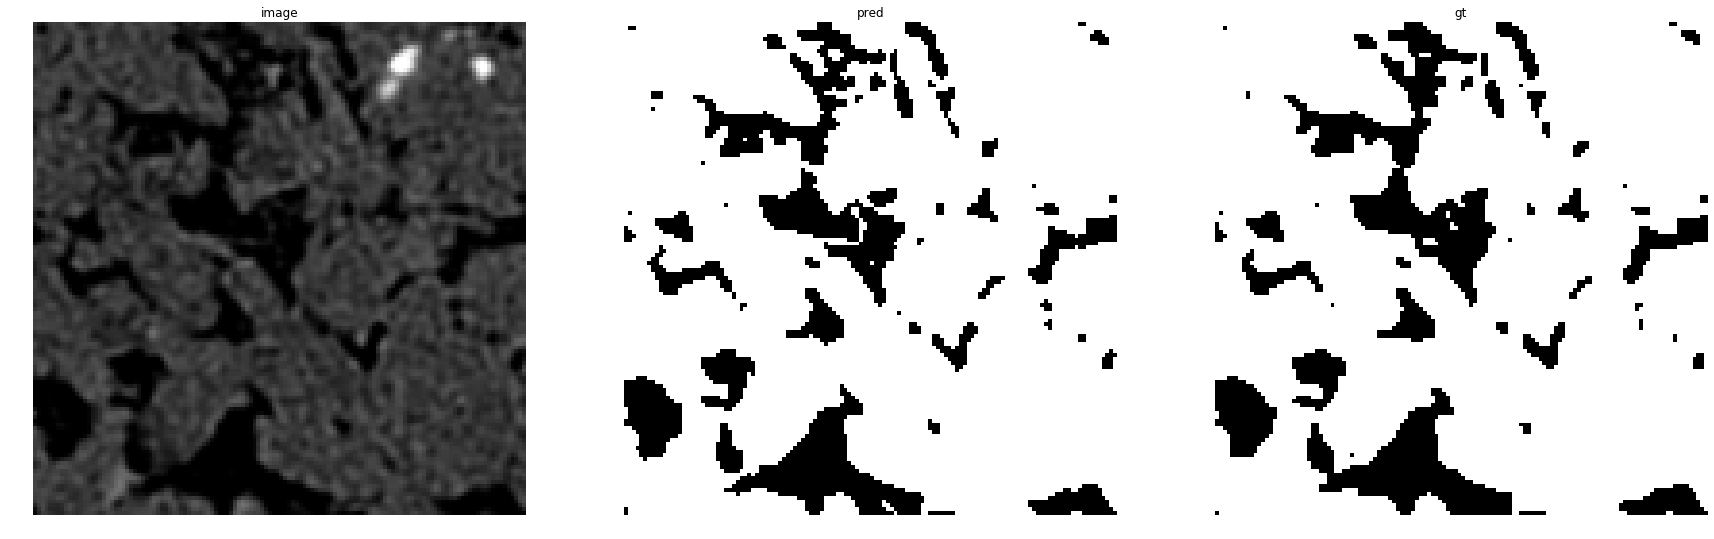

accuracy    : 0.98211669921875
precision   : 0.9872185479676006
recall      : 0.9909741906608981
f1          : 0.9890928042288649
pr_auc      : 0.9996163366221912
iou         : 0.9784209751067904


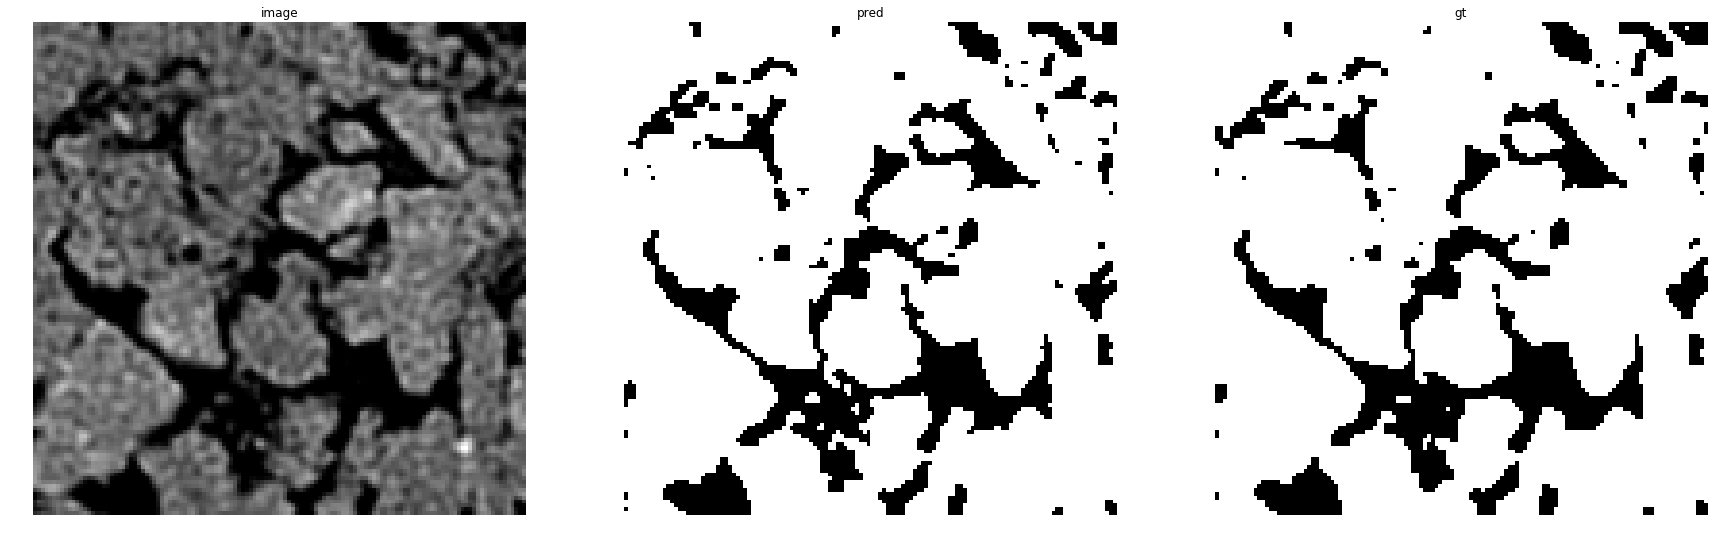

accuracy    : 0.9791259765625
precision   : 0.9841088807785888
recall      : 0.9898286937901499
f1          : 0.9869605002287632
pr_auc      : 0.9994005162350522
iou         : 0.9742566804666918


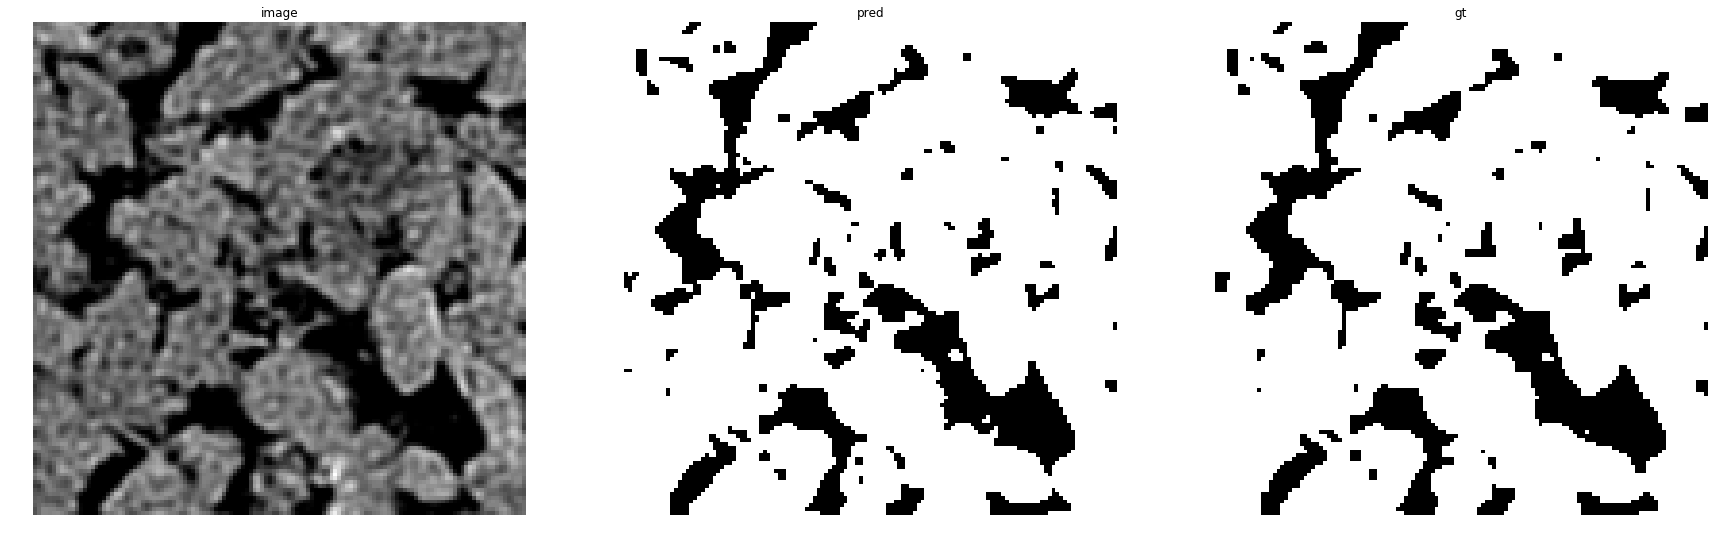

accuracy    : 0.98052978515625
precision   : 0.9870569644066521
recall      : 0.9889173703256936
f1          : 0.9879862915678077
pr_auc      : 0.99953461463527
iou         : 0.9762578148258411


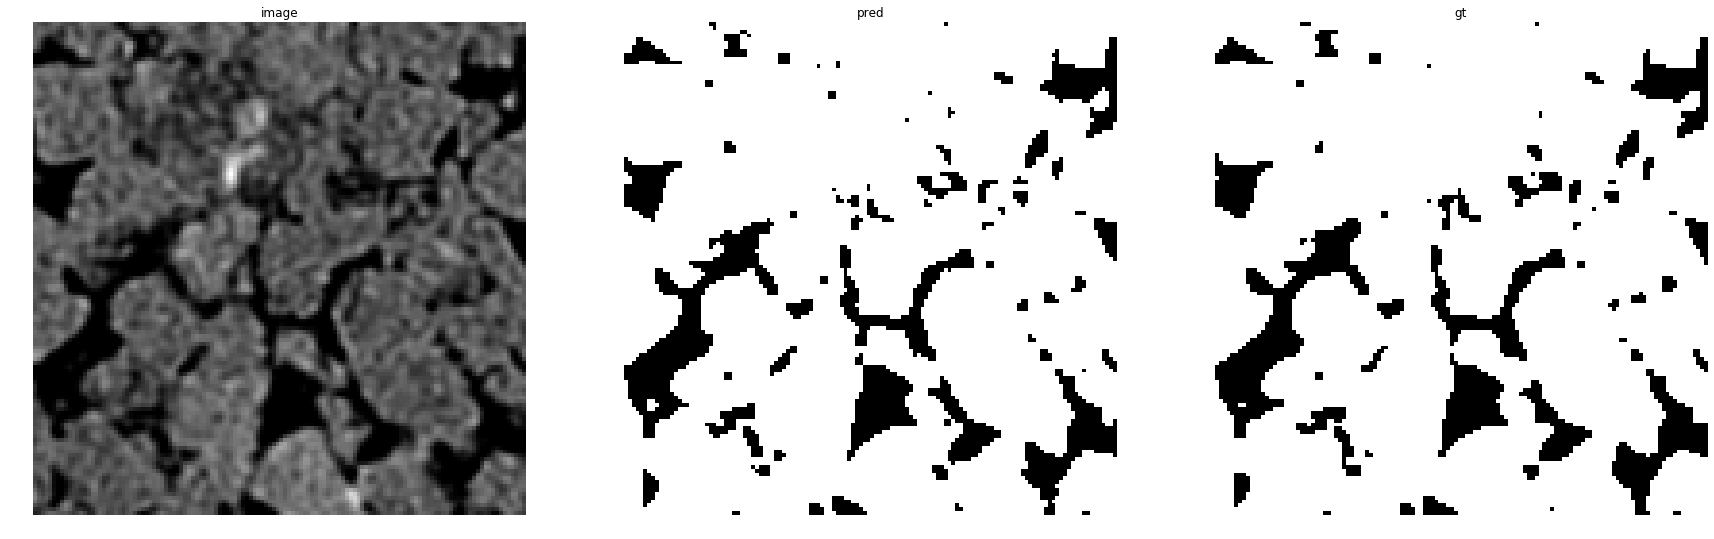

accuracy    : 0.98406982421875
precision   : 0.9898040349989153
recall      : 0.9913093858632677
f1          : 0.9905561385099685
pr_auc      : 0.9997217637473192
iou         : 0.9812889812889813


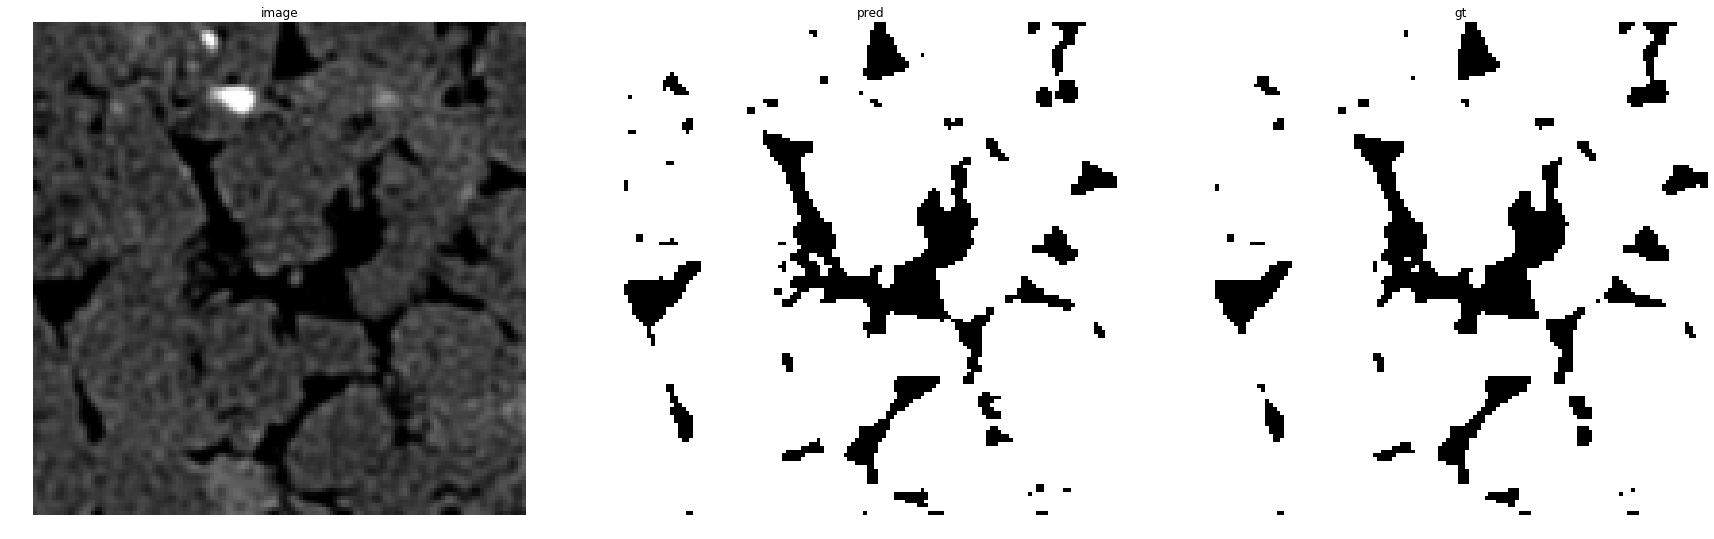

accuracy    : 0.98736572265625
precision   : 0.9942952553221094
recall      : 0.9913296802386072
f1          : 0.9928102532041263
pr_auc      : 0.9998439812086118
iou         : 0.9857231533209186


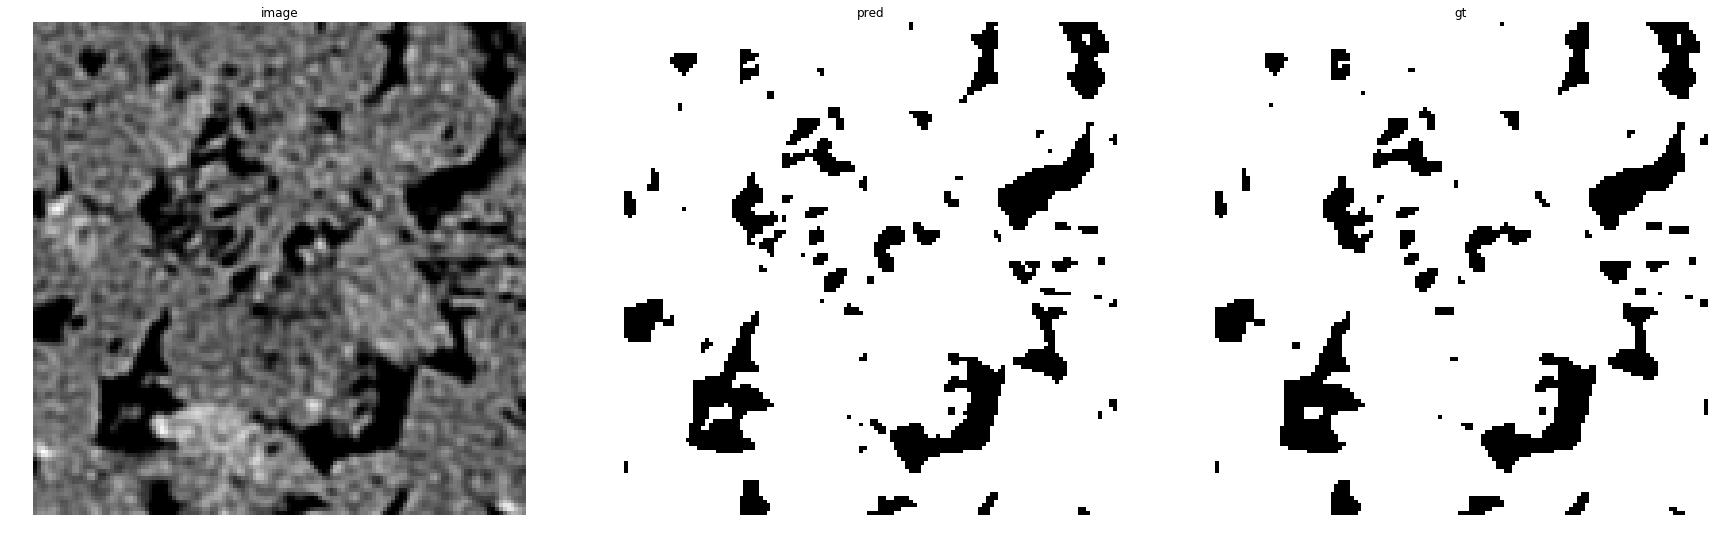

accuracy    : 0.98577880859375
precision   : 0.9919616415174164
recall      : 0.9916120391908085
f1          : 0.9917868095456308
pr_auc      : 0.9997898496732566
iou         : 0.9837074330466401


In [29]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break